In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
from sklearn.inspection import permutation_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

<h1>Loading Dataset</h1>

In [2]:
df = pd.read_csv('white_winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h1>Statistical Summary of the Dataset</h1>

In [3]:
summary = df.describe(include='all')

skewness = df.skew()

summary.loc['skew'] = skewness

summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000
skew,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342,0.155796


<h1>Column Names and their Data Types</h1>

In [4]:
dataset_columns = pd.DataFrame({'column_names':list(df.columns)})

data_types = []
for column in df.columns:
    dtype = str(df[column].dtype)
    data_types.append(dtype)

dataset_columns['data_type'] = data_types
dataset_columns

,column_names,data_type
0,fixed acidity,float64
1,volatile acidity,float64
2,citric acid,float64
3,residual sugar,float64
4,chlorides,float64
5,free sulfur dioxide,float64
6,total sulfur dioxide,float64
7,density,float64
8,pH,float64
9,sulphates,float64


<h1>Checking Missing Values</h1>

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<h1>Check for duplicate entries</h1>

In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [9]:
def outlier_info(df):
    quantile_75 = []
    quantile_25 = []
    inter_quantile_range = []
    minimum_value = []
    maximum_value = []
    number_of_outliers = []
    percentage_of_outliers = []
    numeric_df = df.select_dtypes(np.number)
    
    for column in numeric_df.columns:
        q75, q25 = np.percentile(df[column], [75, 25])
        quantile_75.append(q75)
        quantile_25.append(q25)
        iqr = q75 - q25
        inter_quantile_range.append(iqr)
        min_value = q25 - (iqr * 1.5)
        minimum_value.append(min_value)
        max_value = q75 + (iqr * 1.5)
        maximum_value.append(max_value)
        outlier_count = len(np.where((df[column] > max_value) | (df[column] < min_value))[0])
        number_of_outliers.append(outlier_count)
        outlier_percent = round(outlier_count/len(df[column])*100, 2)
        percentage_of_outliers.append(outlier_percent)
        
    outliers_summary = pd.DataFrame(
        {
            'Number of Outliers' : number_of_outliers,
            'Outliers Percentage' : percentage_of_outliers,
            '75% Quantile' : quantile_75,
            '25% Quantile' : quantile_25,
            'Inter Quantile Range' : inter_quantile_range,
            'Maximum Value' : maximum_value,
            'Minimum Value' : minimum_value,
        }
    ).T
    
    outliers_summary.columns = numeric_df.columns.values
    
    return outliers_summary

In [10]:
outliers = outlier_info(df)

In [11]:
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Number of Outliers,106.00,133.00,223.00,16.00,178.0000,44.00,14.00,6.000000,46.00,96.00,0.00,156.00
Outliers Percentage,2.68,3.36,5.63,0.40,4.4900,1.11,0.35,0.150000,1.16,2.42,0.00,3.94
75% Quantile,7.30,0.33,0.39,8.90,0.0500,45.00,166.00,0.995710,3.29,0.55,11.40,6.00
25% Quantile,6.30,0.21,0.27,1.60,0.0350,23.00,106.00,0.991620,3.09,0.41,9.50,5.00
Inter Quantile Range,1.00,0.12,0.12,7.30,0.0150,22.00,60.00,0.004090,0.20,0.14,1.90,1.00
Maximum Value,8.80,0.51,0.57,19.85,0.0725,78.00,256.00,1.001845,3.59,0.76,14.25,7.50
Minimum Value,4.80,0.03,0.09,-9.35,0.0125,-10.00,16.00,0.985485,2.79,0.20,6.65,3.50


In [12]:
total_number_of_outliers = outliers.loc['Number of Outliers', :].sum()

print(f'The total number of outliers is: {total_number_of_outliers}')

The total number of outliers is: 1018.0


In [13]:
def detect_outliers(
    df, 
    xticklabels_fontsize=12, 
    yticklabels_fontsize=12, 
    title_fontsize=22, 
    boxplot_xlabel_fontsize=12, 
):
   
    for i, column in enumerate(df.columns):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), clear=False)
        
        
        df[column].hist(bins=30, ax=ax1)
        
        ax = sns.boxplot(x=column, data=df, ax=ax2)
        ax = sns.stripplot(x=column, data=df, color="maroon", jitter=0.2, size=2.5)
        
        
        ax1.set_title('Distribution of ' + column, fontsize=title_fontsize)
        ax2.set_title('Boxplot of ' + column, fontsize=title_fontsize)
        
        
        
        plt.setp(ax1.get_xticklabels(), fontsize=xticklabels_fontsize)
        plt.setp(ax1.get_yticklabels(), fontsize=yticklabels_fontsize)
        
        plt.setp(ax2.get_xticklabels(), fontsize=xticklabels_fontsize)
        ax2.set_xlabel(ax2.get_xlabel(), fontsize=boxplot_xlabel_fontsize)
        
        plt.grid(axis='both', color='black', linewidth=0.5)
        
        fig.tight_layout()

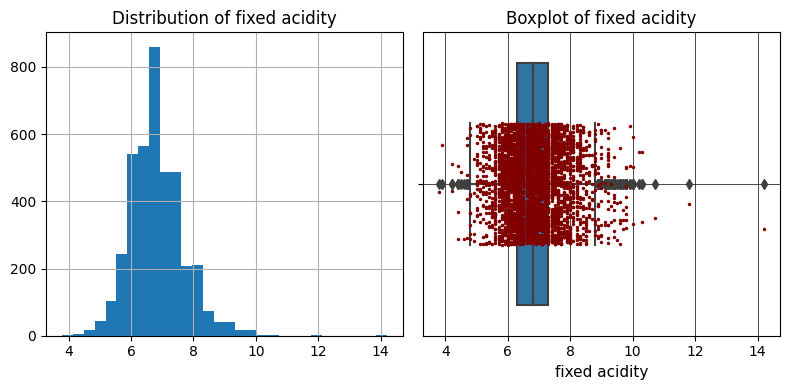

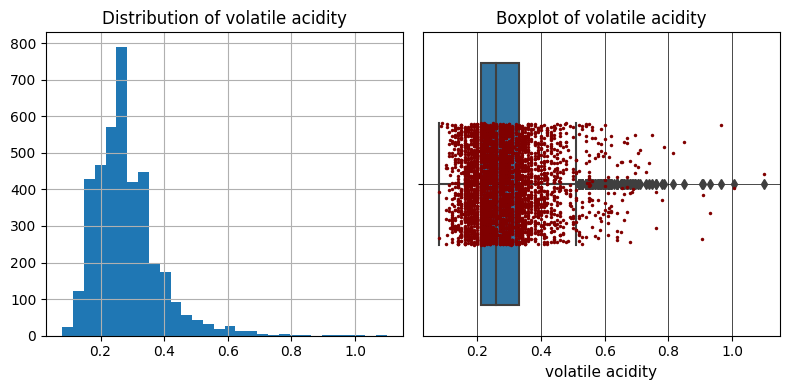

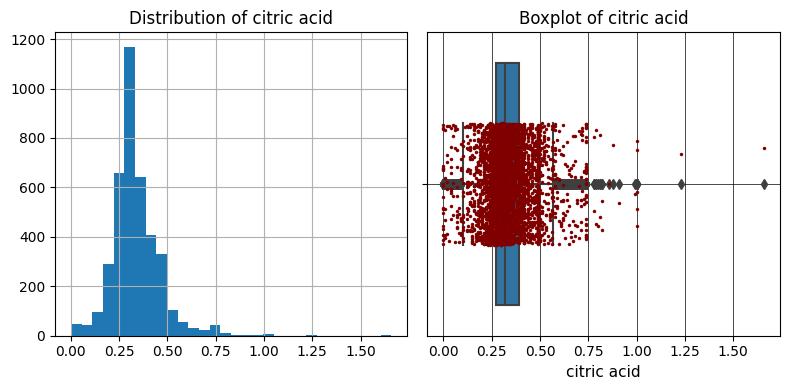

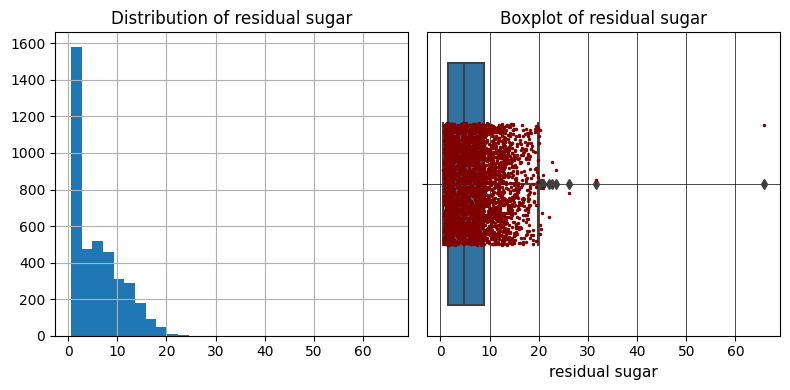

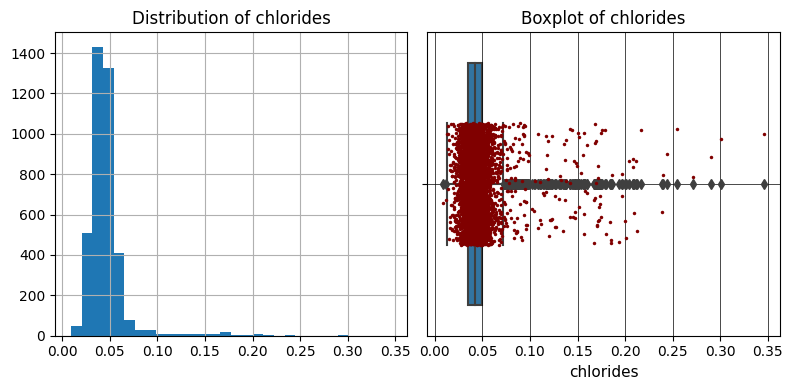

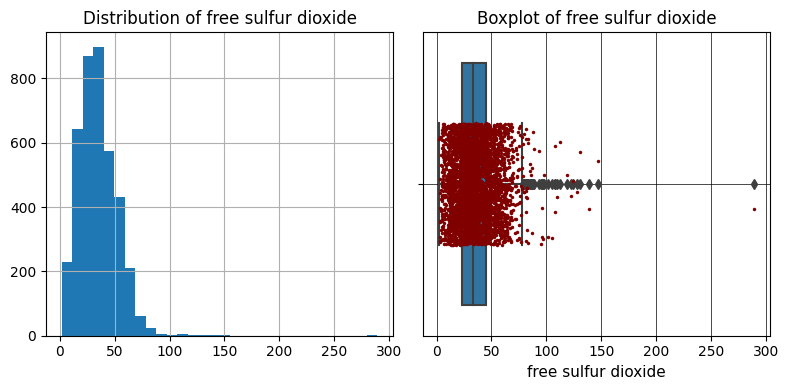

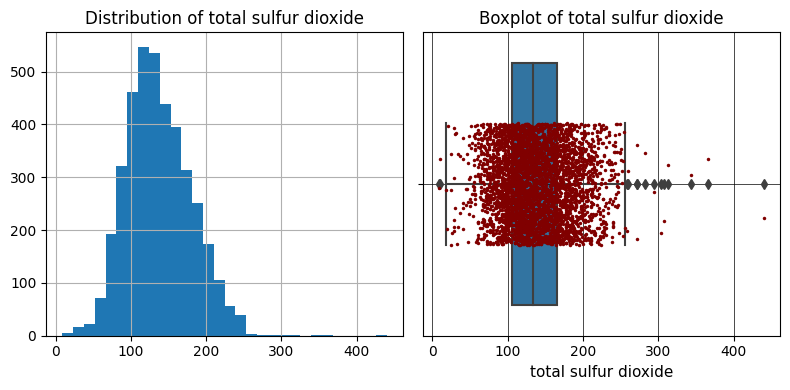

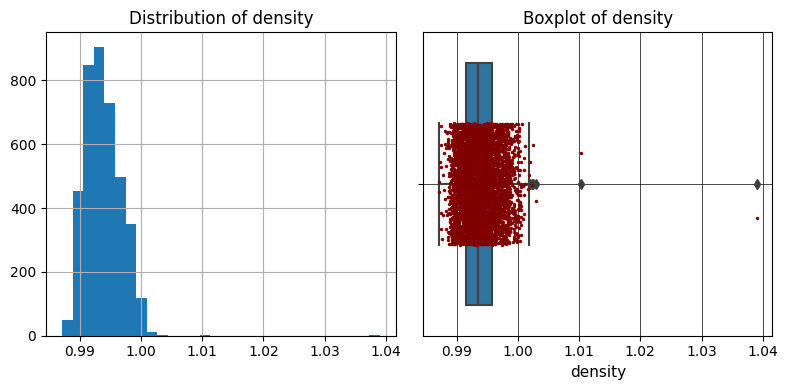

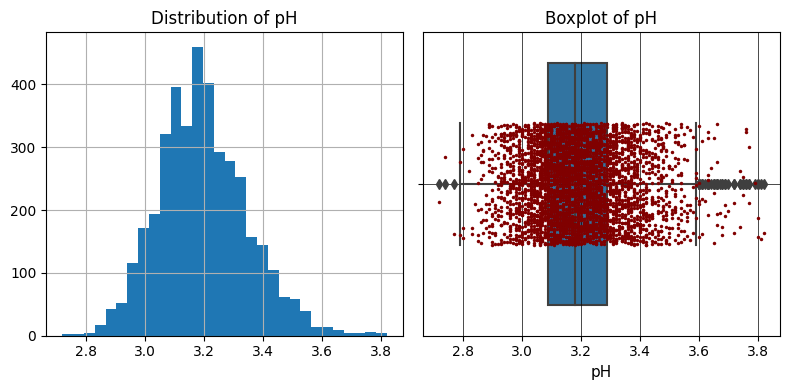

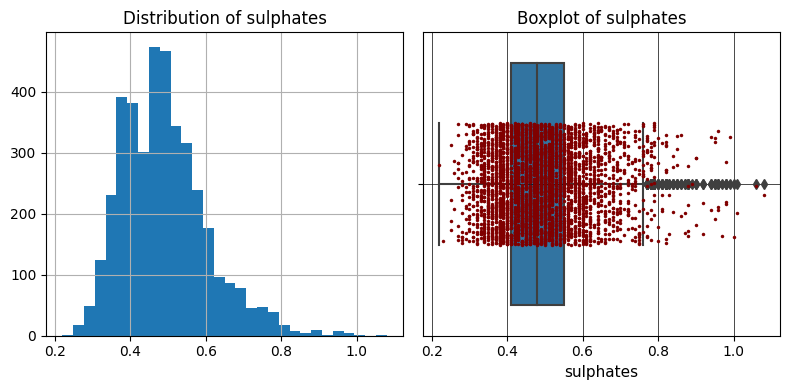

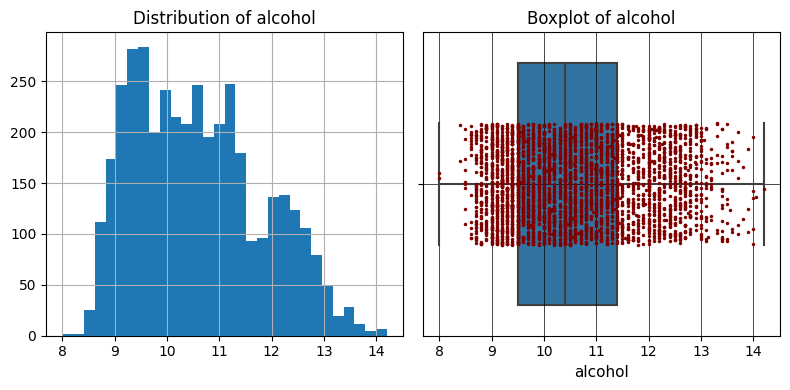

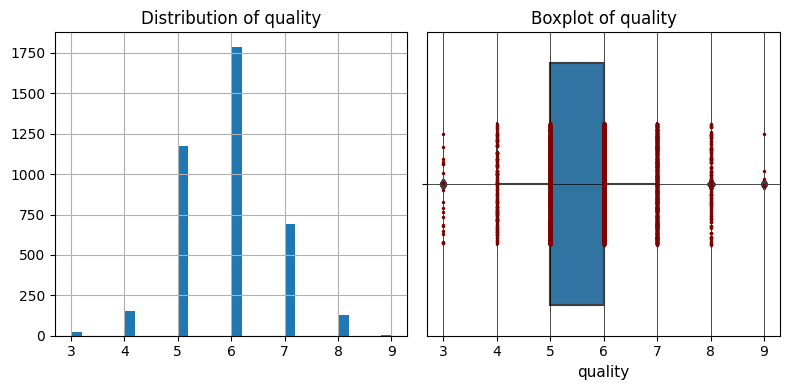

In [14]:
detect_outliers(
    df.select_dtypes(np.number),
    xticklabels_fontsize=10, 
    yticklabels_fontsize=10, 
    title_fontsize=12, 
    boxplot_xlabel_fontsize=11, 
)

<h1>Correlation of Dataset Features</h1>

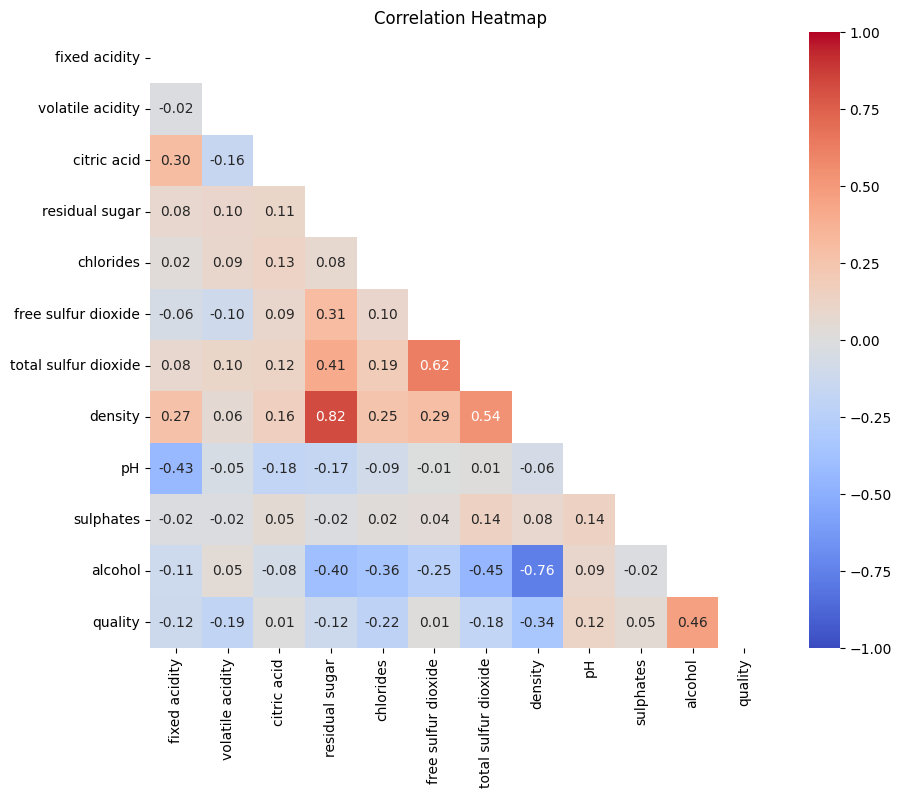

In [15]:
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<h1>Distribution Plot of Target Variable</h1>

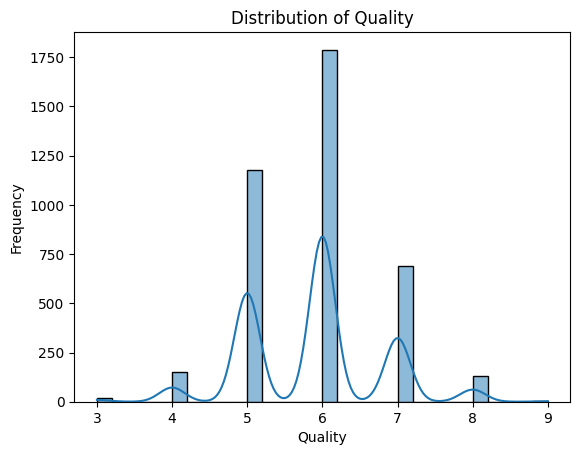

In [16]:
y = df['quality']
sns.histplot(y, kde=True, bins=30)  # KDE (Kernel Density Estimate) for smoothness
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

<h1>Count Plot of Target Variable</h1>

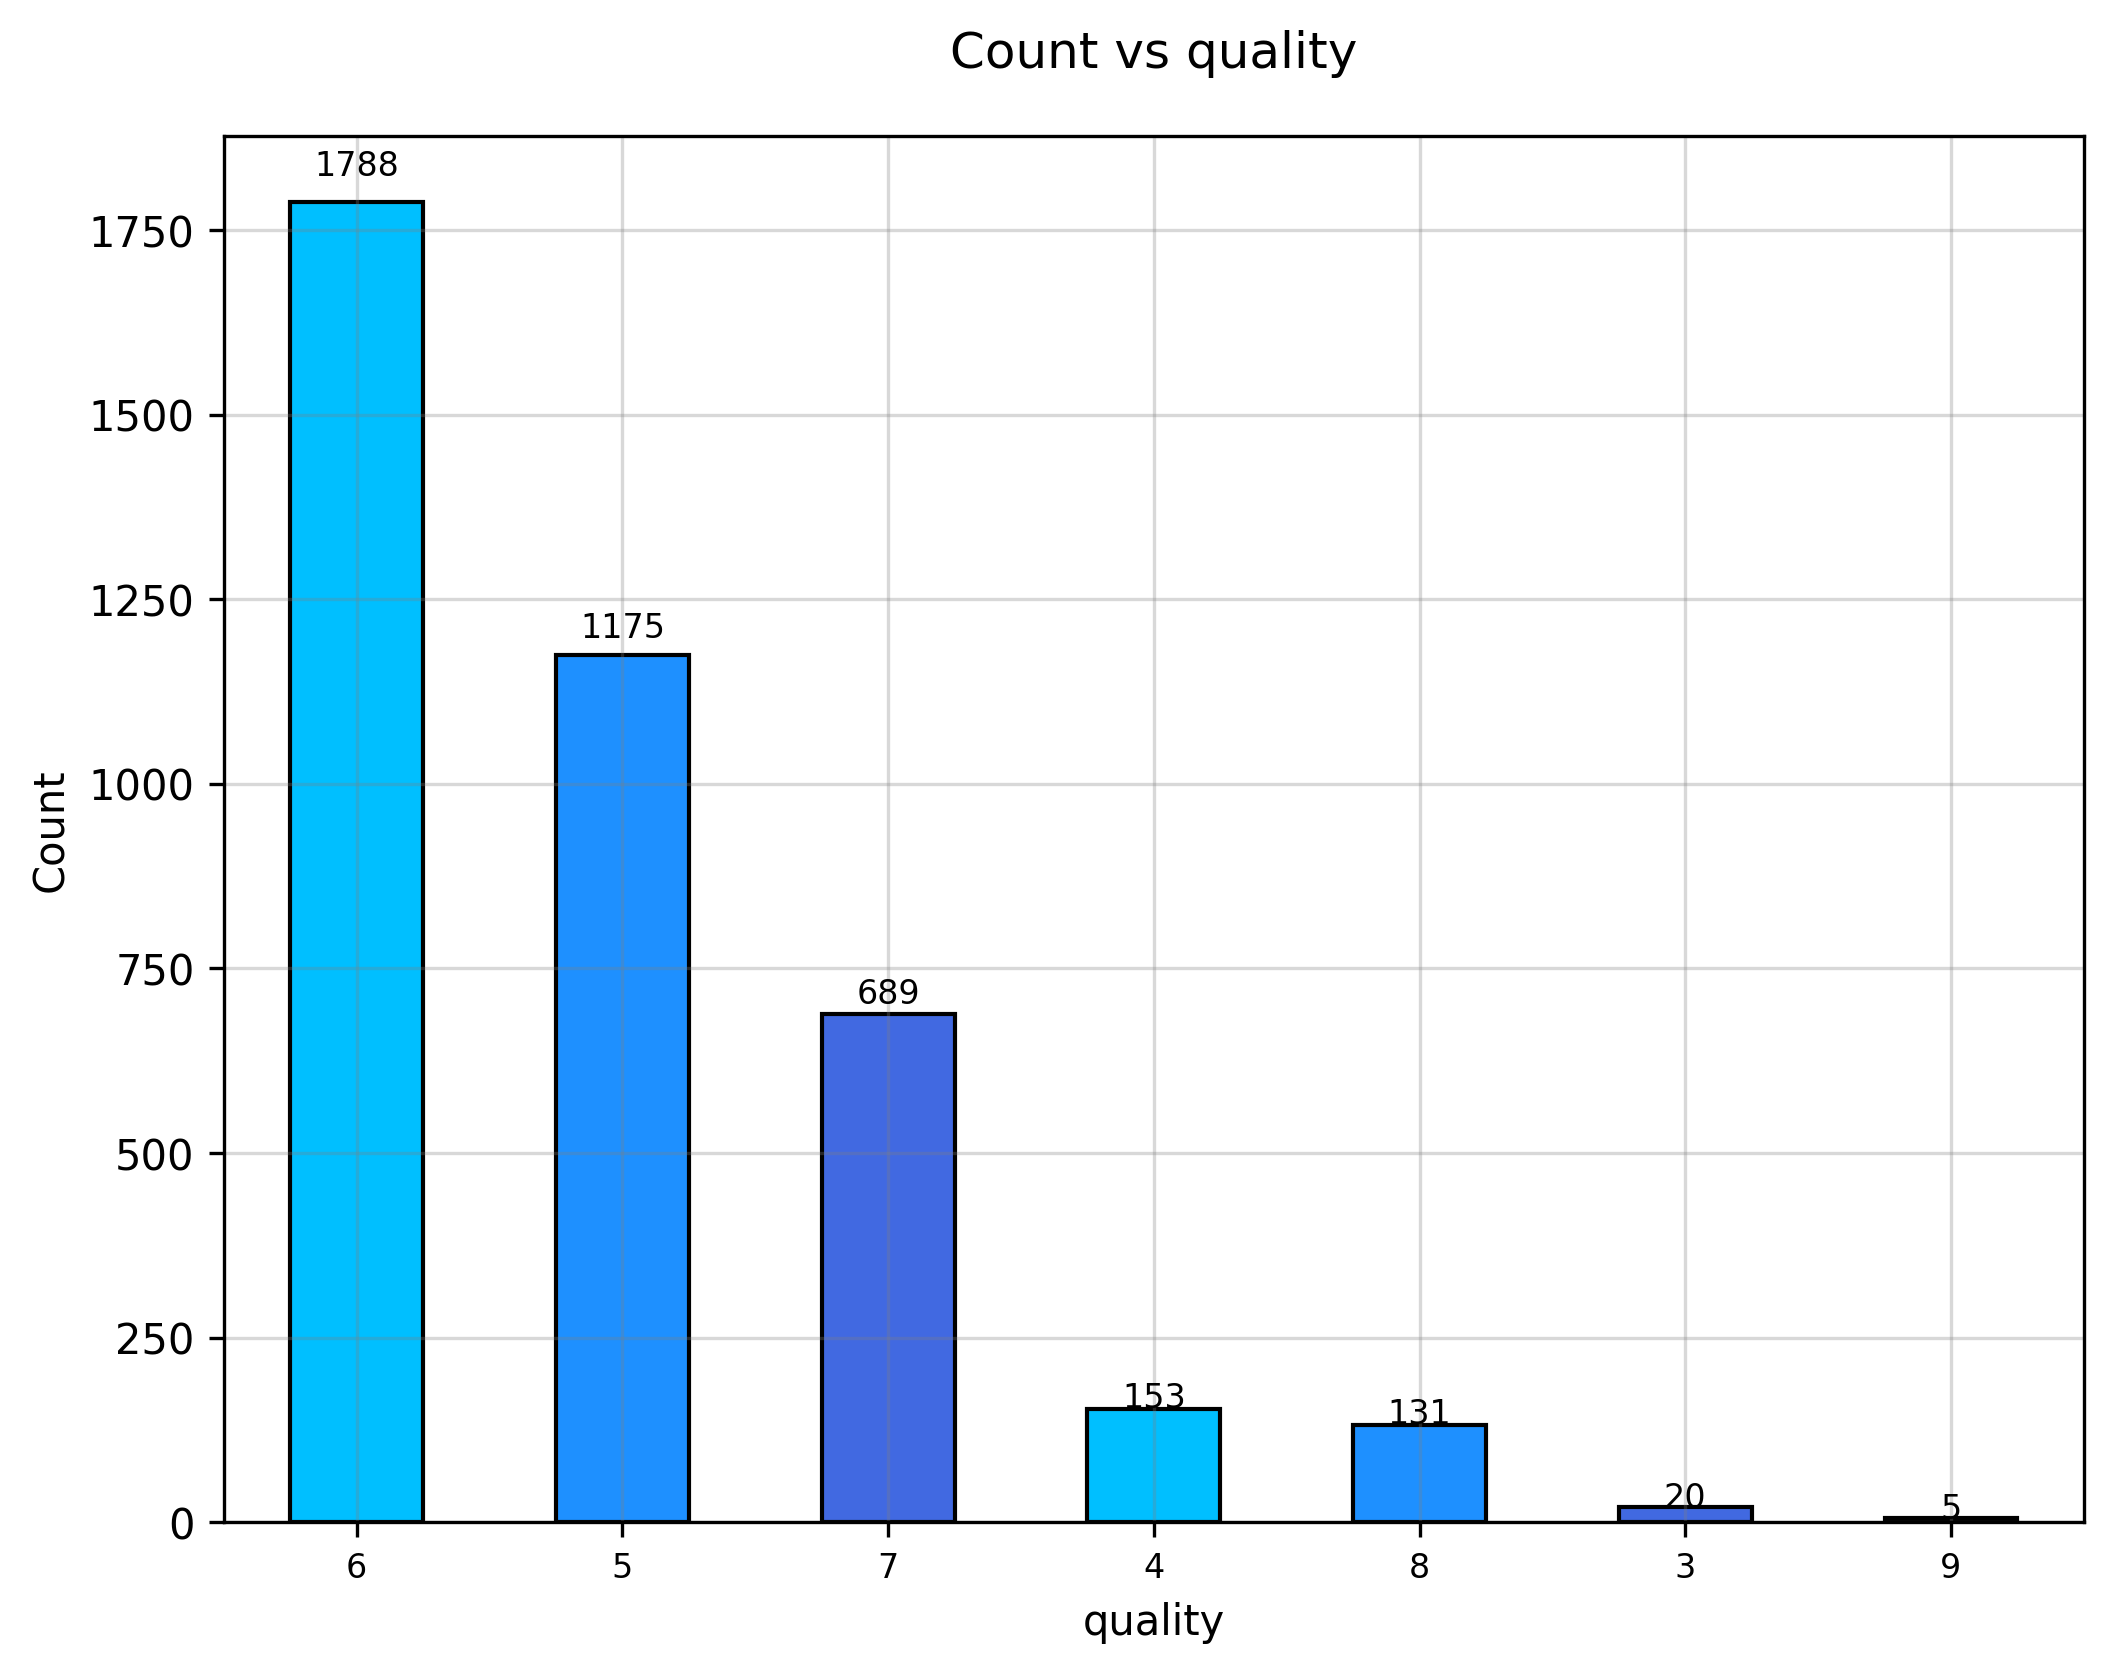

In [17]:
def count_plot(column_name):

    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

    value_counts = df[column_name].value_counts()

    ax = value_counts.plot(
        kind='bar', 
        rot=0, 
        color=['deepskyblue', 'dodgerblue', 'royalblue'], 
        edgecolor='black', 
        linewidth=1,
    )
    
    plt.title(f'Count vs {column_name}', fontsize=12, pad=16.5)
    plt.ylabel('Count', fontsize=10)

    for patch, count in zip(ax.patches, value_counts):
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.annotate(f'{count}', (x + width/2, y + height*1.02), ha='center', fontsize=8)
    
    plt.xticks(fontsize=8)
    
    plt.grid(alpha=0.3, color='grey')
    
    plt.show()

# Example usage
count_plot('quality')


<h1>Convert quality to binary</h1>

In [18]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [19]:
mean_value_of_quality = df['quality'].mean()

In [20]:
bins = (2, mean_value_of_quality, 9)
groups_name = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = groups_name)
df['quality'].unique()

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [21]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,0
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,0
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,0
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1


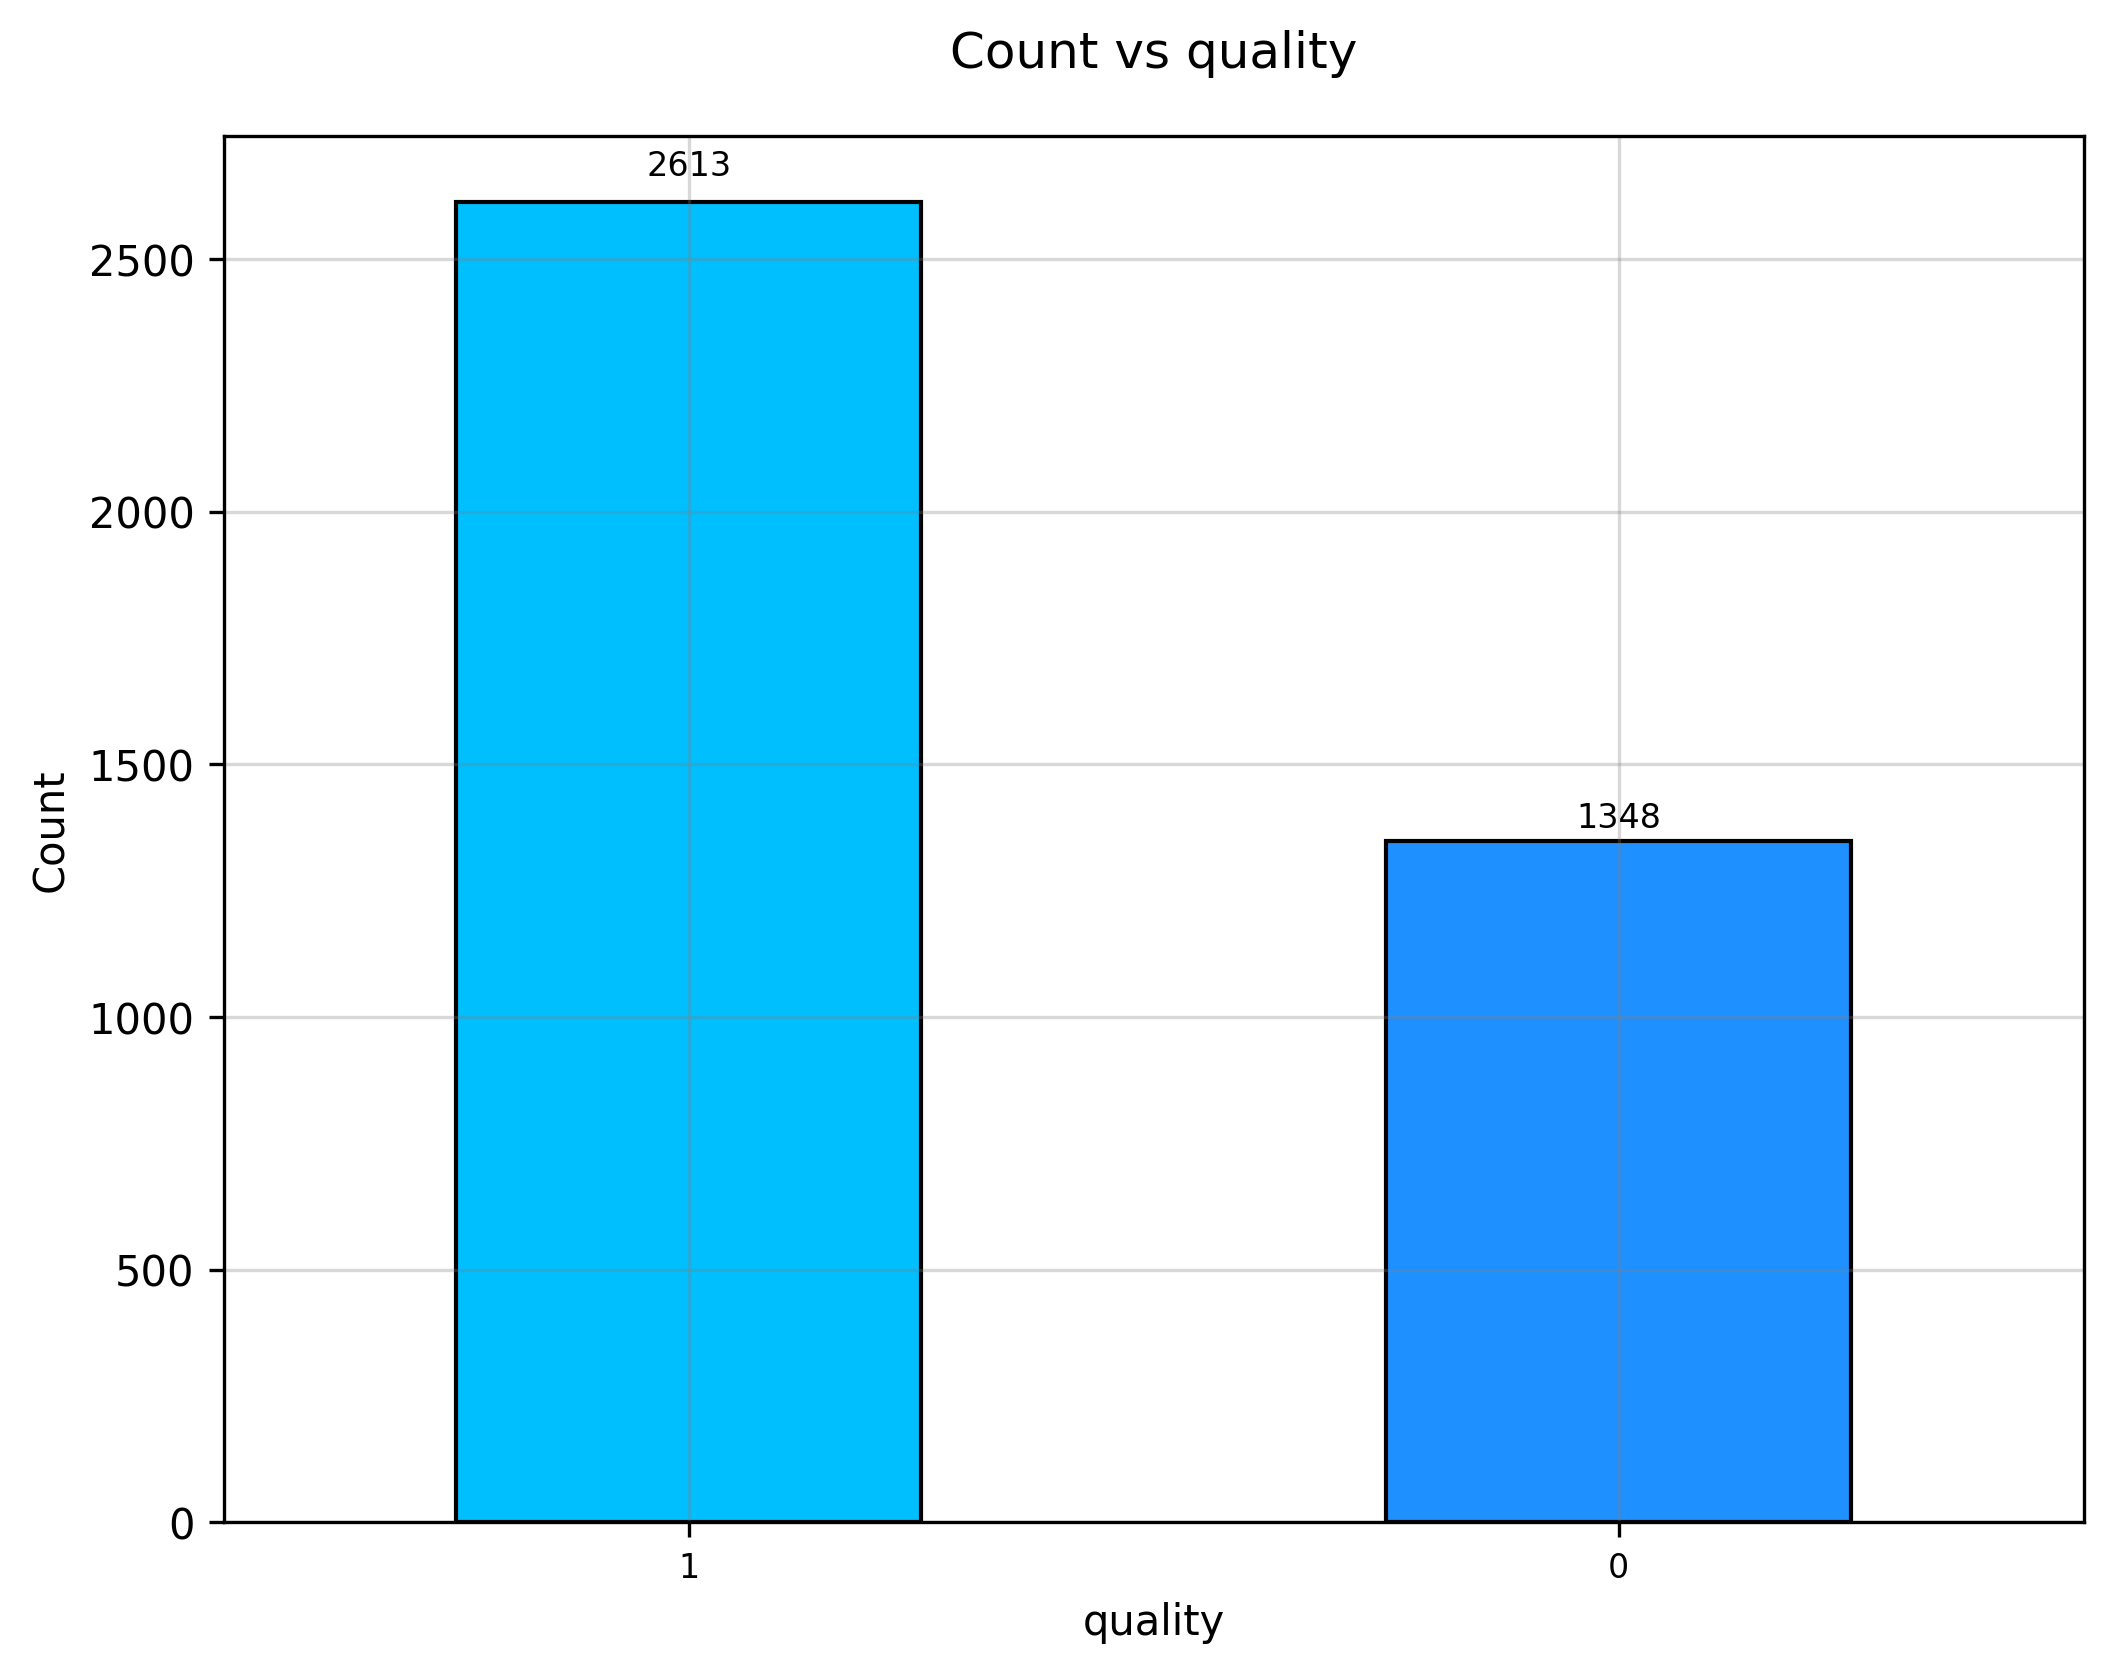

In [22]:
count_plot('quality')

<h1>Feature Statistics per target variable</h1>

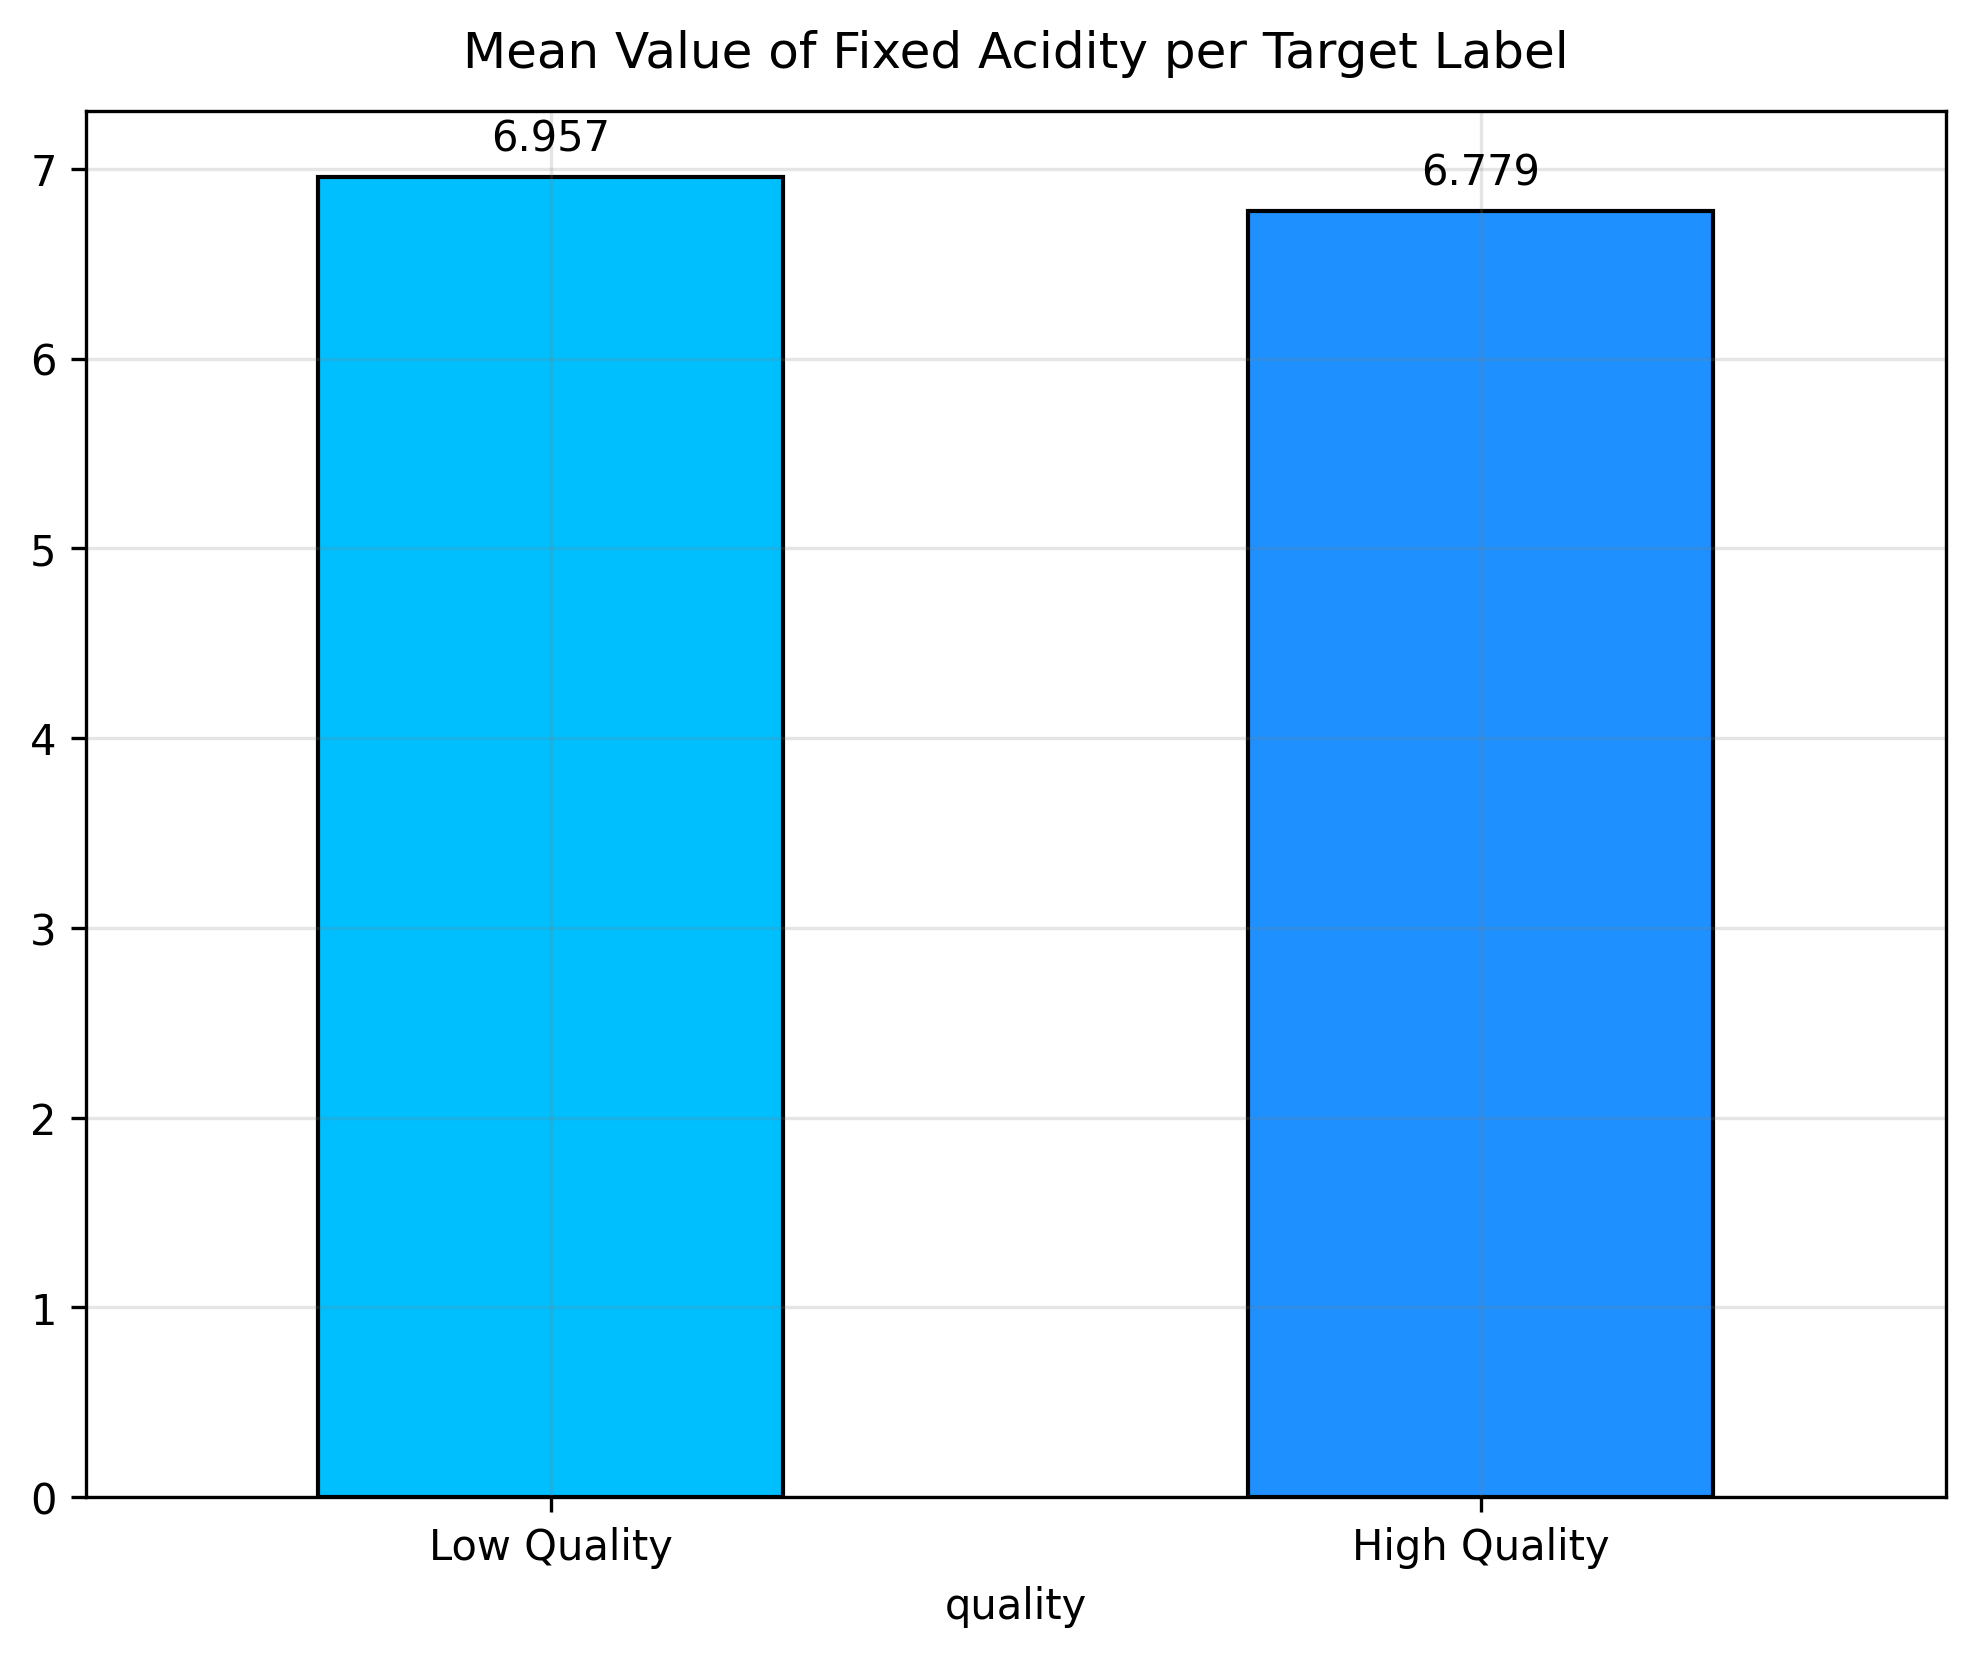

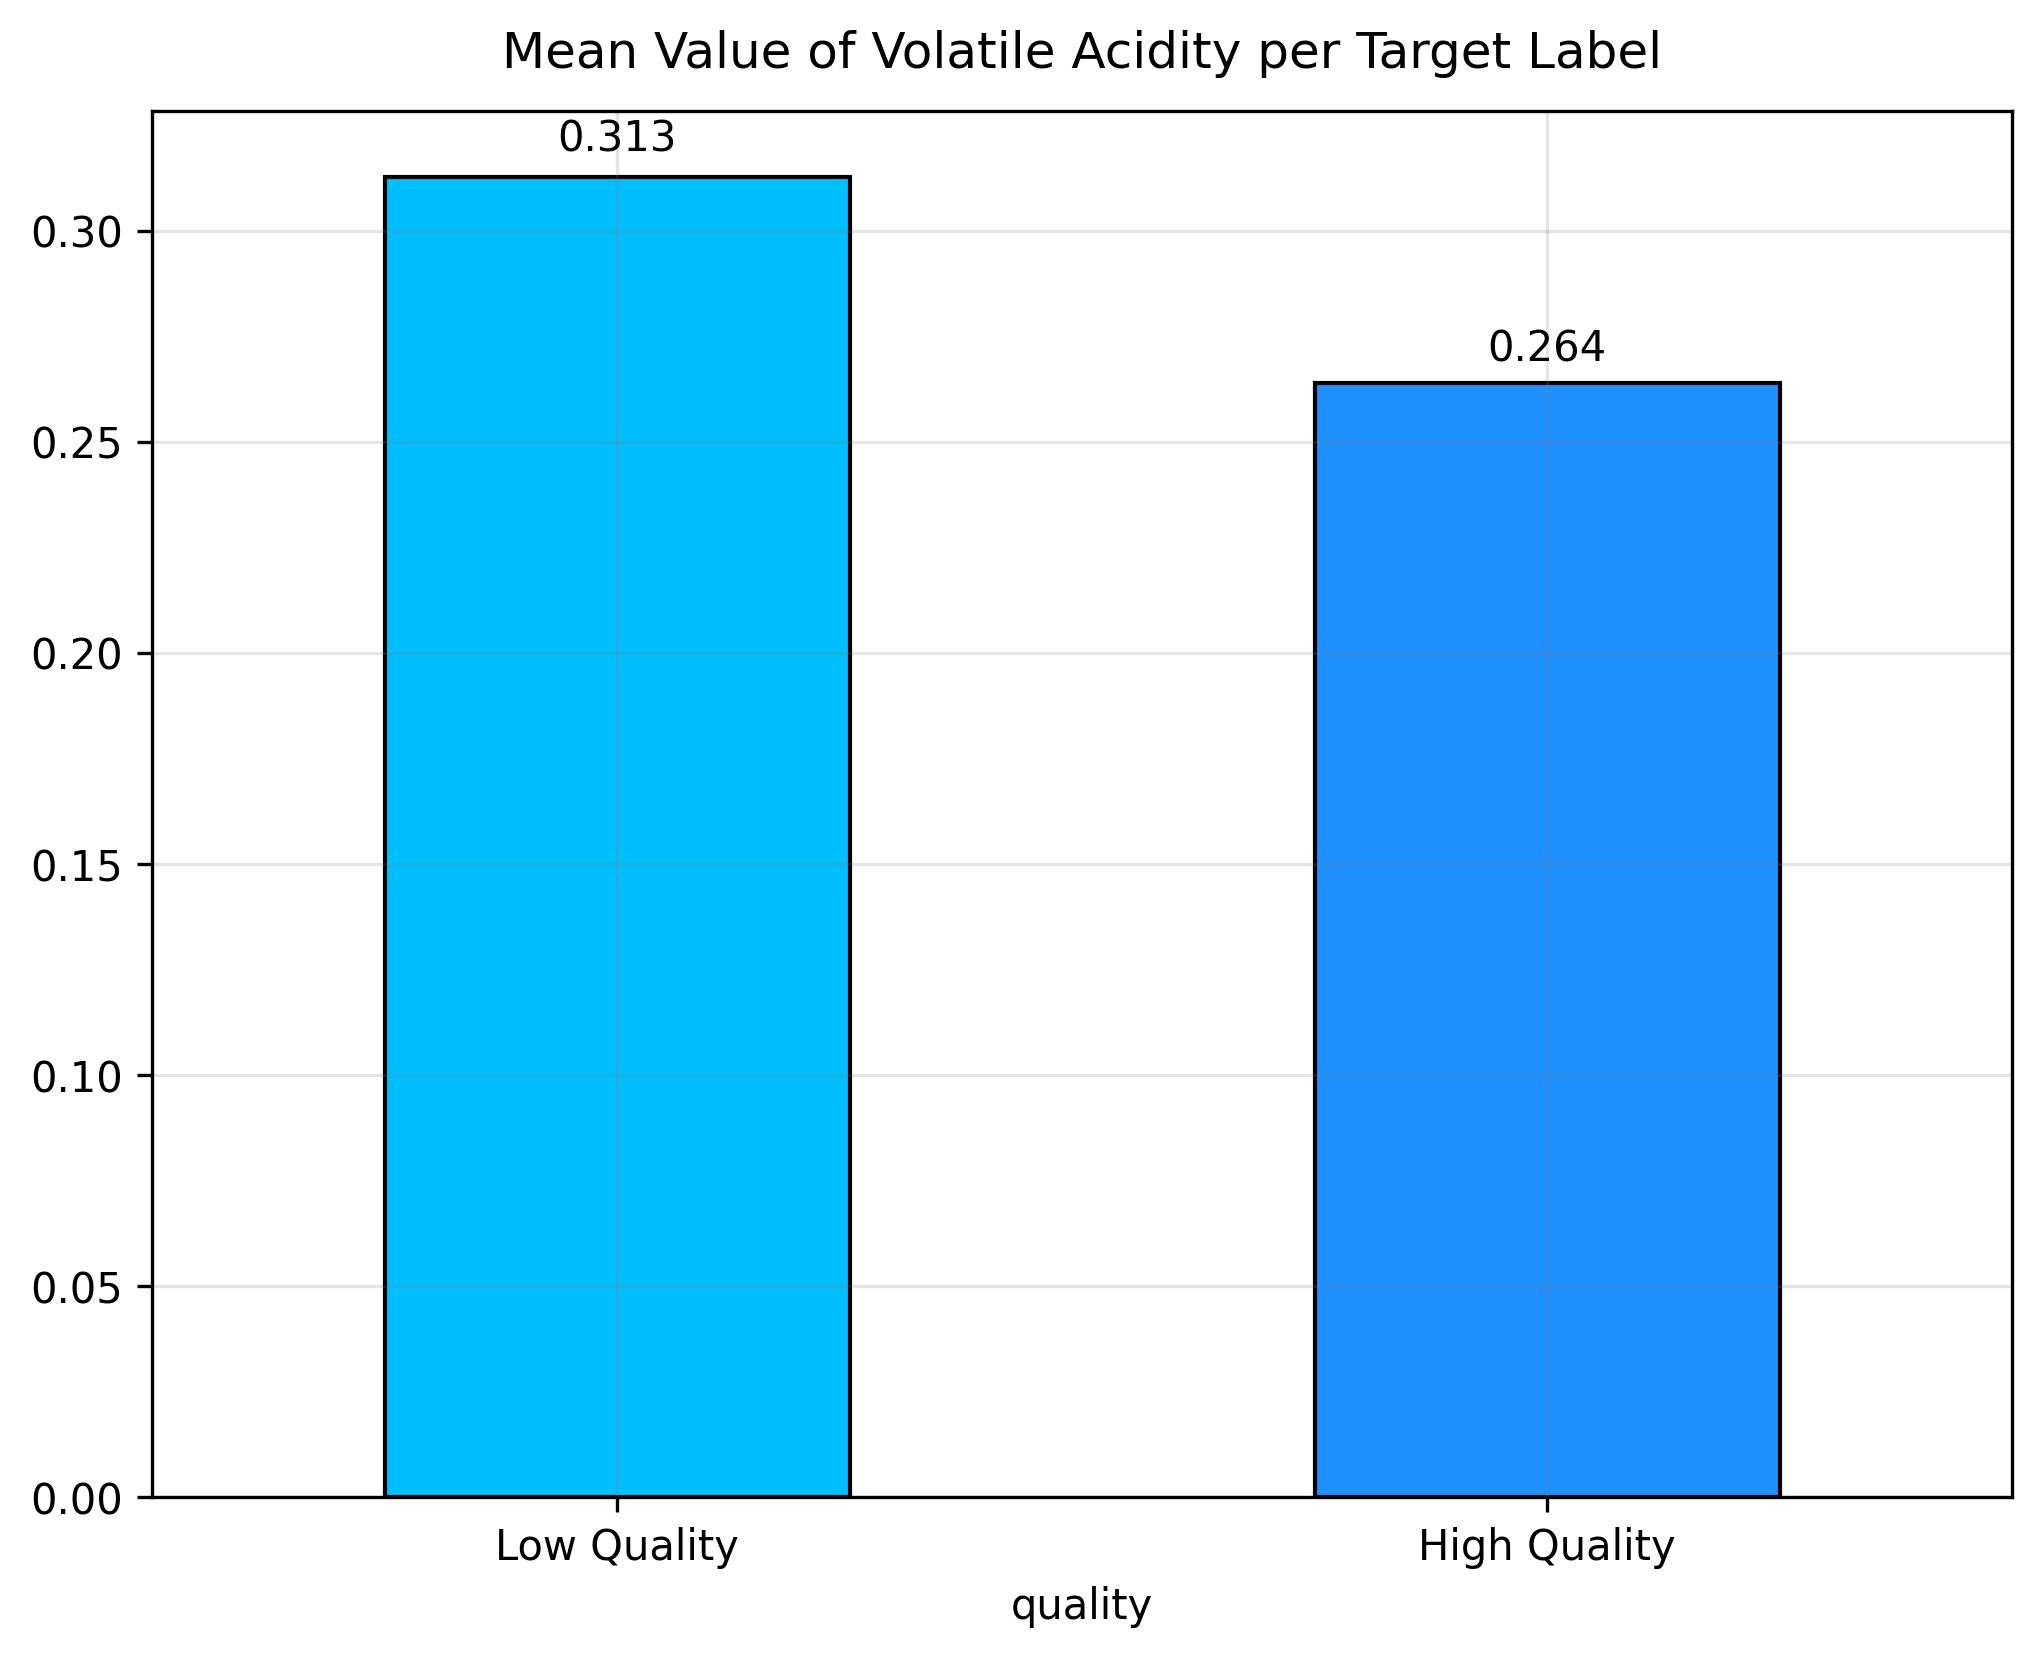

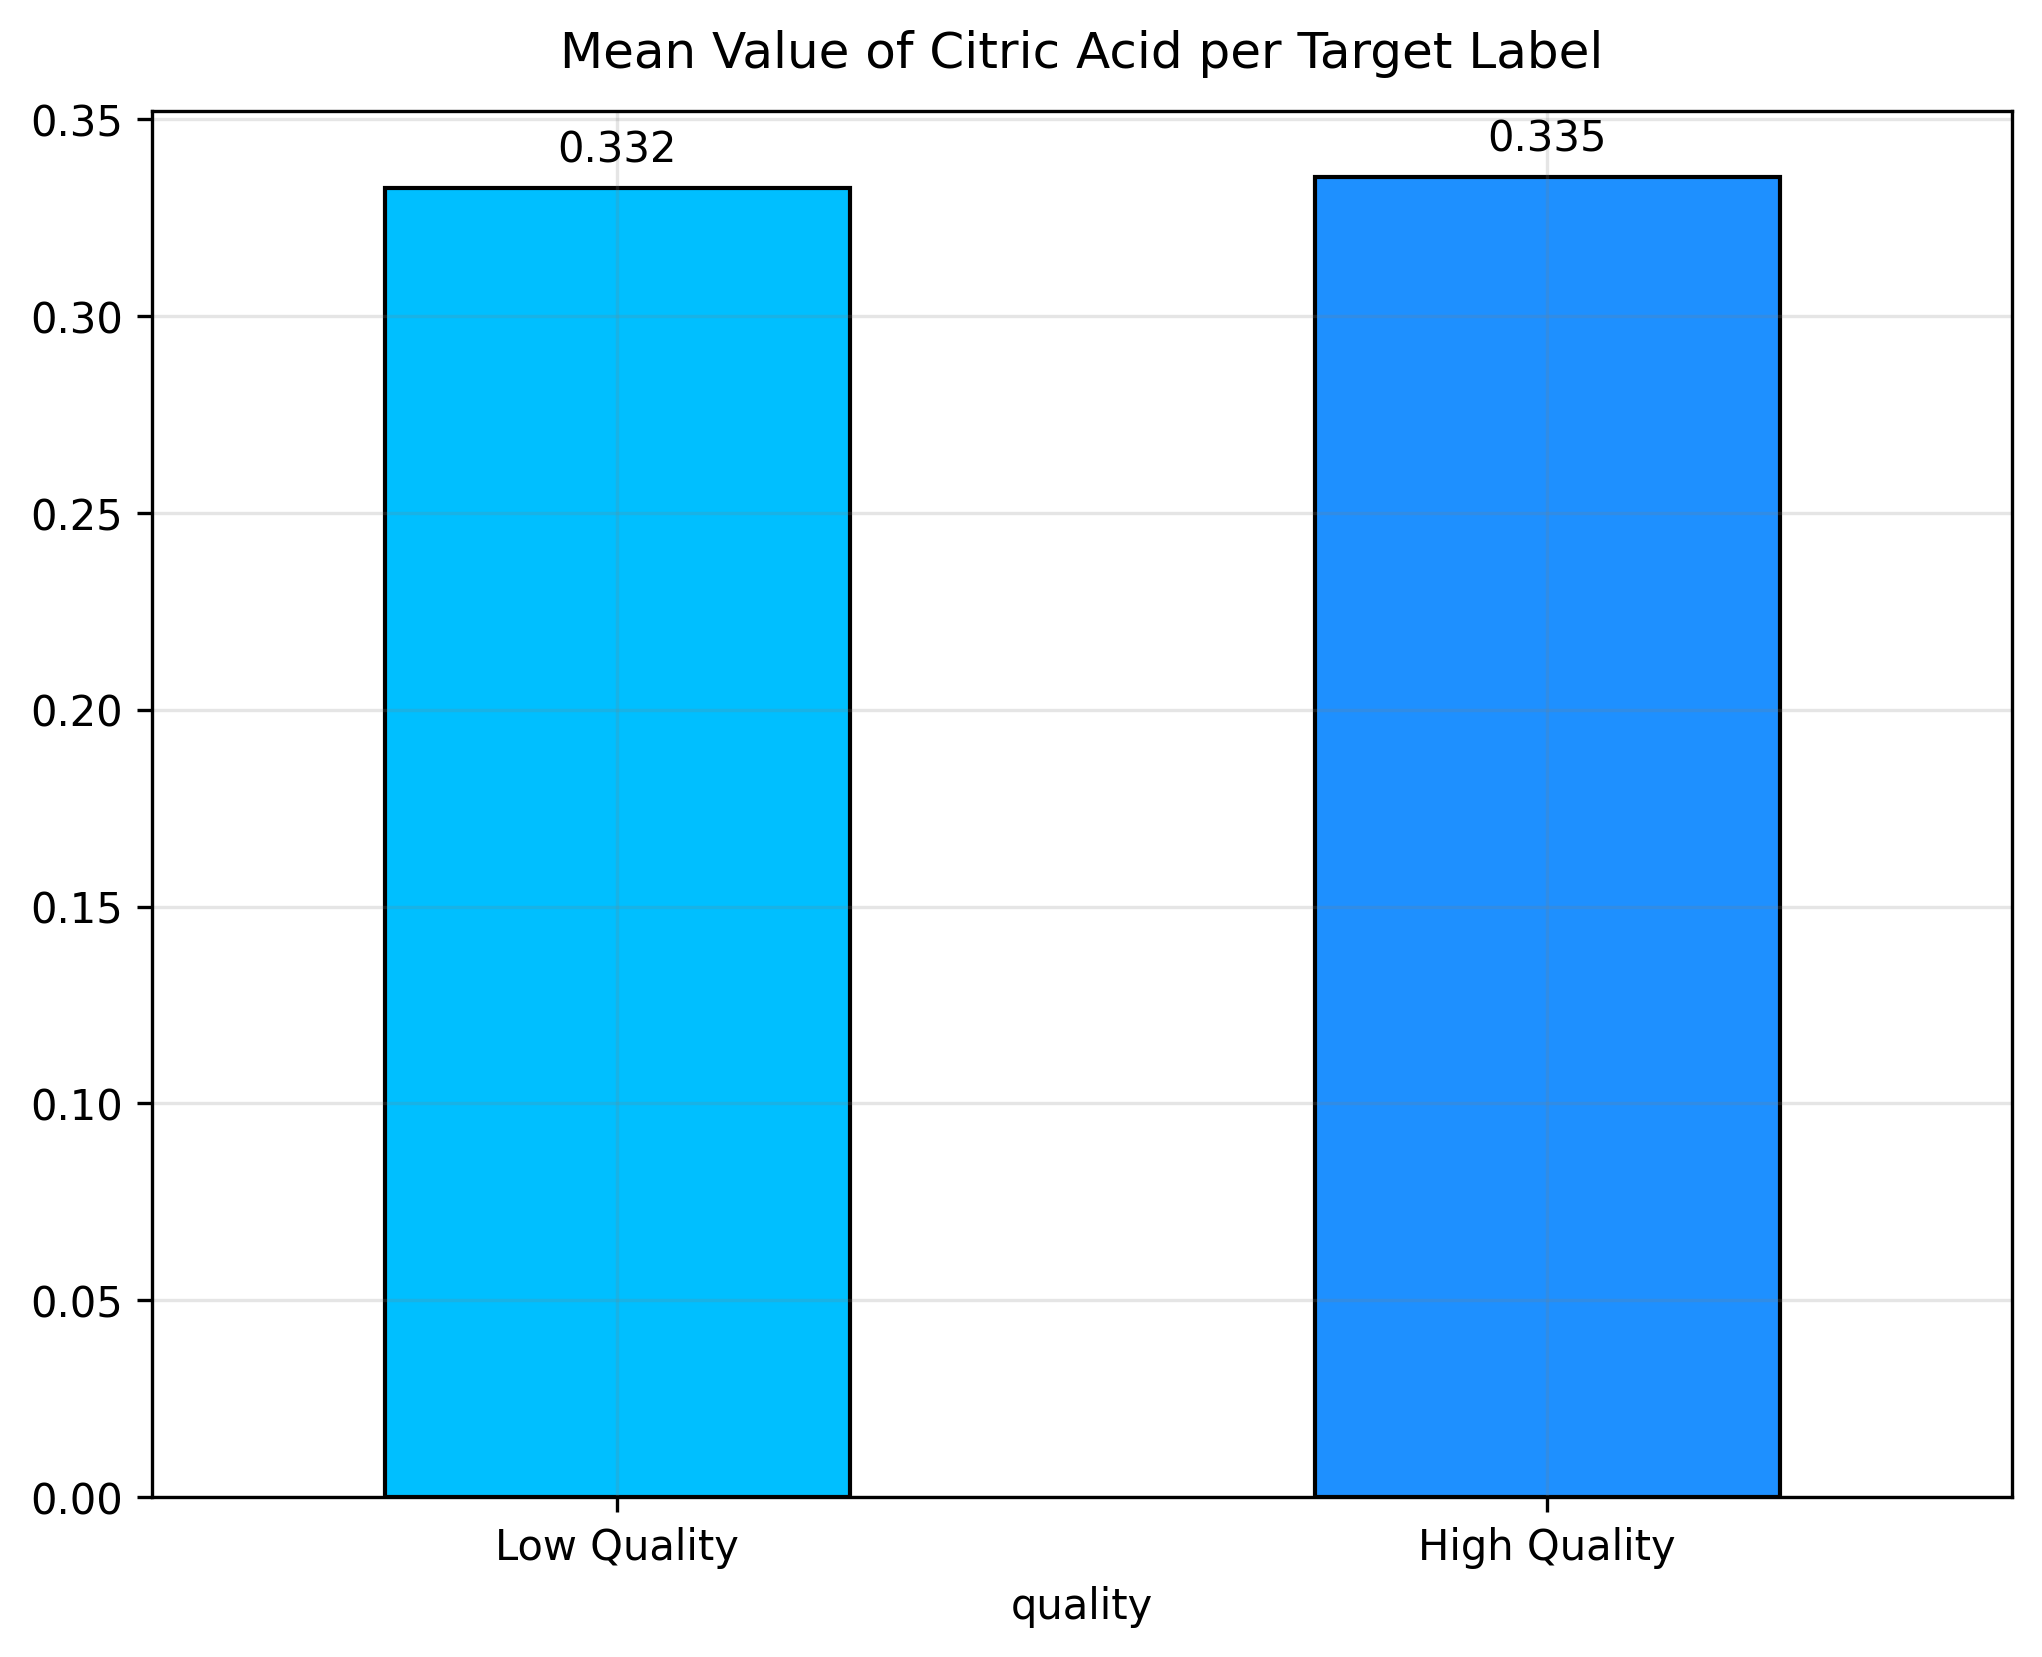

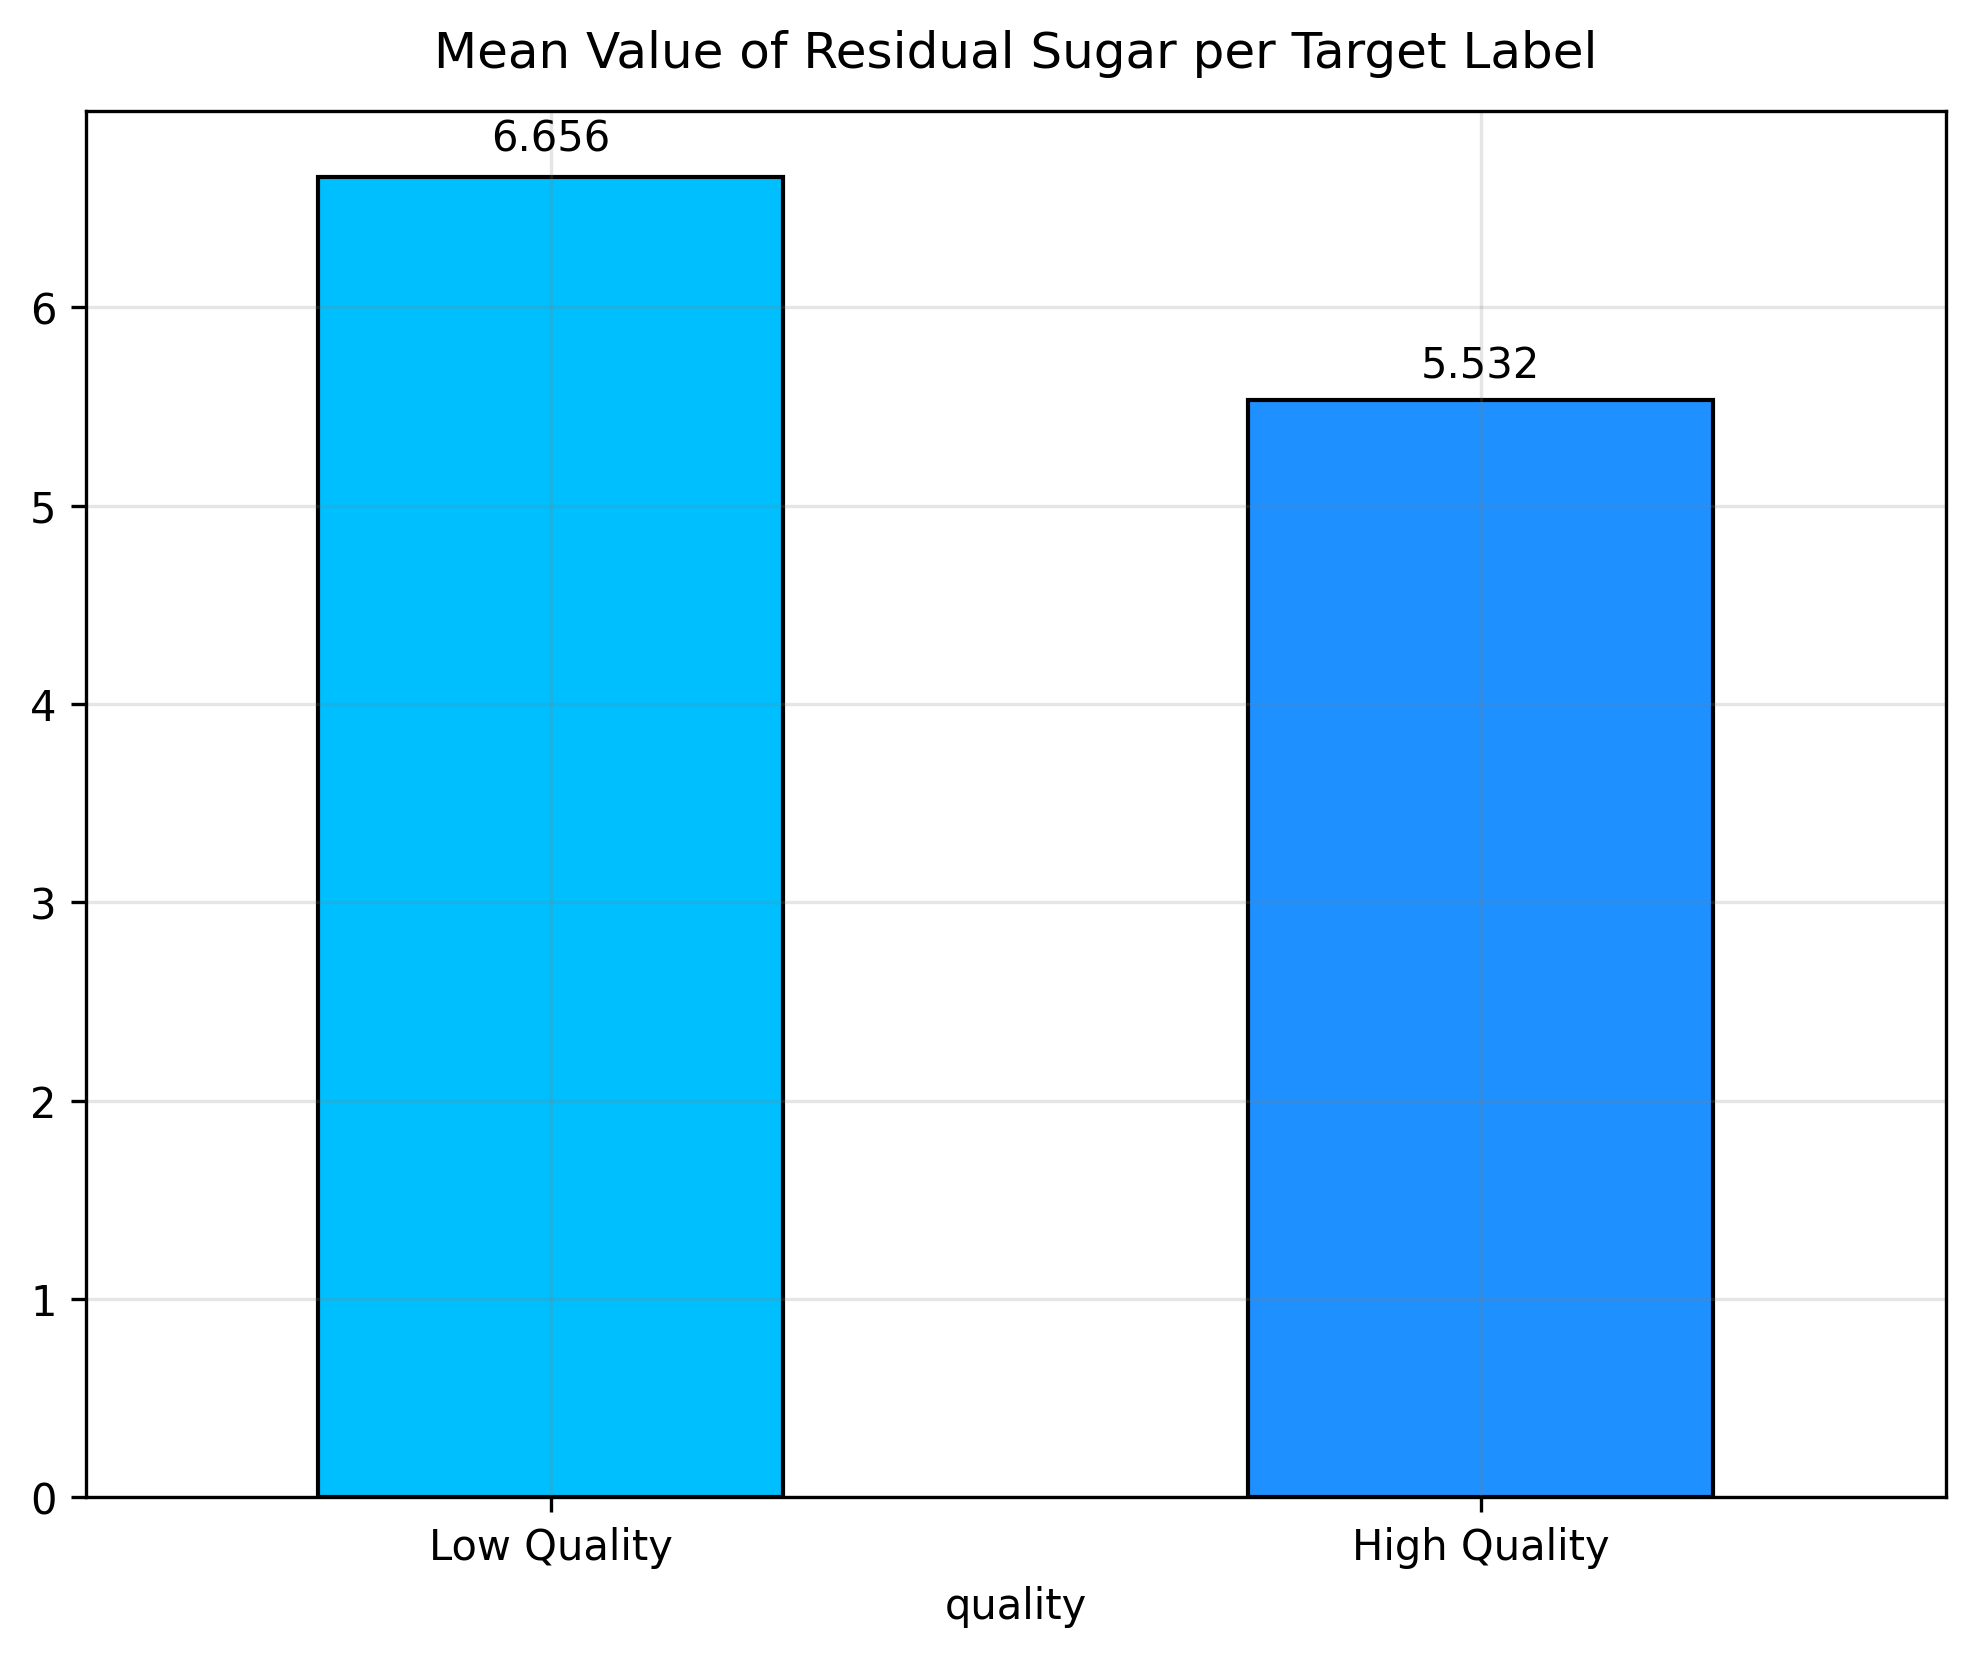

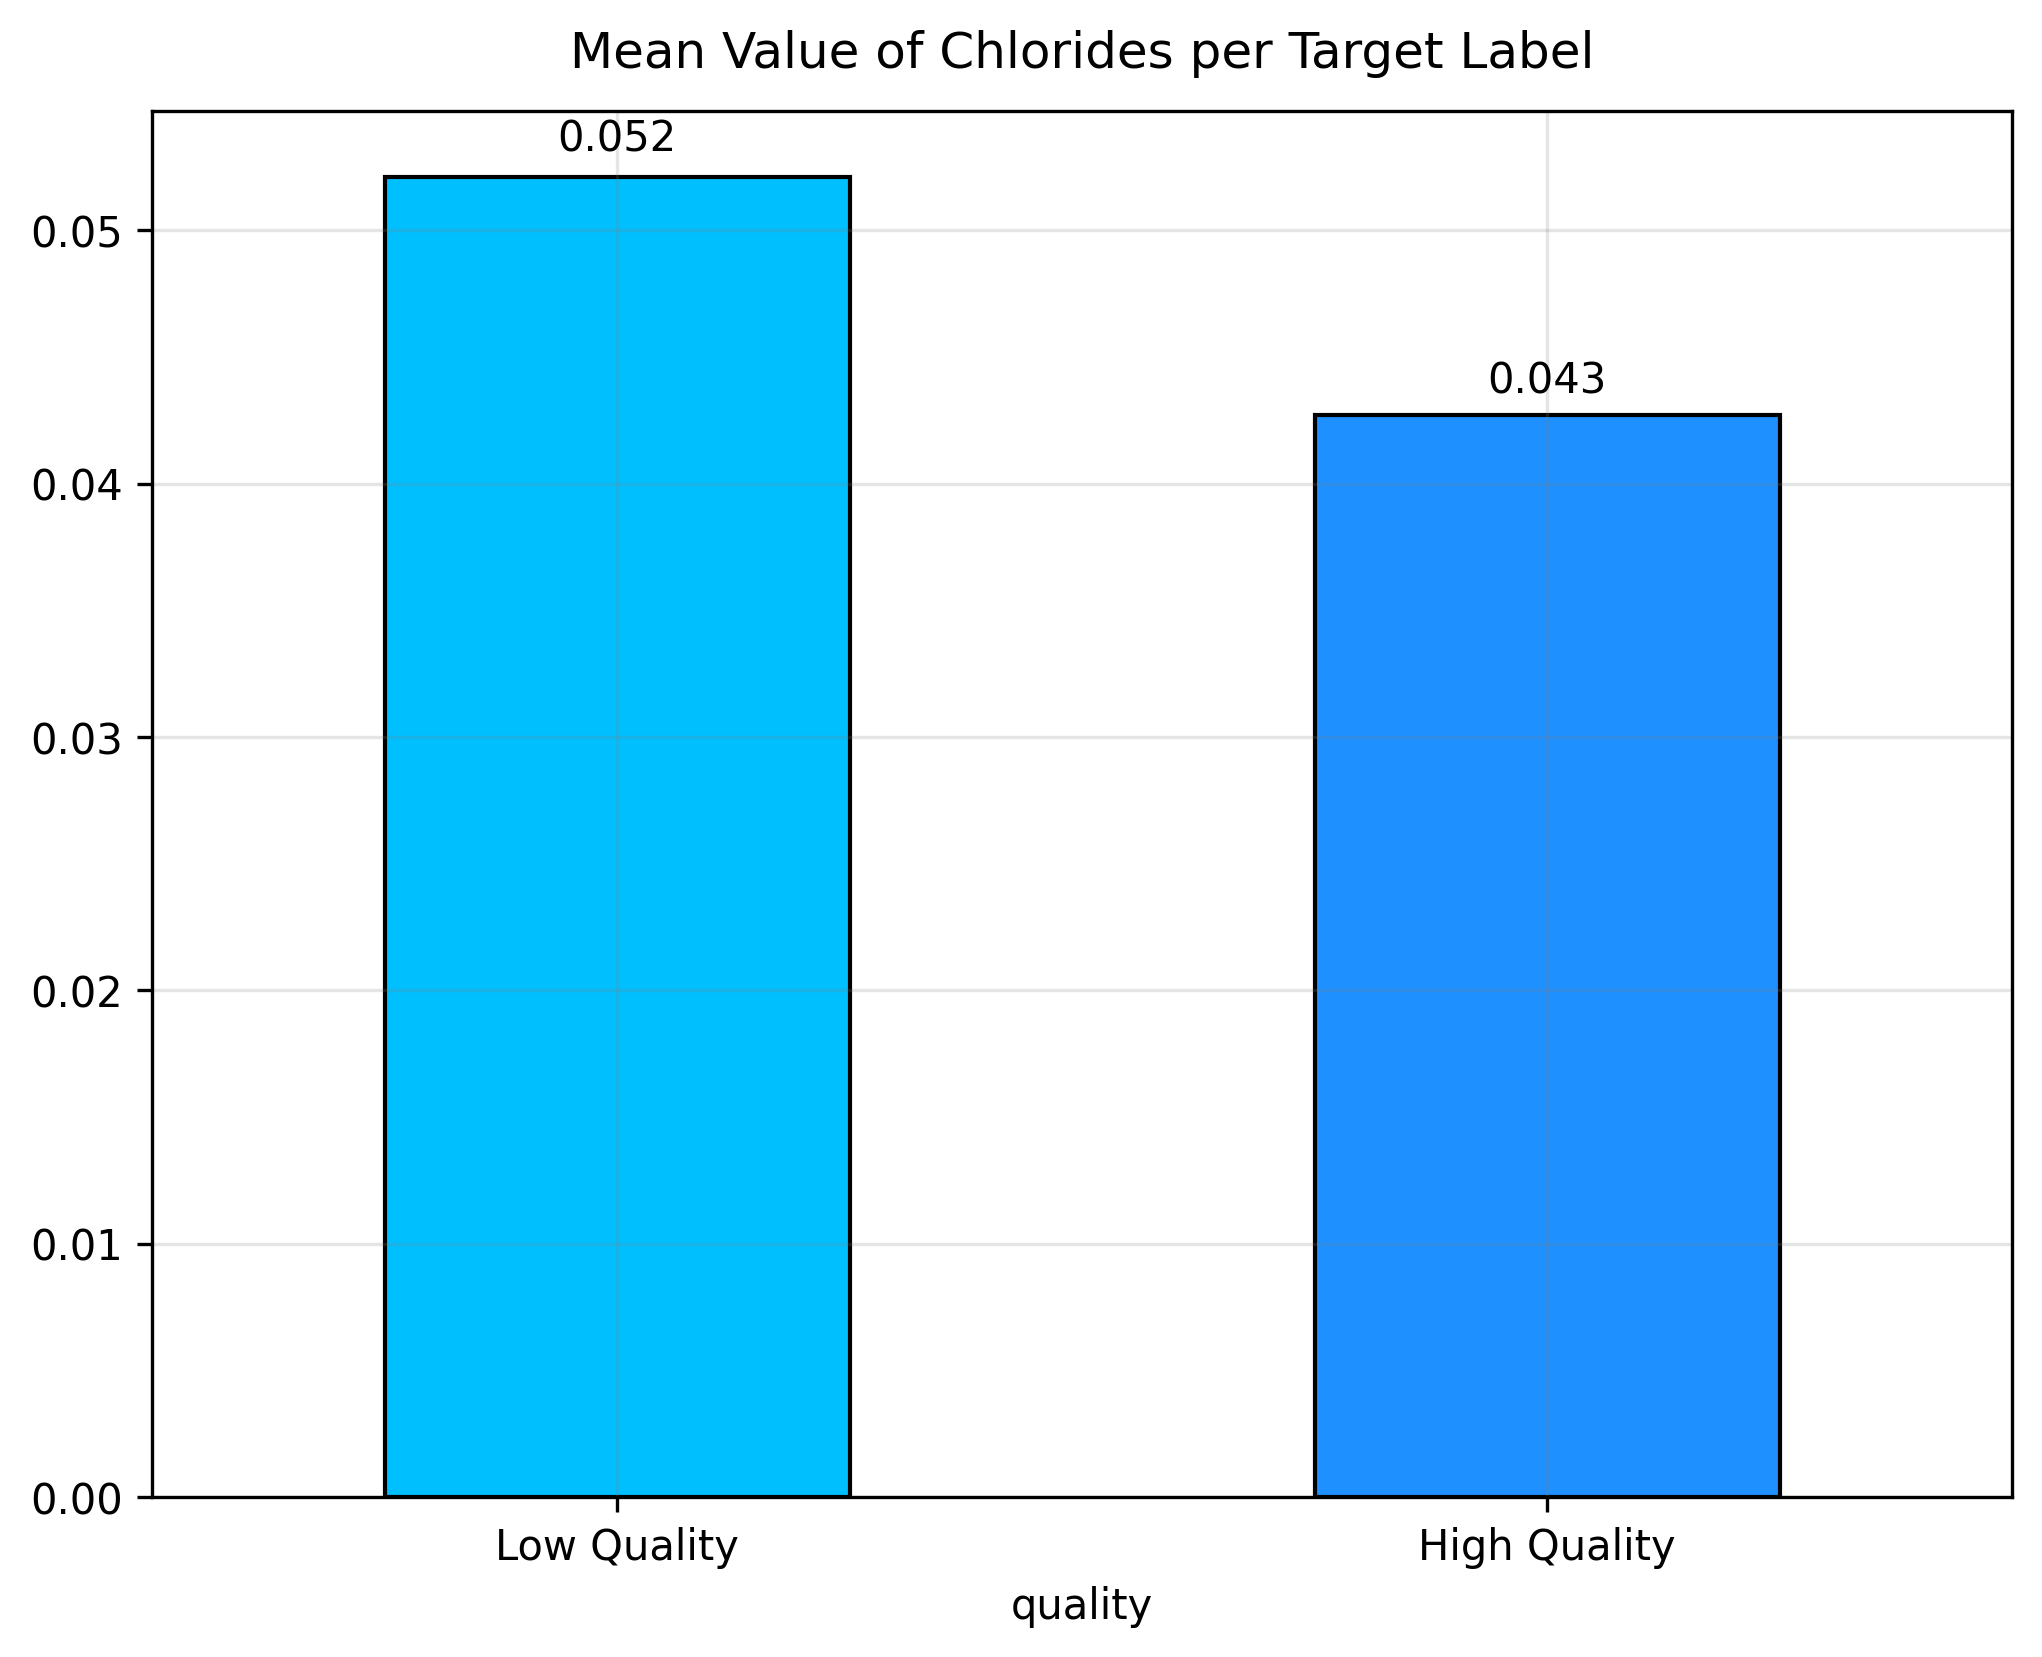

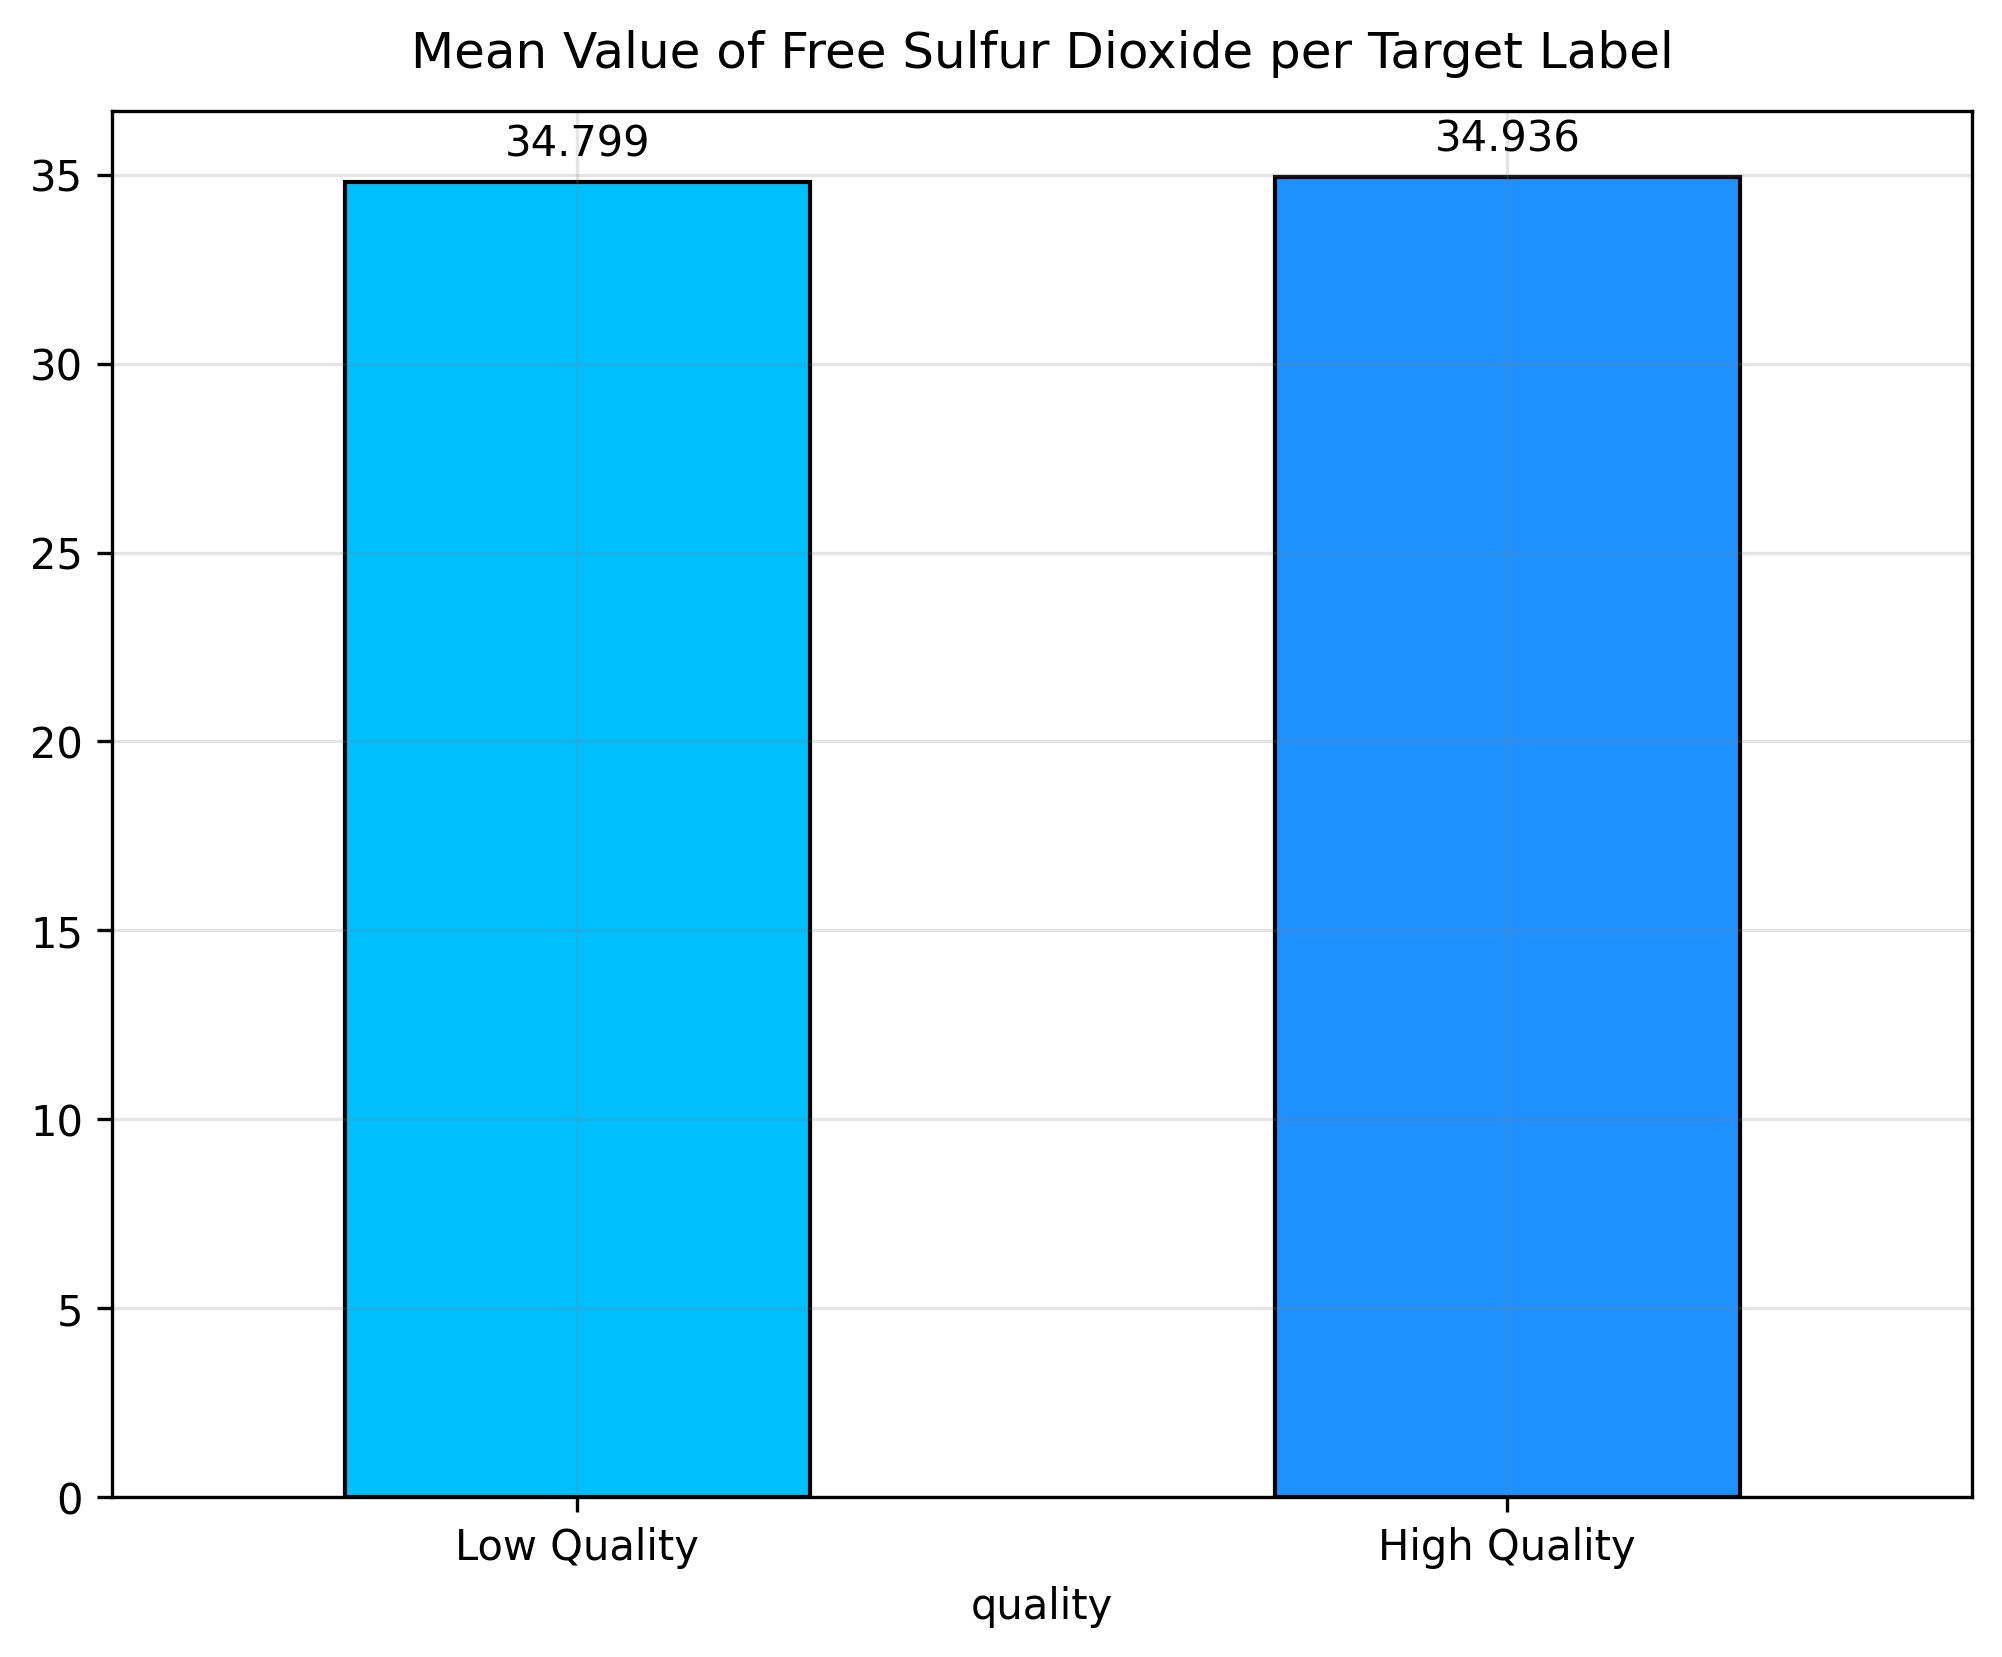

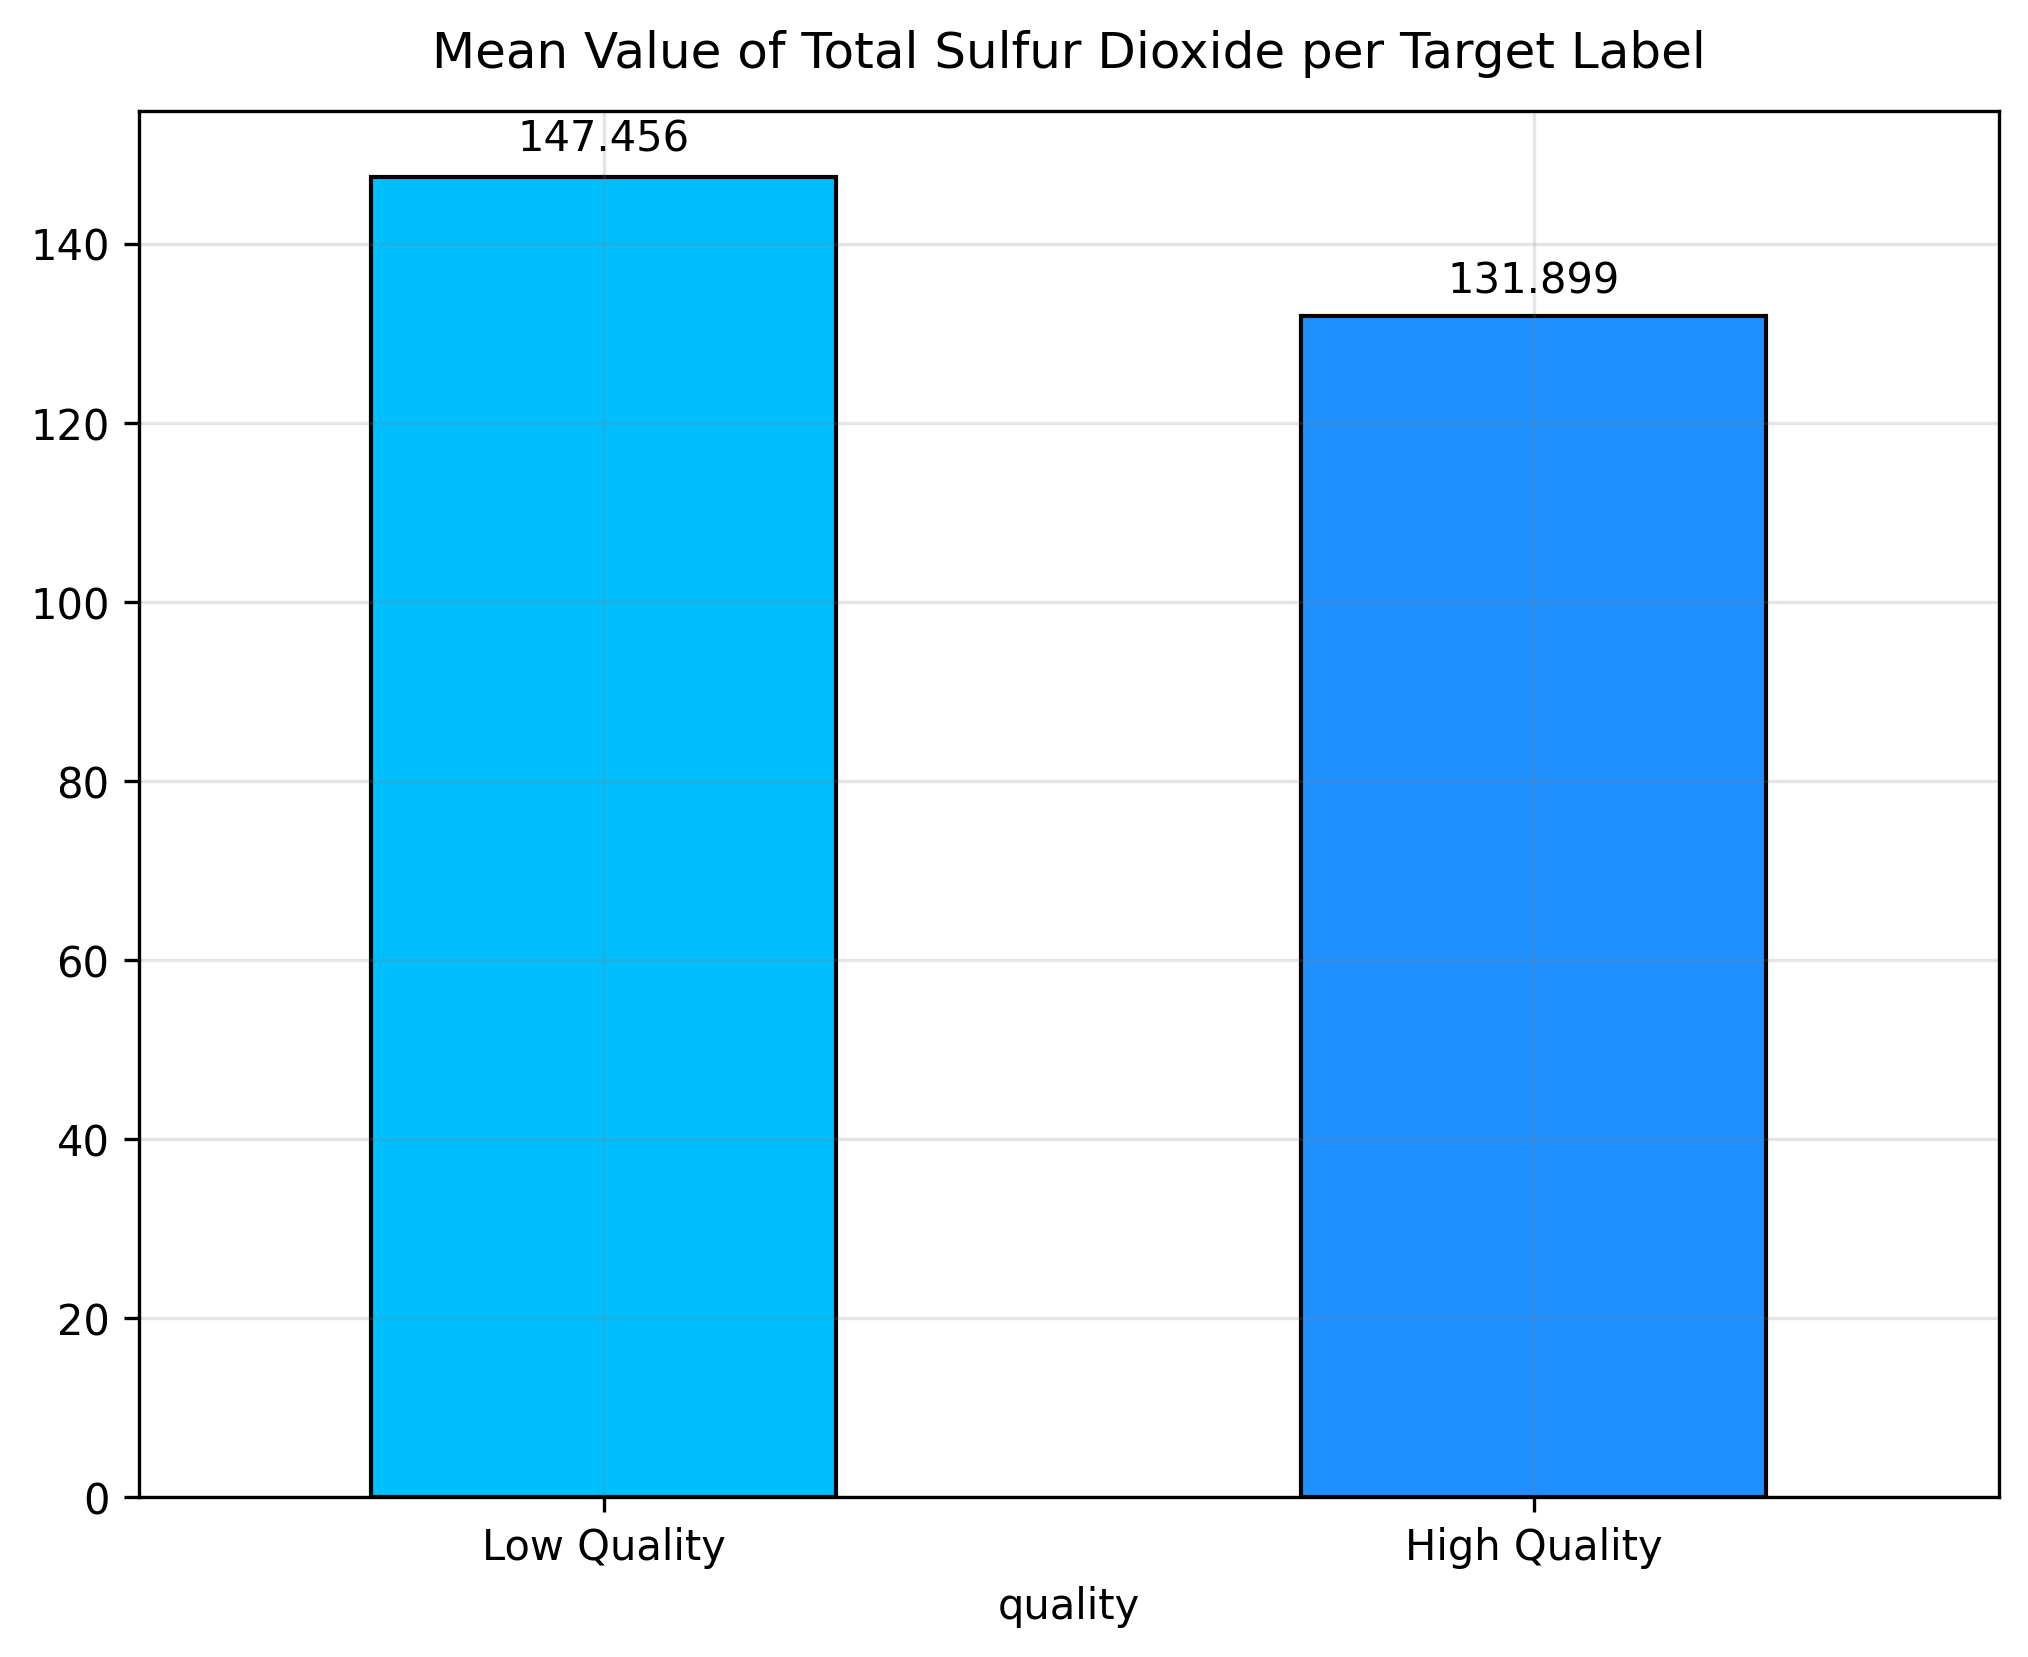

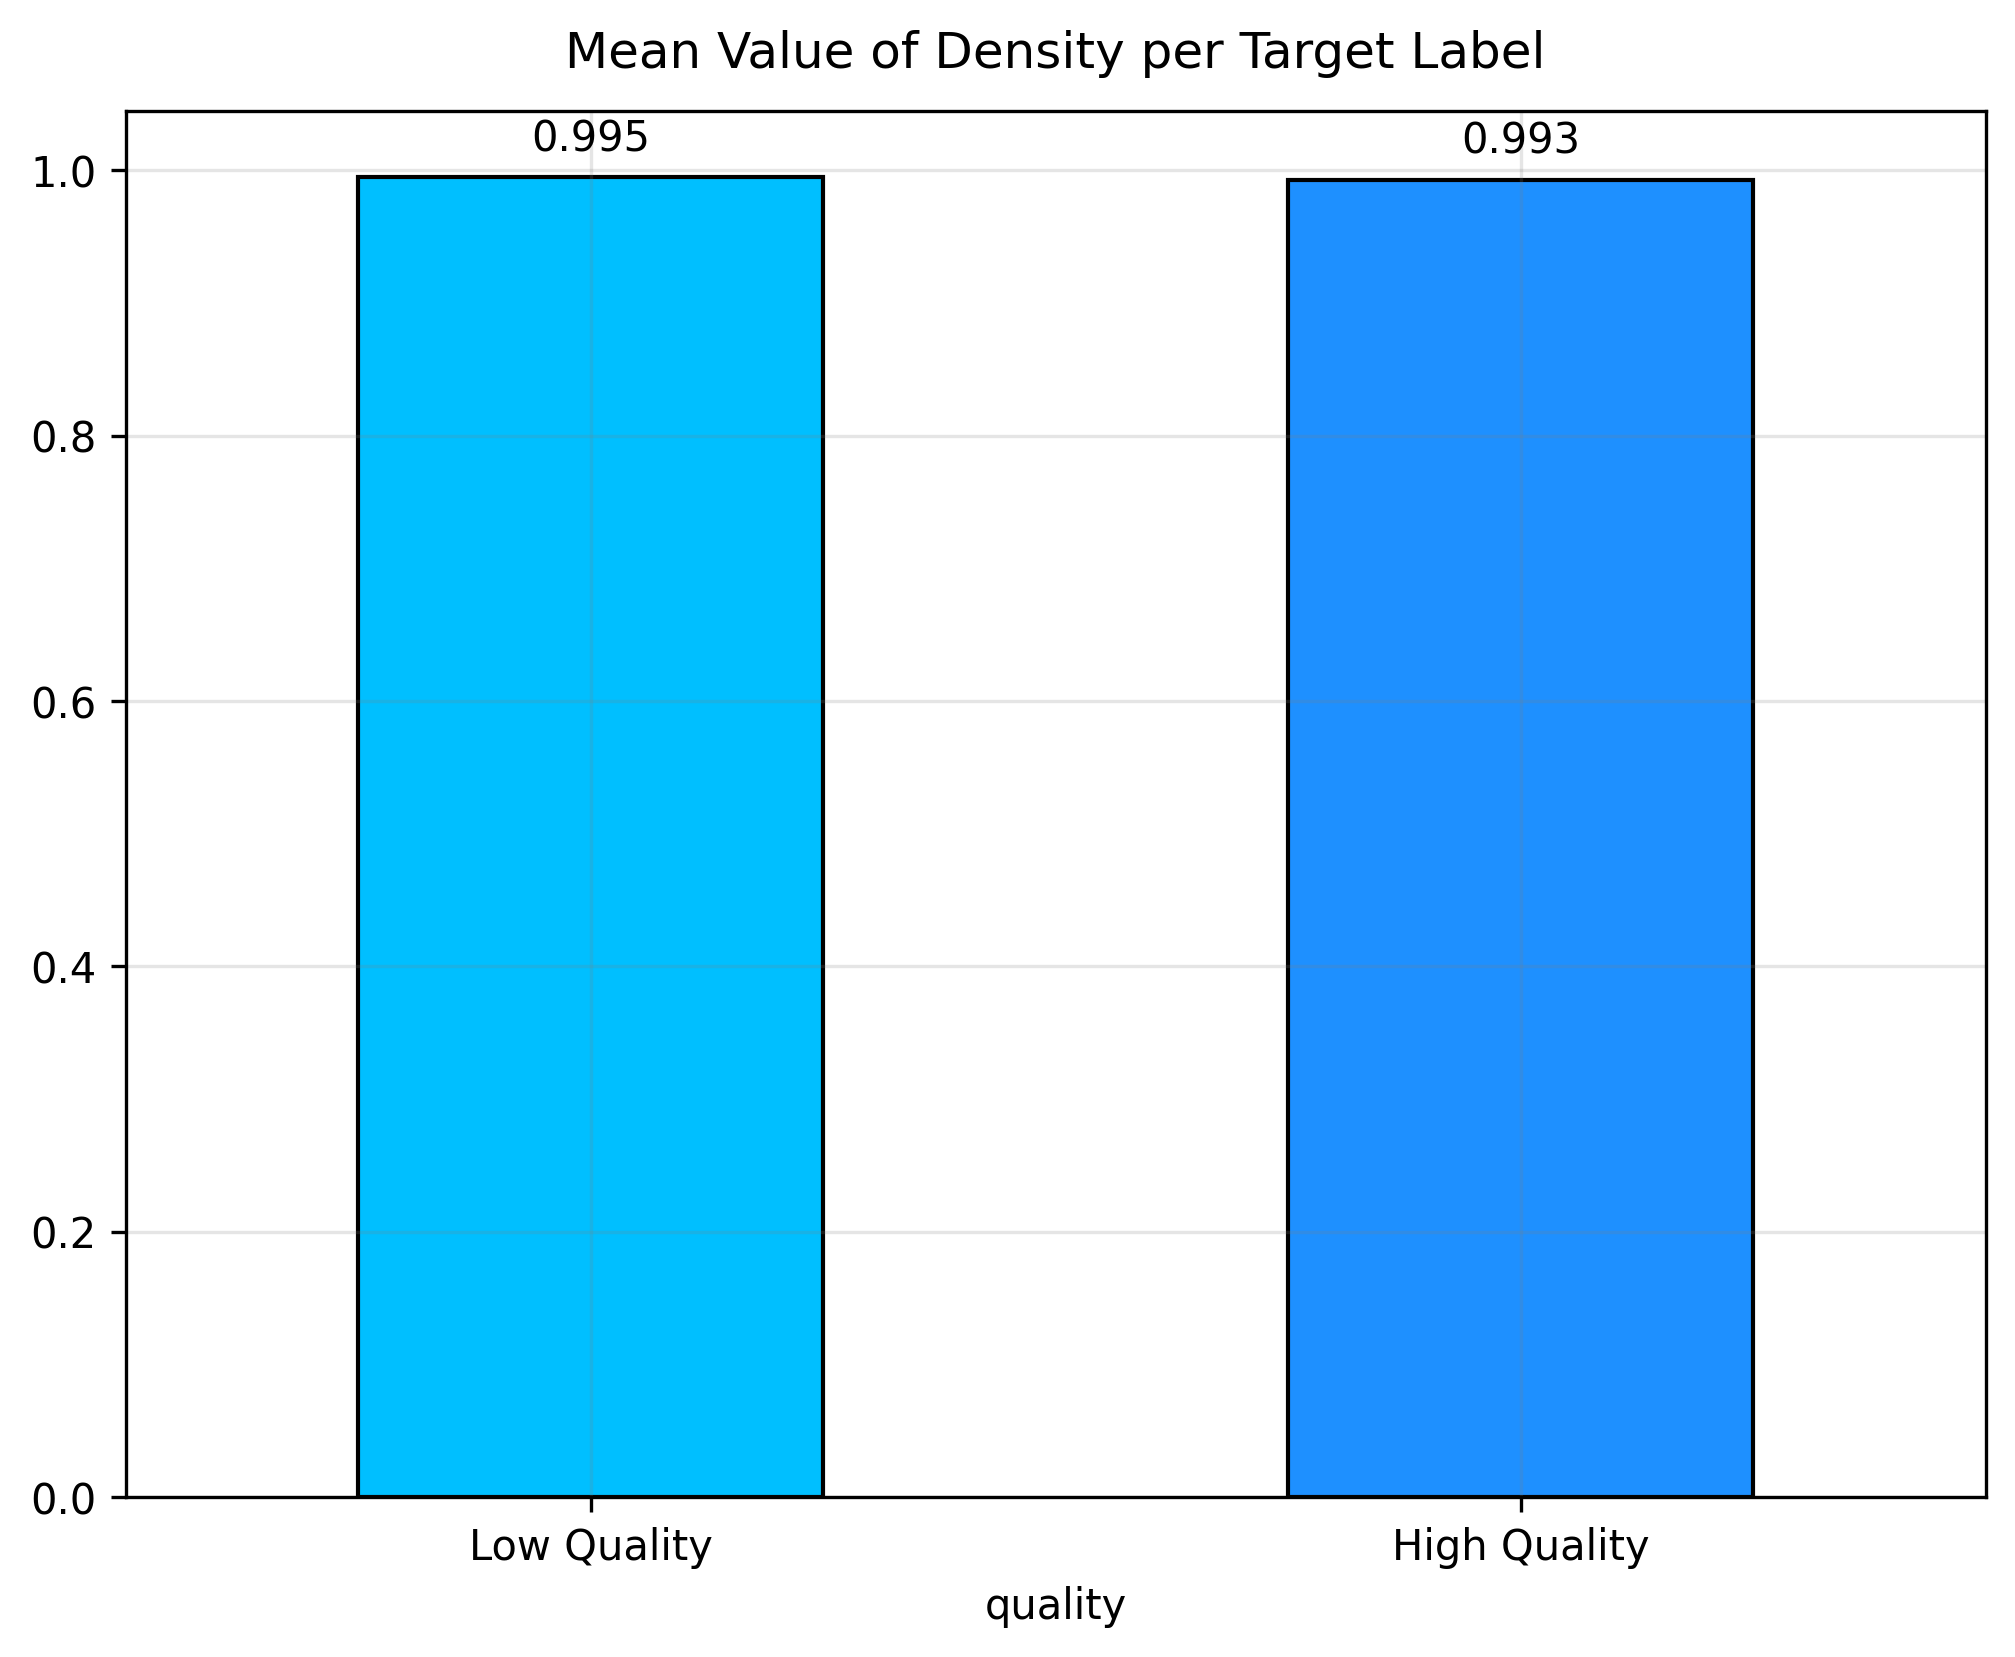

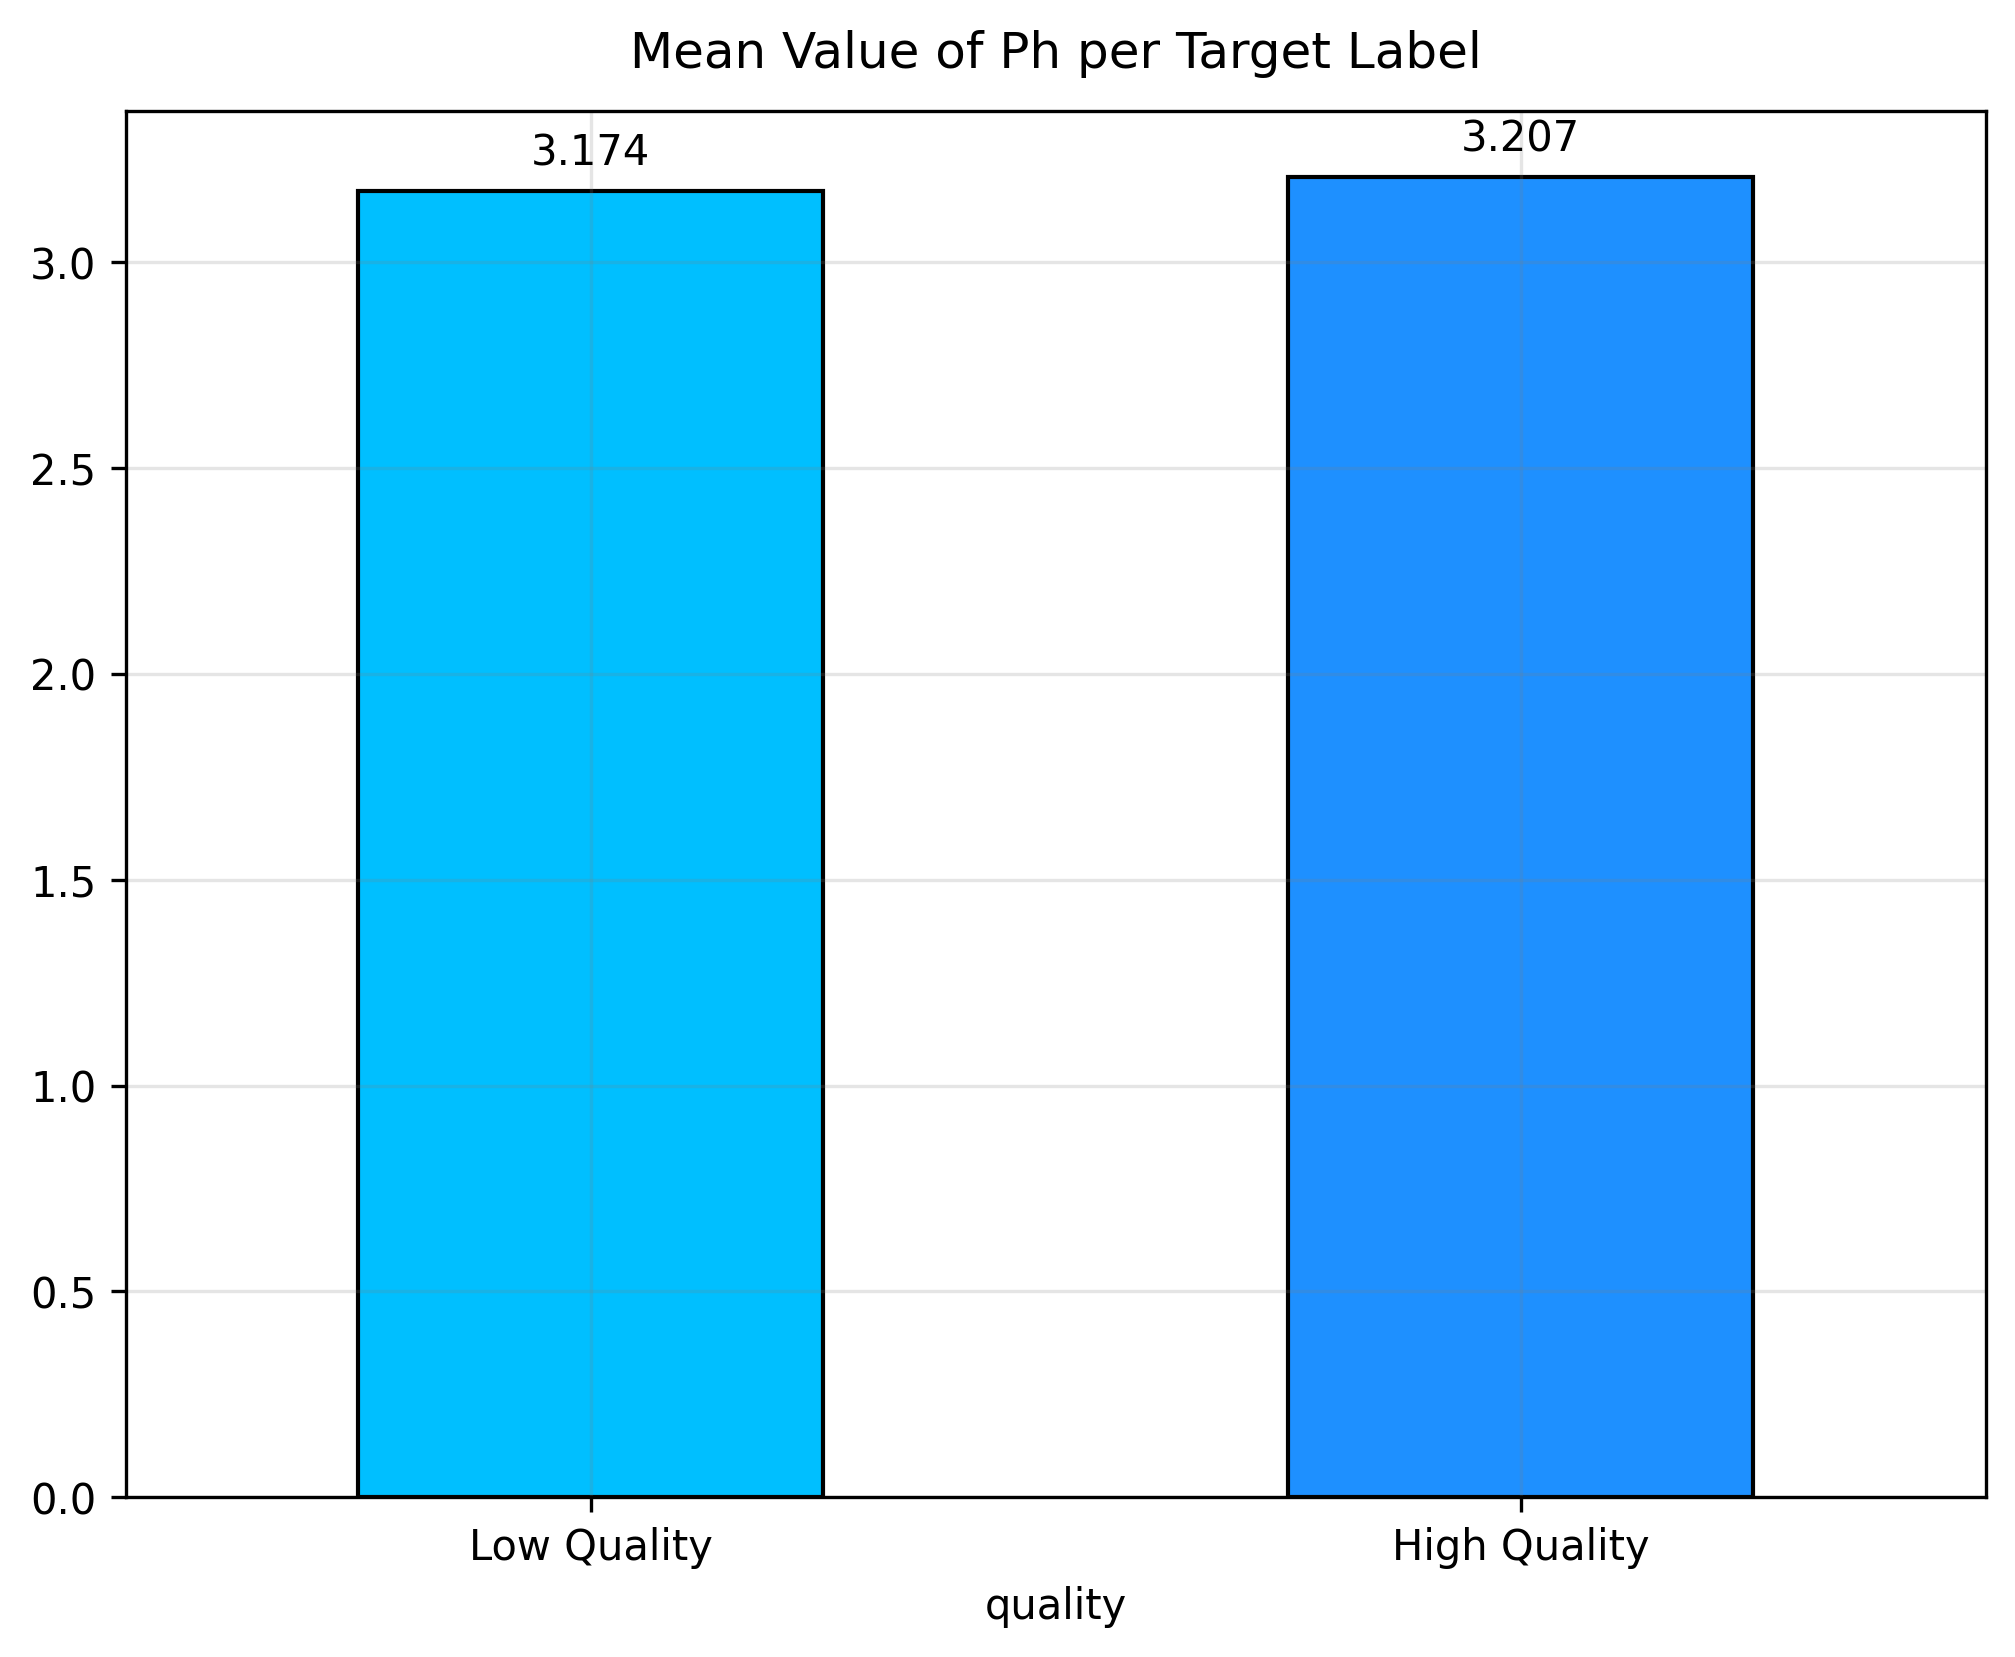

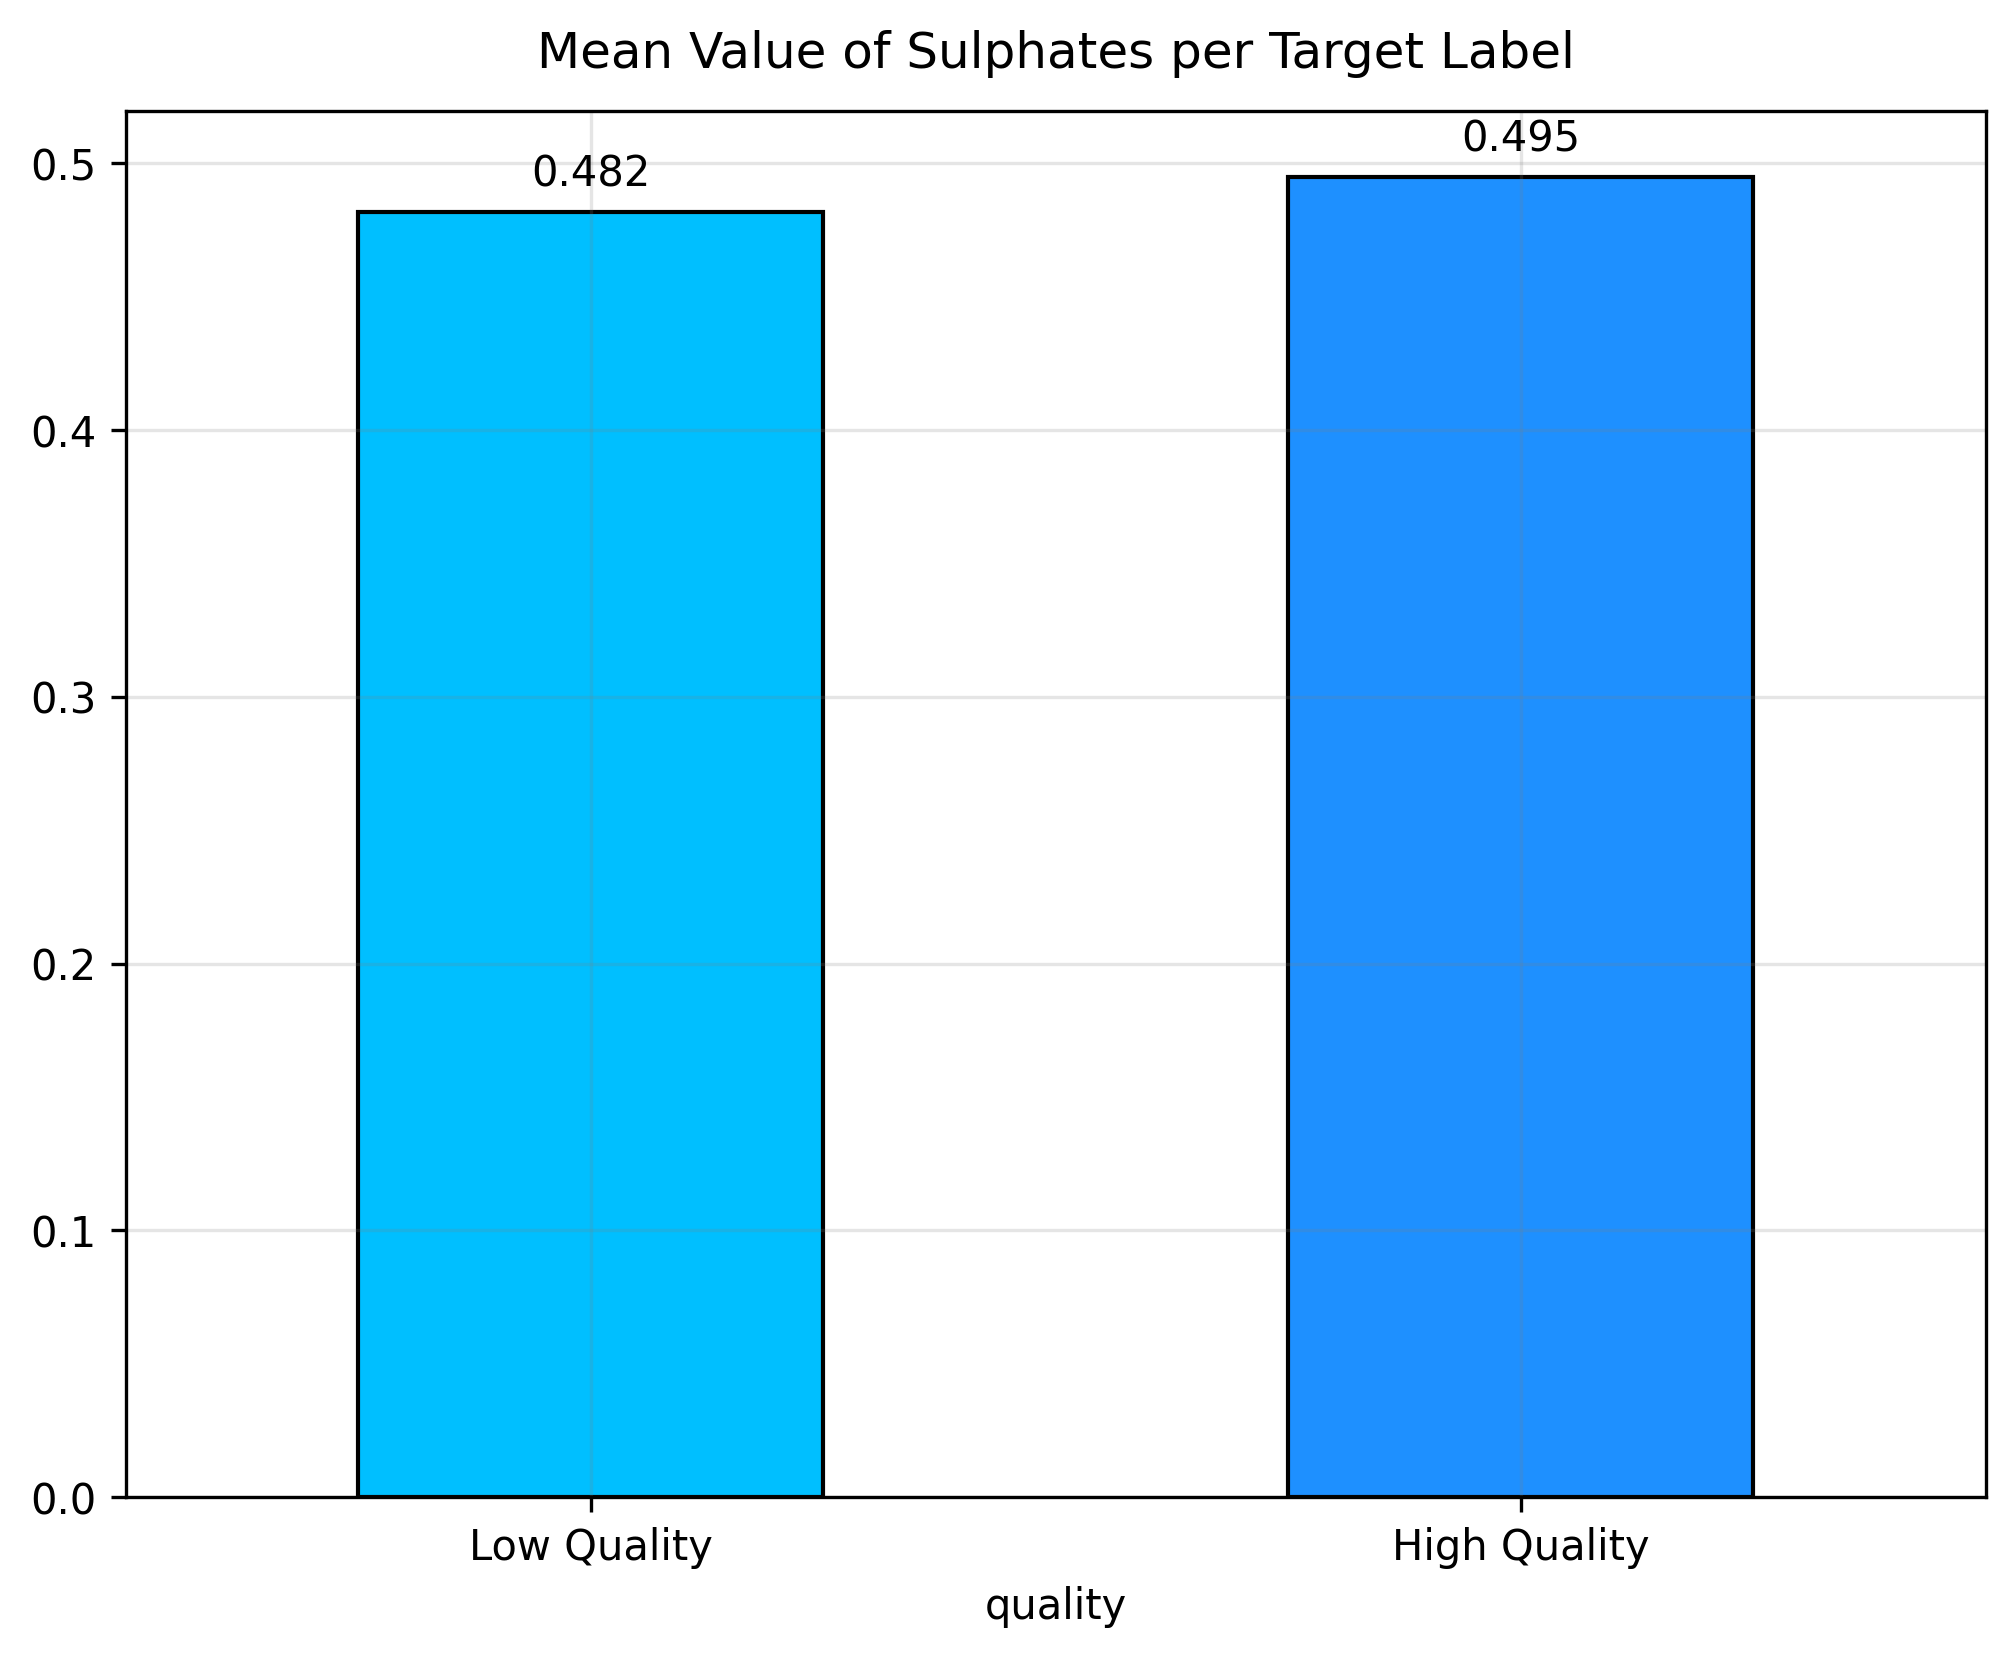

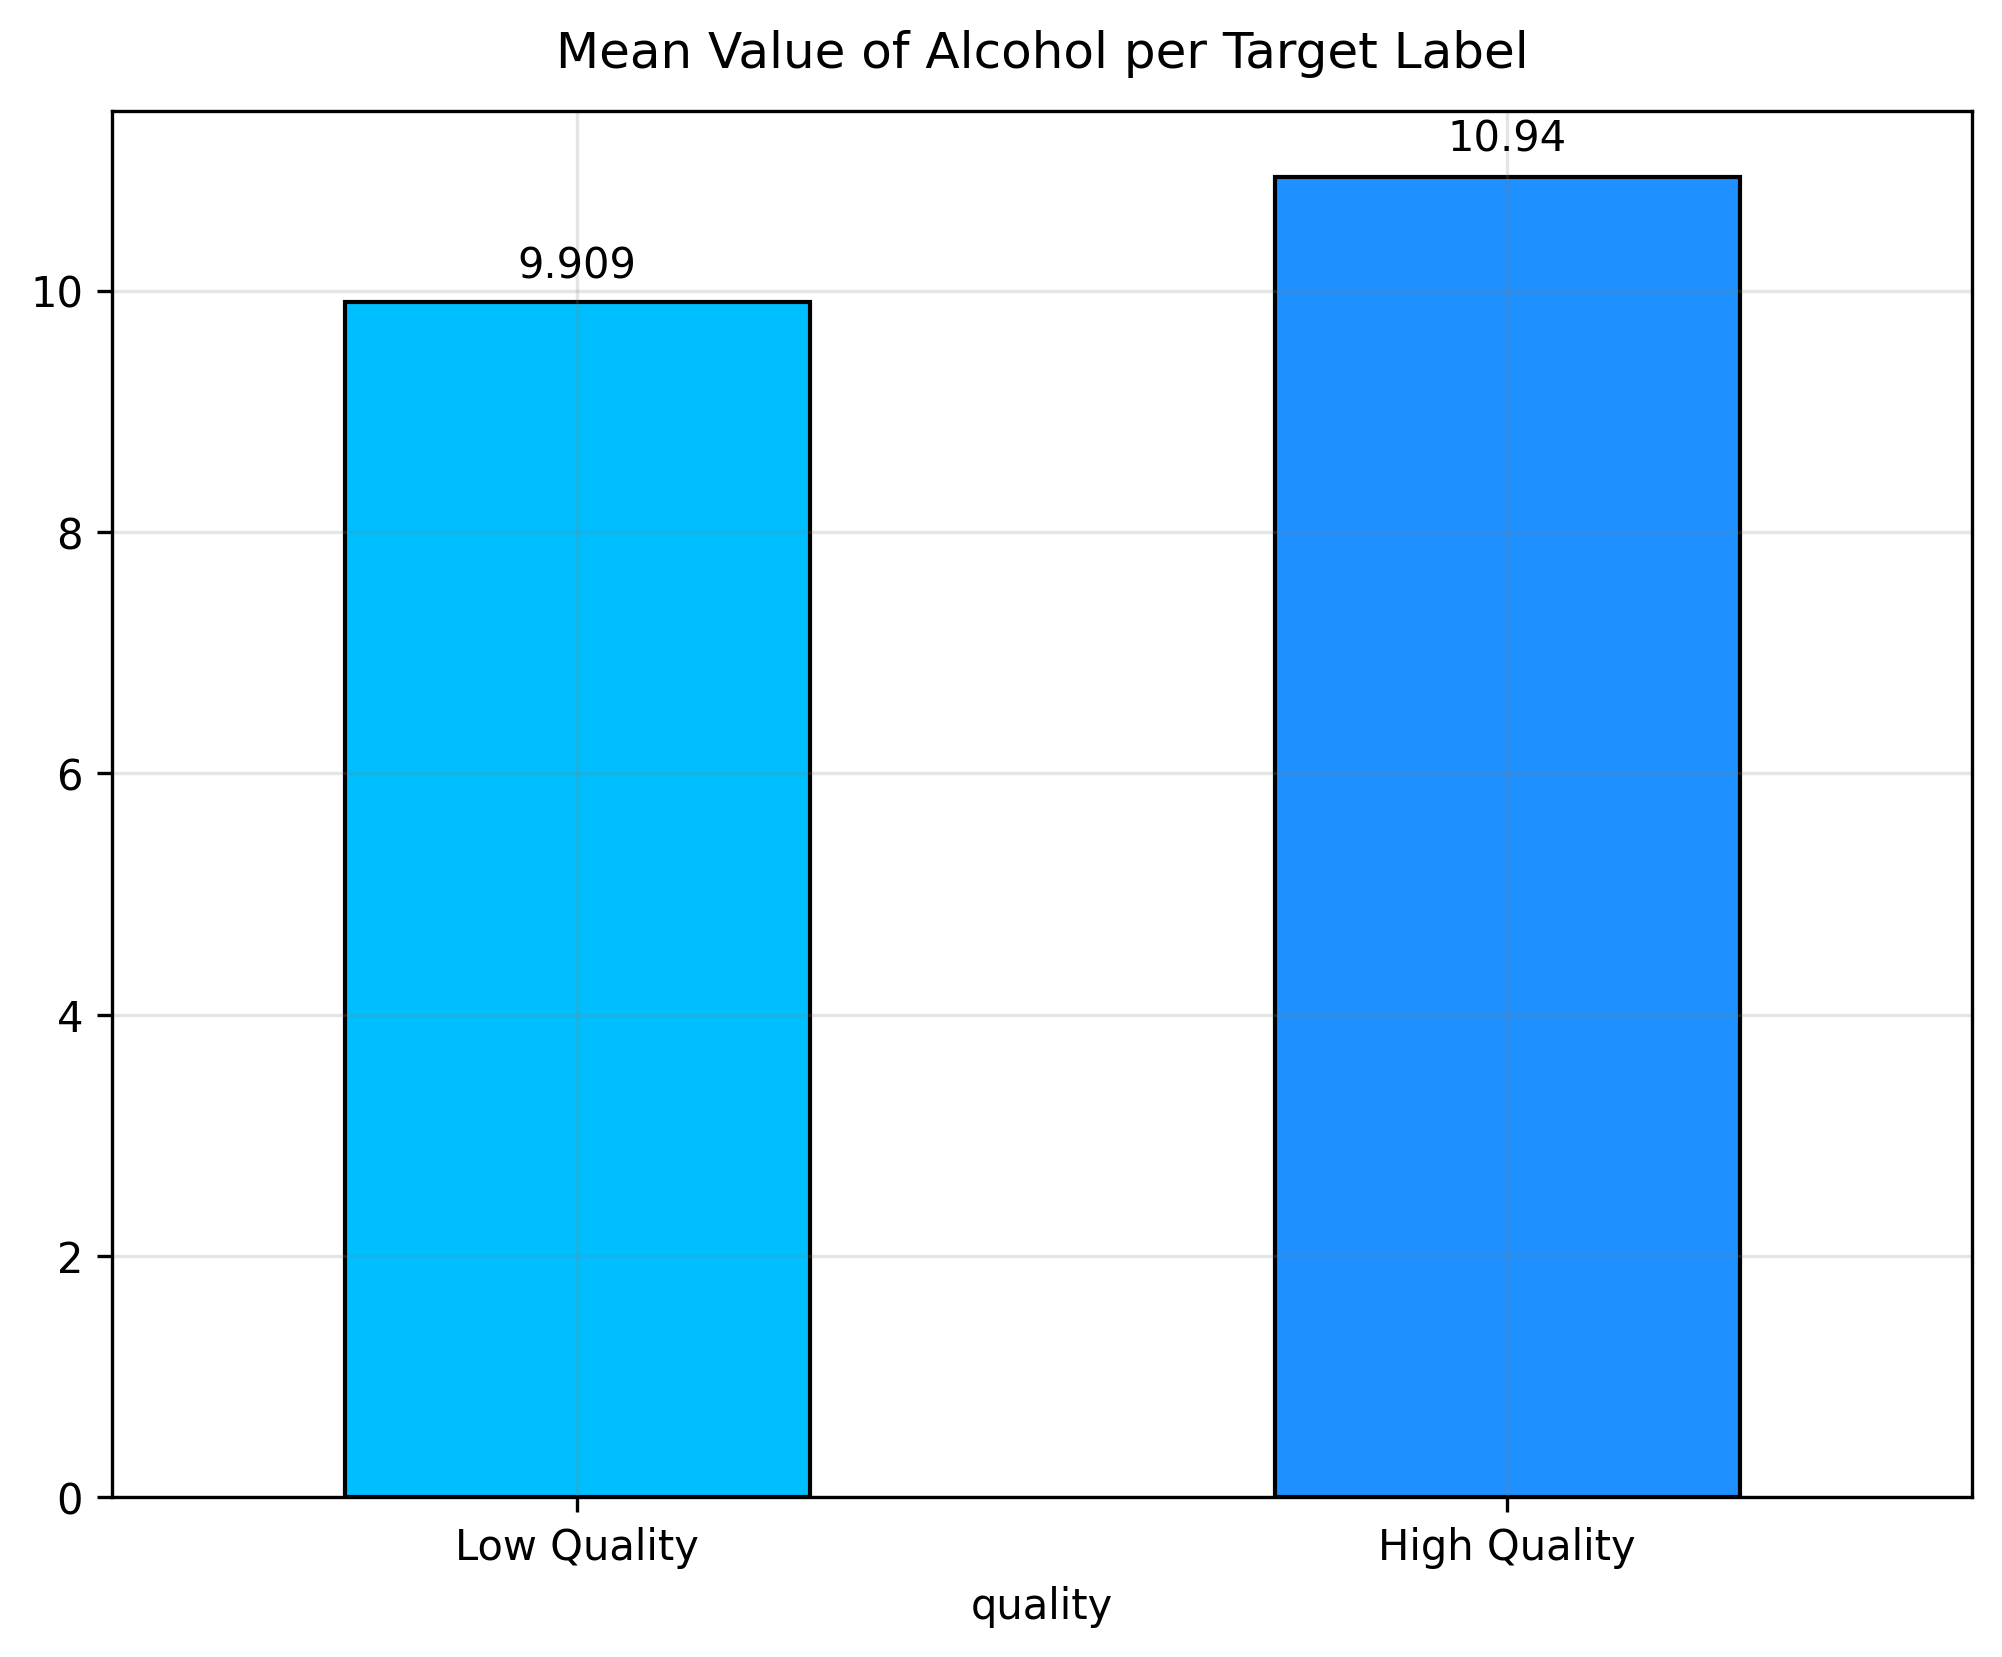

In [23]:
features_mean_stats = df.groupby('quality').mean()

for col in list(features_mean_stats.columns.values):
    subset = features_mean_stats[col]
    
    fig = plt.figure(figsize=(8, 6), dpi=300)
    
    ax = subset.plot(
        kind='bar', 
        rot=0, 
        color=['deepskyblue', 'dodgerblue', 'royalblue'], 
        edgecolor='black', 
        linewidth=1,
    )
    
    plt.title(f'Mean Value of {col.title()} per Target Label', fontsize=12, pad=10.5)
    
    plt.xticks(ticks=np.arange(len(subset)), labels=['Low Quality', 'High Quality'], fontsize=10)
    
    plt.grid(alpha=0.2, color='grey')
    
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.annotate(f'{round(height, 3)}', (x + width/2, y + height*1.02), ha='center')
    
    plt.show()

In [24]:
features_std_stats = df.groupby('quality').std()
features_std_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,0.915222,0.117200,0.143228,5.165026,0.028796,20.591171,48.424116,0.002530,0.147043,0.100946,0.895594
1,0.834589,0.091259,0.110221,4.652523,0.018751,15.178267,39.095260,0.002898,0.152620,0.119275,1.212499


<h1>Feature Statistics per Target Variable</h1>

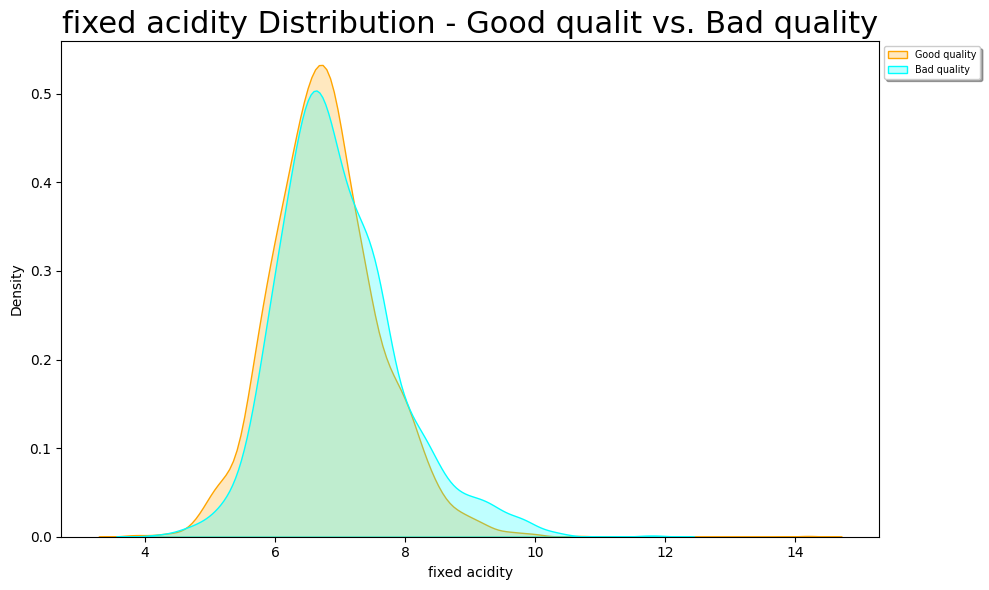

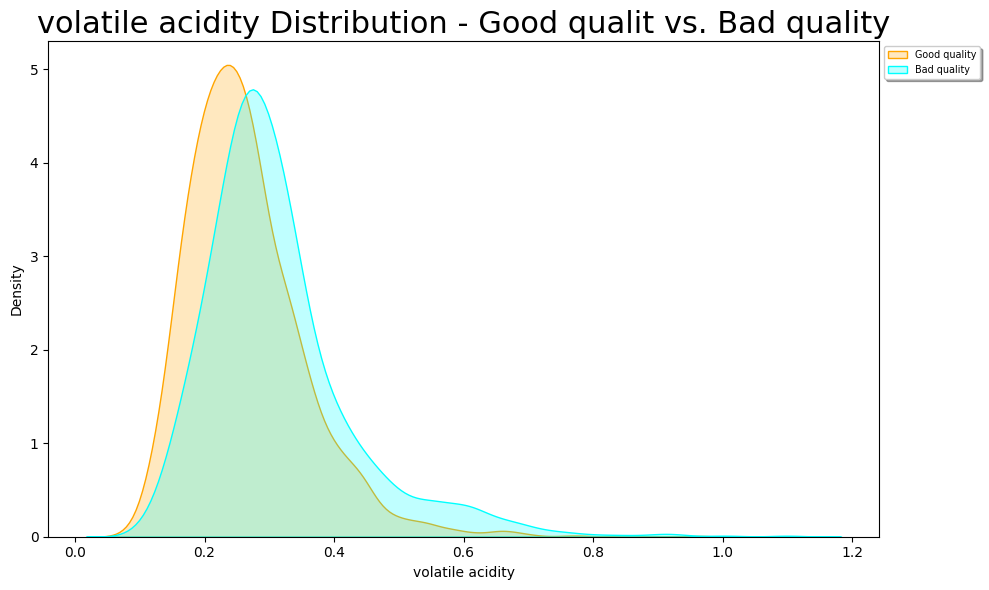

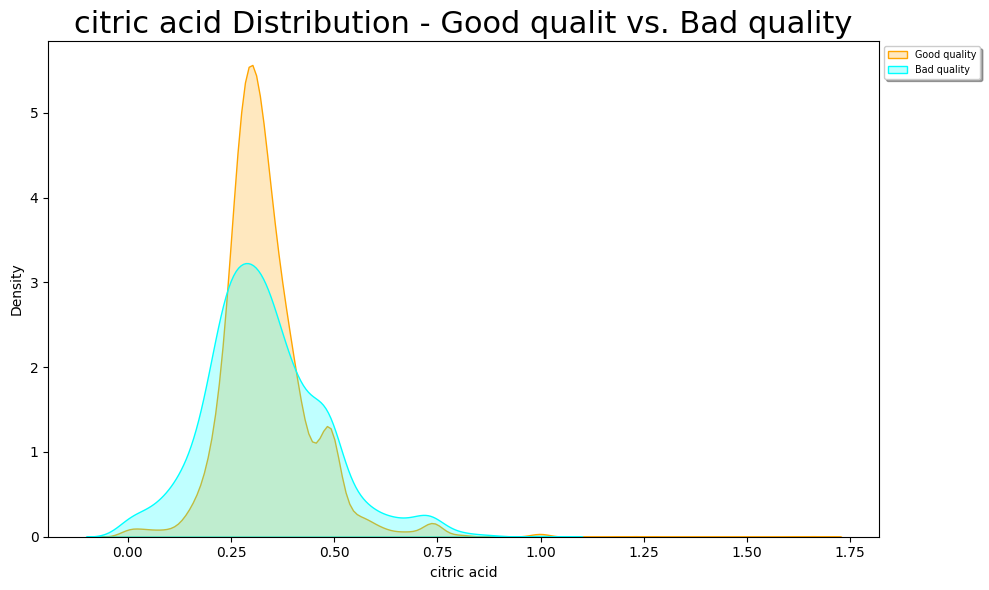

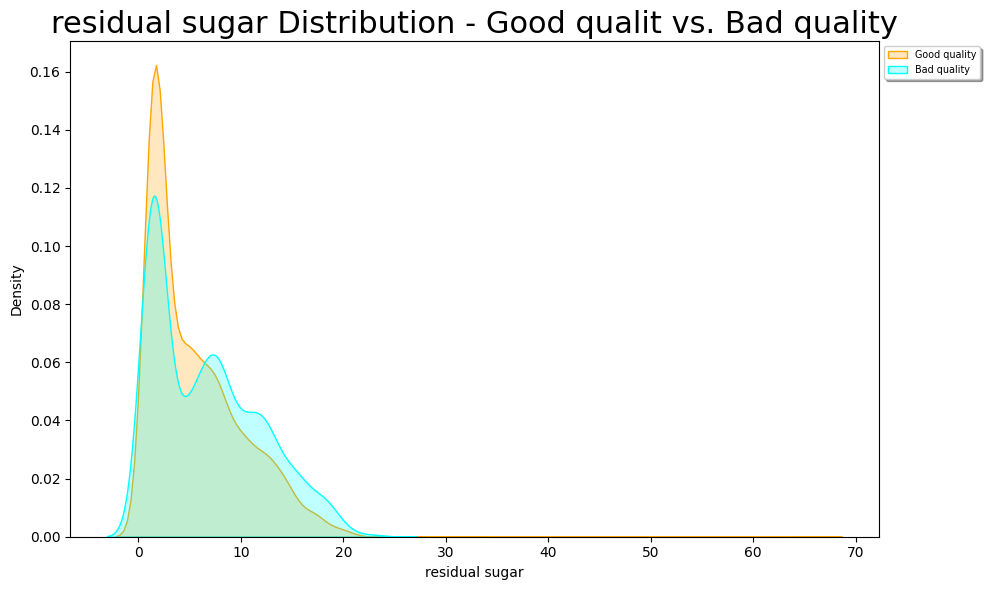

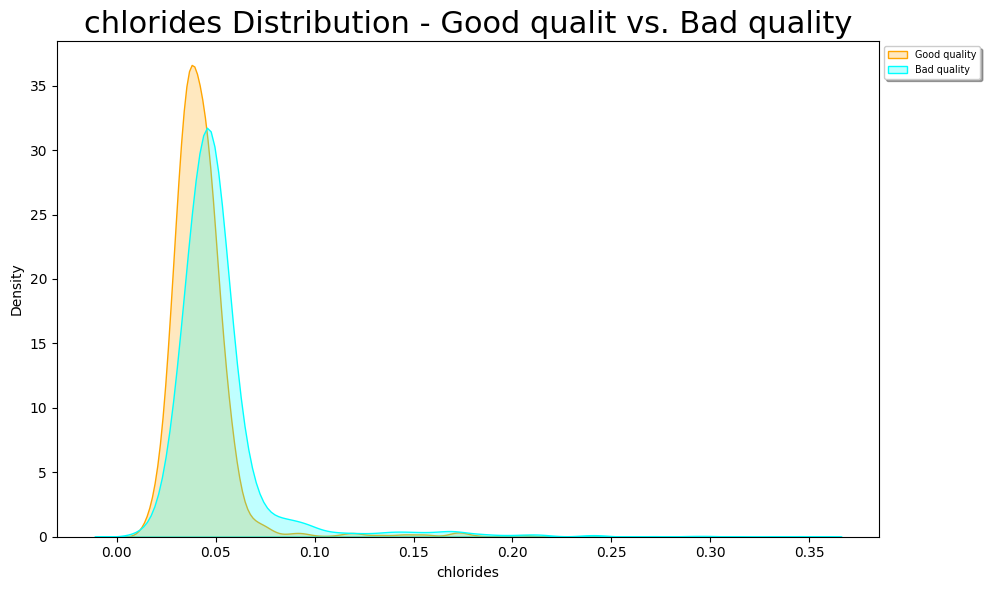

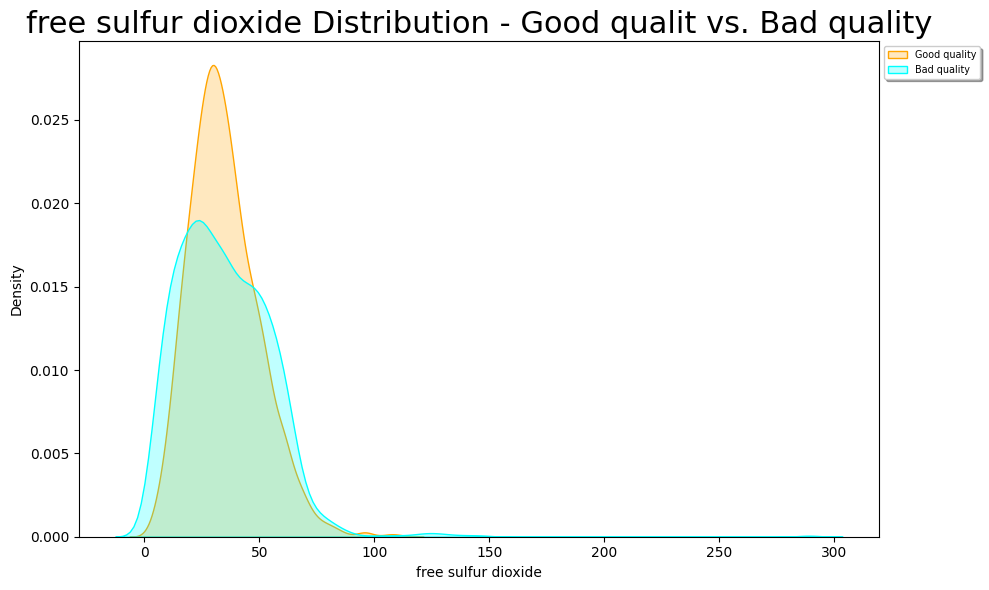

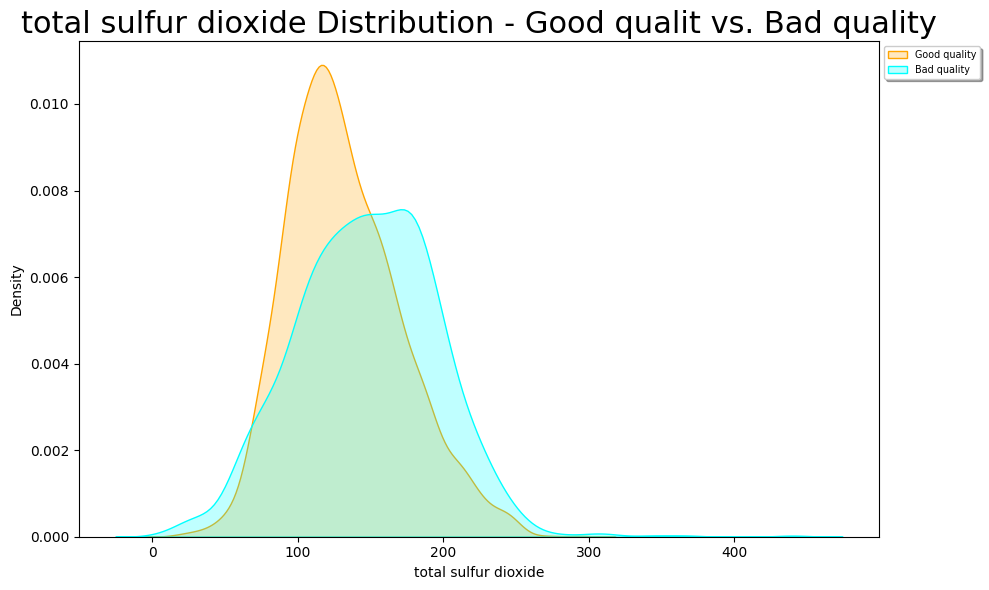

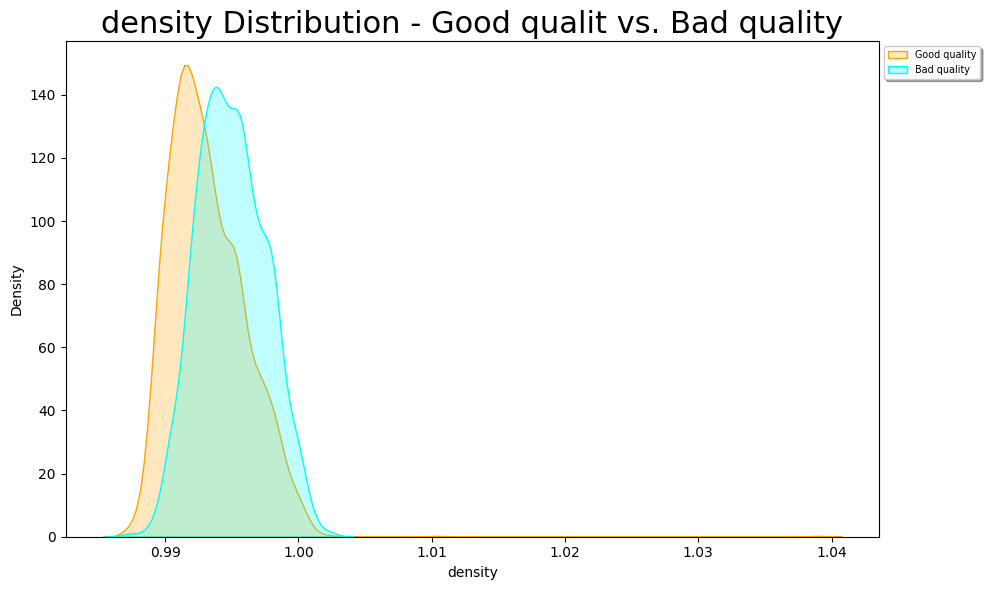

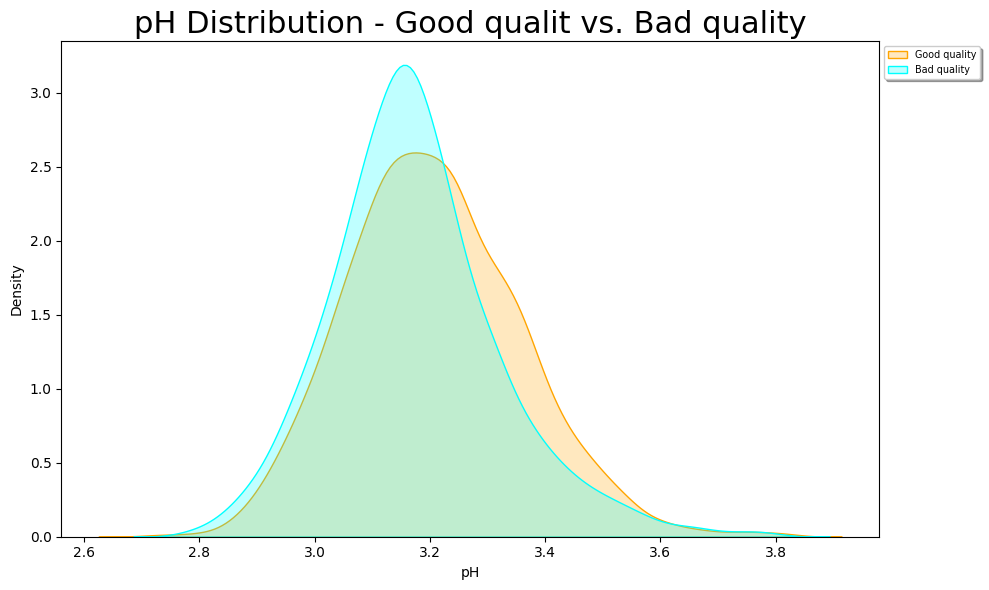

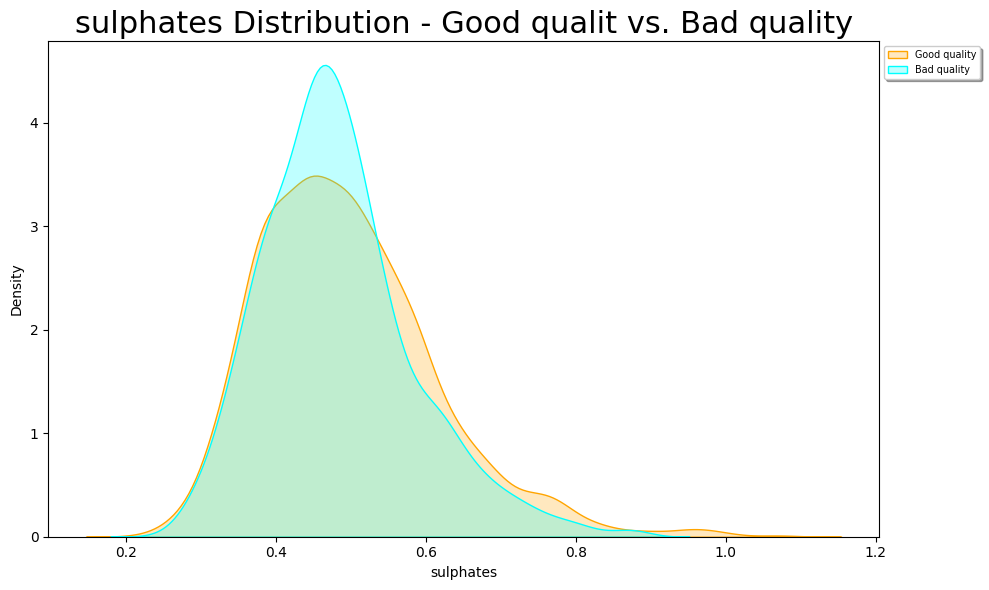

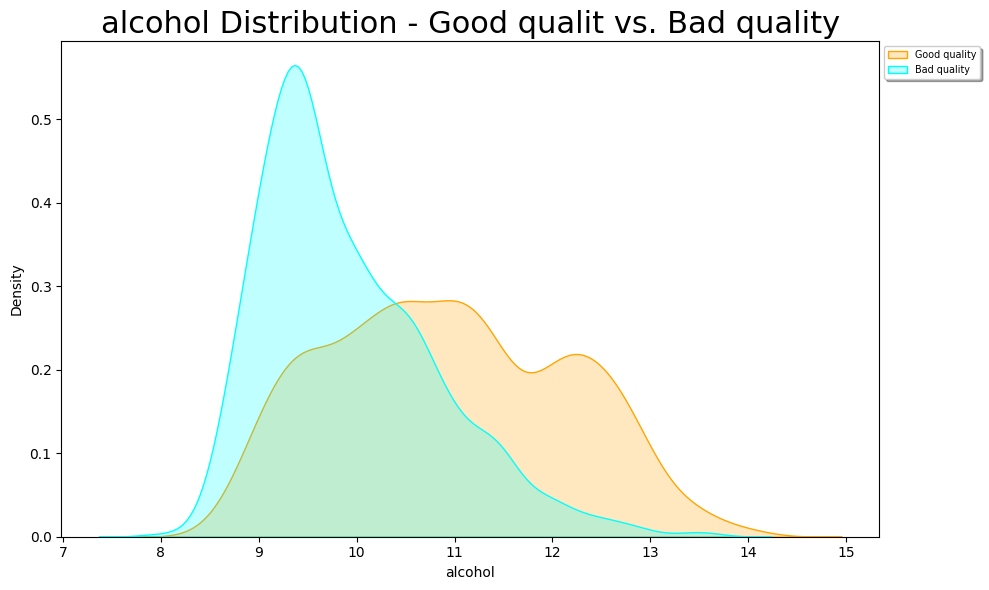

In [25]:
column_names = list(df.iloc[:, :11].columns.values)

labels = ['Good quality', 'Bad quality']

colors = ['orange', 'cyan']

for column_name in column_names:
    
    fig = plt.figure(figsize=(10, 6))


    ax = sns.kdeplot(
        df.loc[(df['quality'] == 1), column_name], 
        color=colors[0], 
        fill=True, 
        label=labels[0],
    )

    ax = sns.kdeplot(
        df.loc[(df['quality'] == 0), column_name], 
        color=colors[1], 
        fill=True, 
        label=labels[1],
    )

    plt.title(f'{column_name} Distribution - Good qualit vs. Bad quality', fontsize=22)

    plt.tick_params(top=False, bottom=True, left=True, right=False)

    plt.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize='x-small', frameon=True, shadow=True, fancybox=True)

    plt.tight_layout()
    
    plt.show()

<h1>Splitting the Data into Feature Matrix and Target Label</h1>

In [26]:
X = df.drop(['quality'], axis=1)
y = df['quality']

<h1>SMOTE Sampling to deal with imbalance classes</h1>

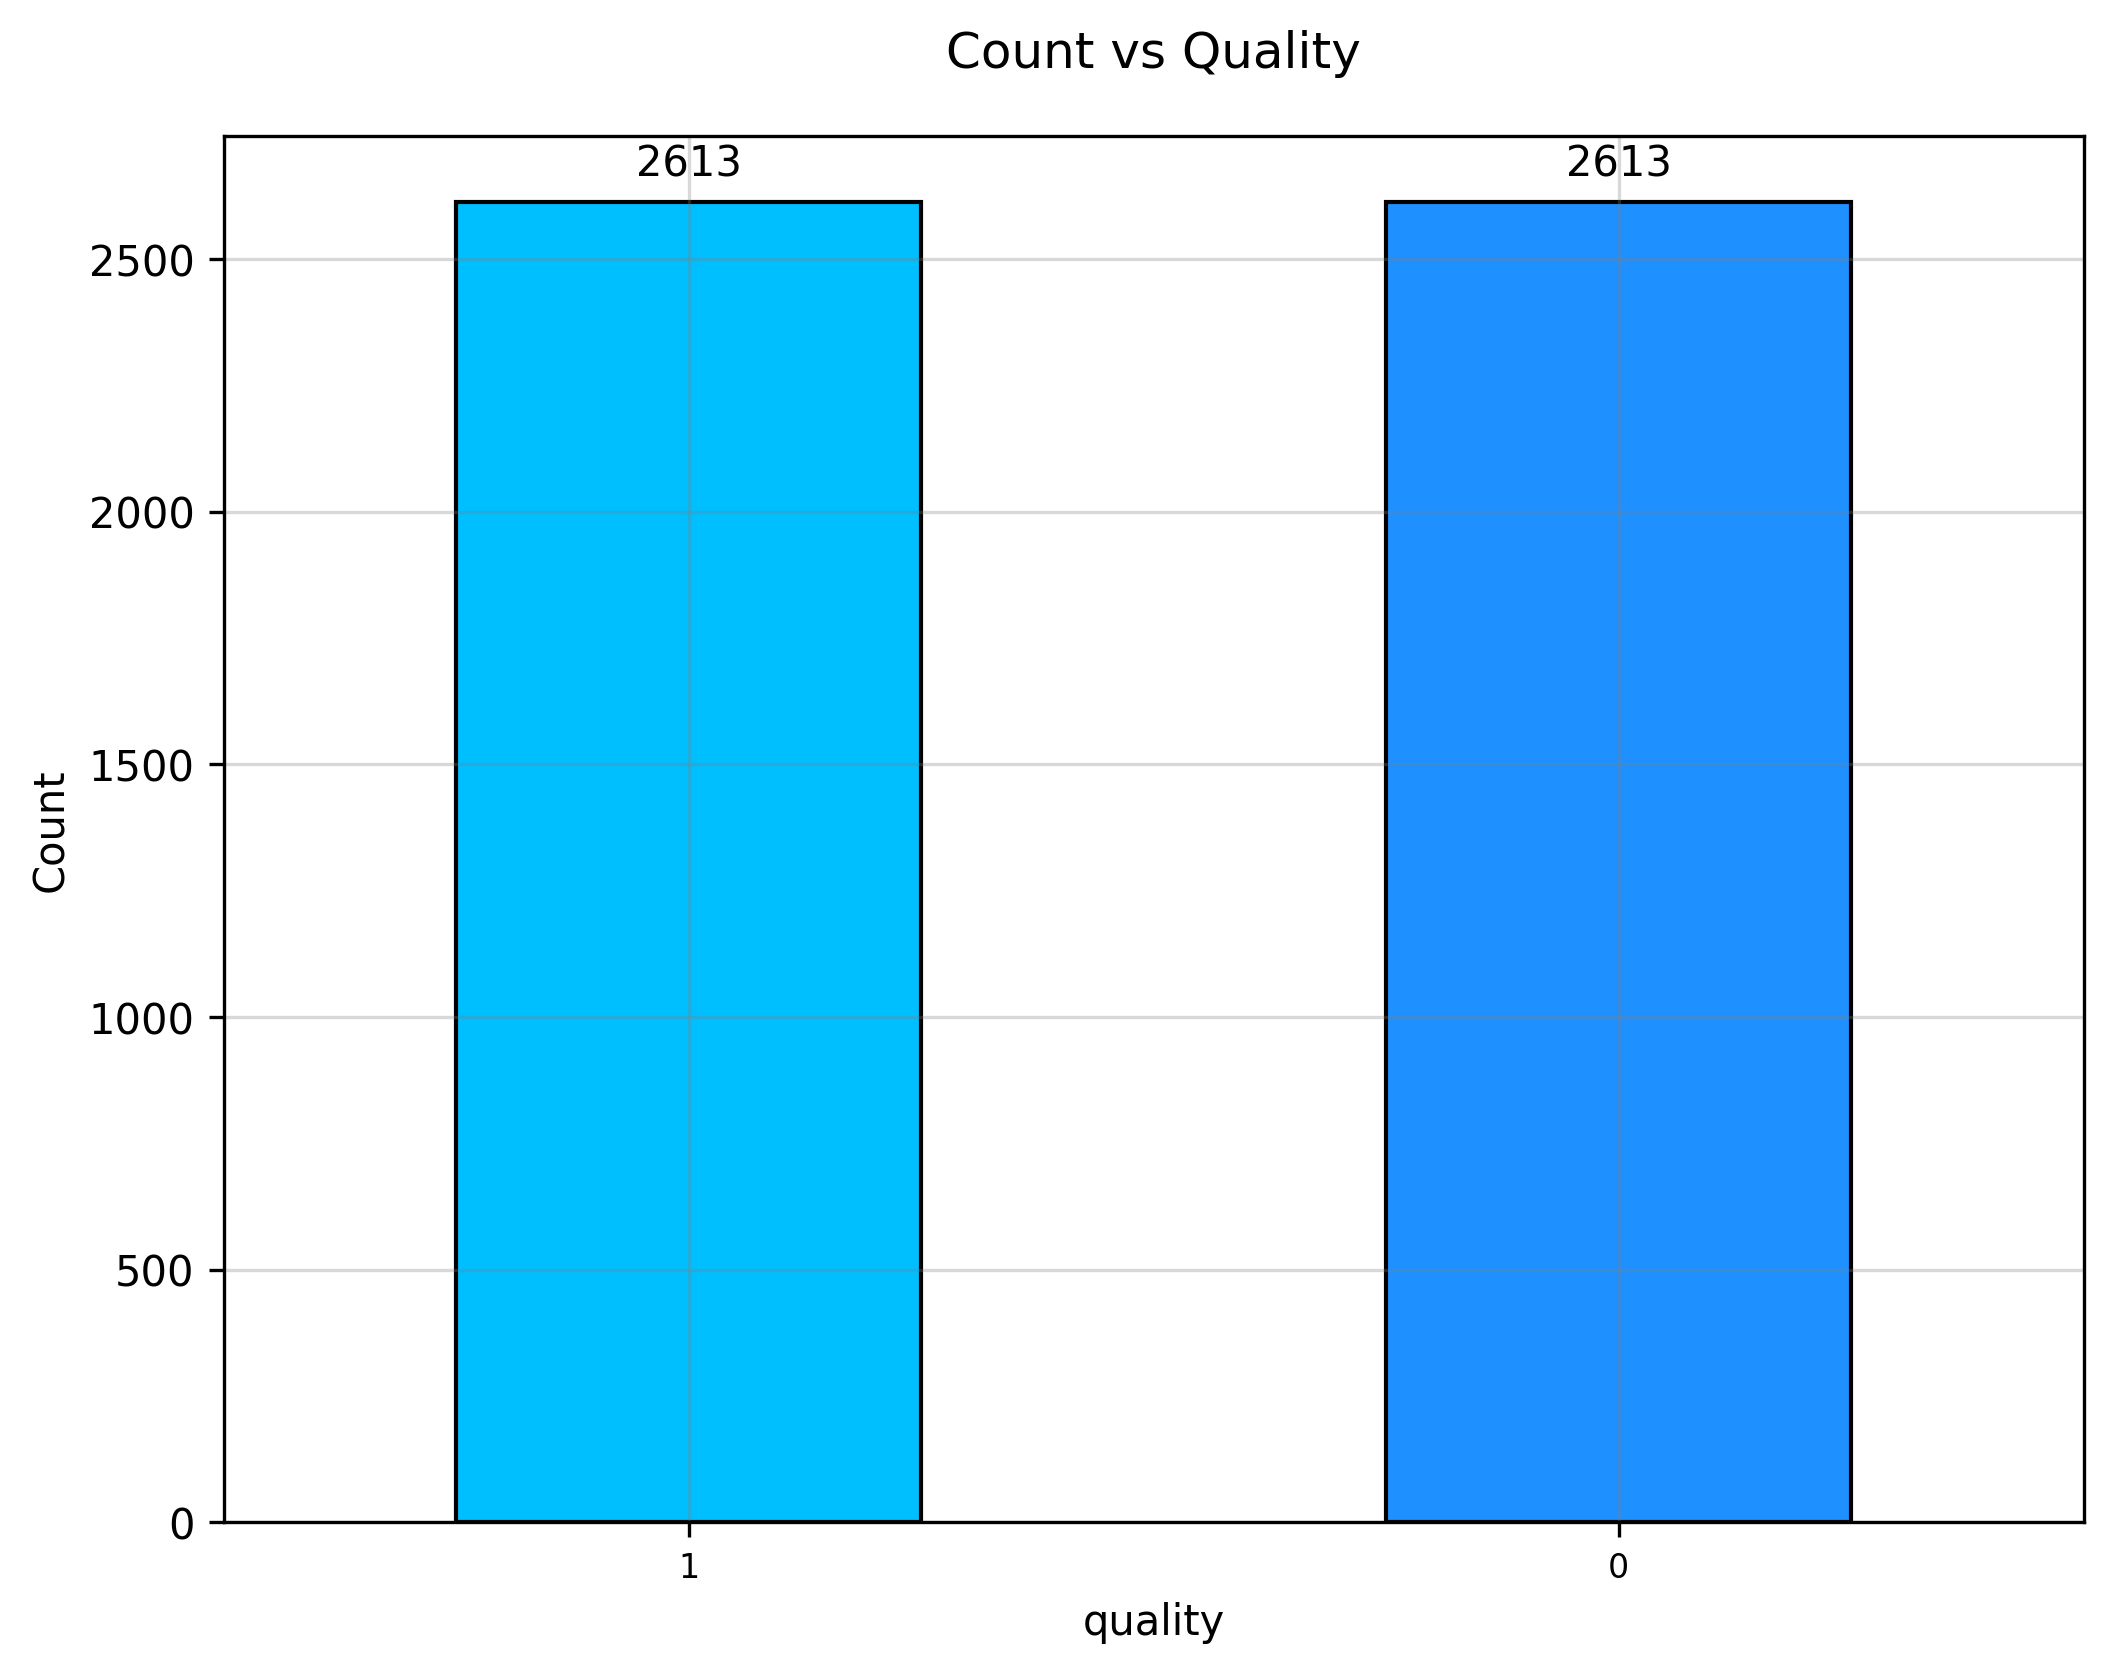

In [27]:
smote = SVMSMOTE(random_state=80)
X, y = smote.fit_resample(X, y)

plotted_y = y

fig = plt.figure(figsize=(8, 6), dpi=300)

ax = plotted_y.value_counts().plot(
    kind='bar', 
    rot=0, 
    color=['deepskyblue', 'dodgerblue', 'royalblue'], 
    edgecolor='black', 
    linewidth=1,
)
    
plt.title(f'Count vs Quality', fontsize=12, pad=16.5)
plt.ylabel('Count', fontsize=10)
    
for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x, plotted_y = patch.get_xy()
    ax.annotate(f'{height}', (x + width/2, plotted_y + height*1.02), ha='center')
    
plt.xticks(fontsize=8)
    
plt.grid(alpha=0.3, color='grey')
    
plt.show()

<h1>Splitting the Dataset into Train and Test sets</h1>

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=80)

<h1>Scalling Train and Test sets</h1>

In [29]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train, columns=X.columns)
df_test_scaled = pd.DataFrame(X_test, columns=X.columns)

df_combined_scaled = pd.concat([df_train_scaled, df_test_scaled], ignore_index=True)

summary_combined_scaled = df_combined_scaled.describe(include='all')

skewness_combined_scaled = df_combined_scaled.skew()
summary_combined_scaled.loc['skew'] = skewness_combined_scaled

train_accuracies = []
test_accuracies = []

summary_combined_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000,5226.000000
mean,0.301365,0.262807,0.346148,0.114963,0.169244,0.094527,0.288857,0.163907,0.428844,0.347502,0.389567
std,0.084670,0.089803,0.094298,0.072625,0.077867,0.051007,0.095915,0.052861,0.135952,0.121217,0.190179
min,0.000000,0.000000,0.000000,-0.010067,-0.020758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247220,0.206946,0.292751,0.048711,0.133545,0.059389,0.218901,0.125052,0.338678,0.261174,0.232957
50%,0.294864,0.247338,0.336498,0.099091,0.158120,0.089430,0.280821,0.159327,0.420211,0.333464,0.355384
75%,0.352037,0.295809,0.392672,0.159843,0.179624,0.126163,0.357688,0.199547,0.510803,0.415429,0.516538
max,1.000000,1.000000,1.313523,1.000000,1.085848,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skew,0.815481,1.893302,0.995342,1.157519,4.926294,2.802105,0.414371,0.988726,0.453033,0.906903,0.629349


<h1>Modelling</h1>

In [30]:
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                annot_kws={"size": 14}, linewidths=0.5, linecolor="black")
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

<h2>KNeighbors Classifier</h2>

<h3>When K = 1</h3>

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.7896749521988528

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2090
           1       1.00      1.00      1.00      2090

    accuracy                           1.00      4180
   macro avg       1.00      1.00      1.00      4180
weighted avg       1.00      1.00      1.00      4180

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       523
           1       0.81      0.76      0.78       523

    accuracy                           0.79      1046
   macro avg       0.79      0.79      0.79      1046
weighted avg       0.79      0.79      0.79      1046



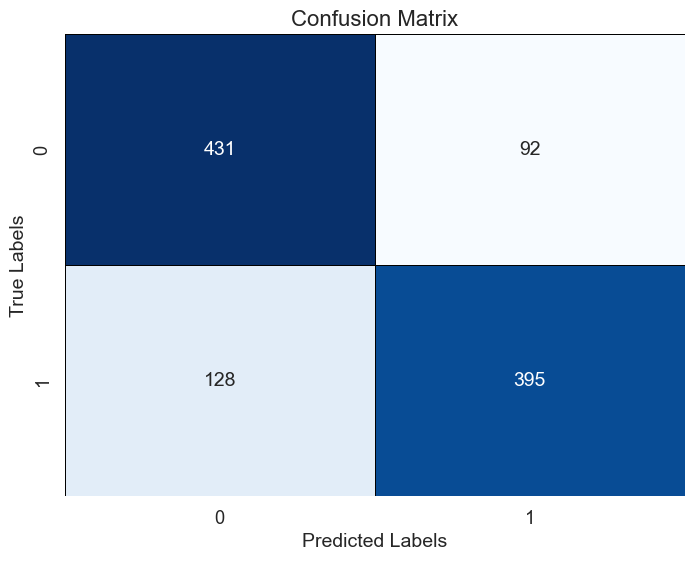

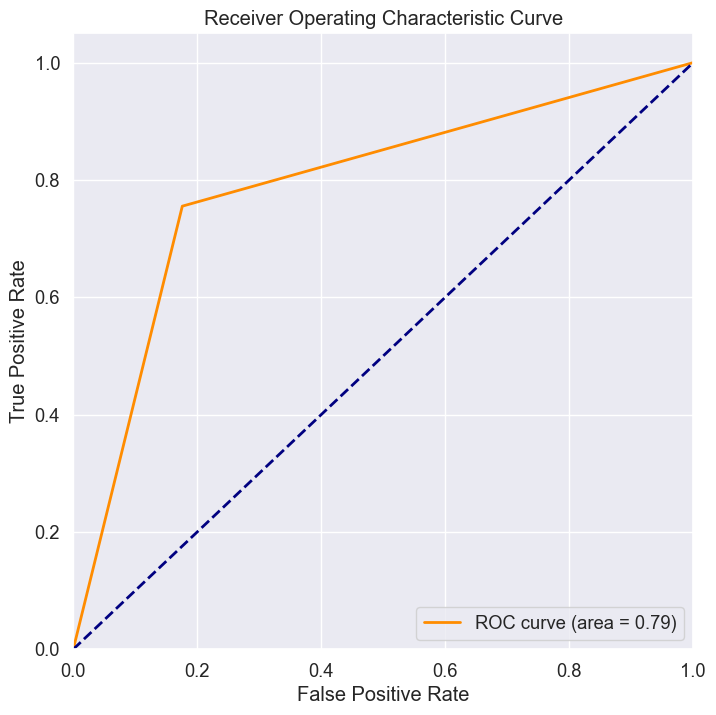

In [31]:
model_knn_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model_knn_1.fit(X_train, y_train)

y_test_pred_knn_1 = model_knn_1.predict(X_test)

y_train_pred_knn_1 = model_knn_1.predict(X_train)

train_accuracy = model_knn_1.score(X_train, y_train)
test_accuracy = model_knn_1.score(X_test, y_test)

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Training Accuracy Score: {train_accuracy}")
print(f"Testing Accuracy Score: {test_accuracy}")

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_knn_1))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_knn_1))

# Print confusion matrix
conf_matrix_knn_1 = confusion_matrix(y_test, y_test_pred_knn_1)
plot_confusion_matrix(conf_matrix_knn_1)

# Get predicted probabilities for positive class
y_test_prob_knn_1 = model_knn_1.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_knn_1, tpr_knn_1, _ = roc_curve(y_test, y_test_prob_knn_1)
roc_auc = auc(fpr_knn_1, tpr_knn_1)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_1, tpr_knn_1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

<h3>When K = 3</h3>

Training Accuracy Score: 0.8870813397129187
Testing Accuracy Score: 0.780114722753346

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2090
           1       0.91      0.86      0.88      2090

    accuracy                           0.89      4180
   macro avg       0.89      0.89      0.89      4180
weighted avg       0.89      0.89      0.89      4180

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       523
           1       0.81      0.73      0.77       523

    accuracy                           0.78      1046
   macro avg       0.78      0.78      0.78      1046
weighted avg       0.78      0.78      0.78      1046



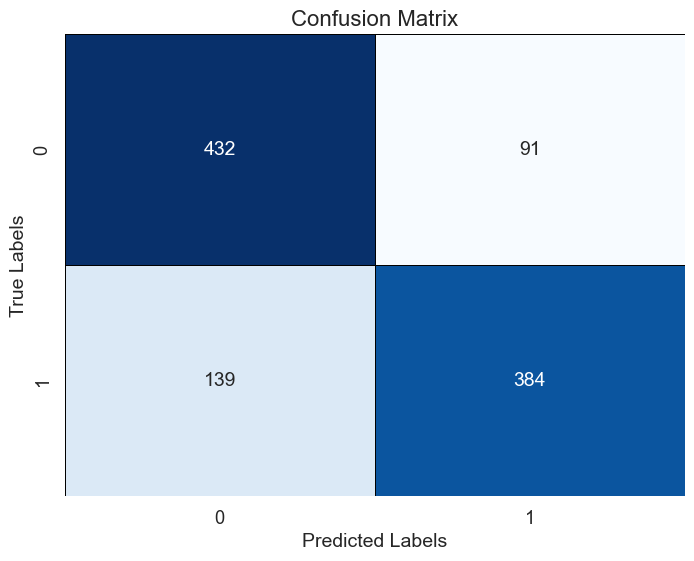

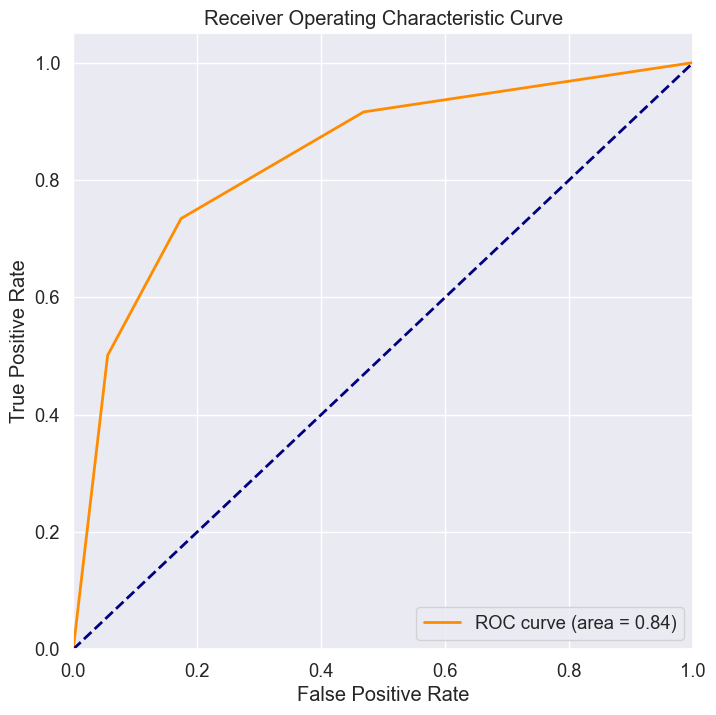

In [32]:
model_knn_2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn_2.fit(X_train, y_train)

y_test_pred_knn_2 = model_knn_2.predict(X_test)

y_train_pred_knn_2 = model_knn_2.predict(X_train)

train_accuracy = model_knn_2.score(X_train, y_train)
test_accuracy = model_knn_2.score(X_test, y_test)

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Training Accuracy Score: {train_accuracy}")
print(f"Testing Accuracy Score: {test_accuracy}")

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_knn_2))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_knn_2))

# Print confusion matrix
conf_matrix_knn_2 = confusion_matrix(y_test, y_test_pred_knn_2)
plot_confusion_matrix(conf_matrix_knn_2)

# Get predicted probabilities for positive class
y_test_prob_knn_2 = model_knn_2.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_knn_3, tpr_knn_3, _ = roc_curve(y_test, y_test_prob_knn_2)
roc_auc = auc(fpr_knn_3, tpr_knn_3)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn_3, tpr_knn_3, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

<h2>RandomForest Classifier</h2>

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Validation Accuracy for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}: 0.8038277511961722
Validation Accuracy for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}: 0.8076555023923444
Validation Accuracy for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}: 0.8066985645933015
Validation Accuracy for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}: 0.8059808612440191
Validation Accuracy for {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 50}: 0.8059808612440191
Validation Accuracy for {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}: 0.8040669856459332
Validation Accuracy for {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 150}: 0.8069377990430622
Validation Accuracy for {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 200}: 0.805263157894737
Validation Accuracy for {'max_depth': None, 'min_samples_split': 6, '

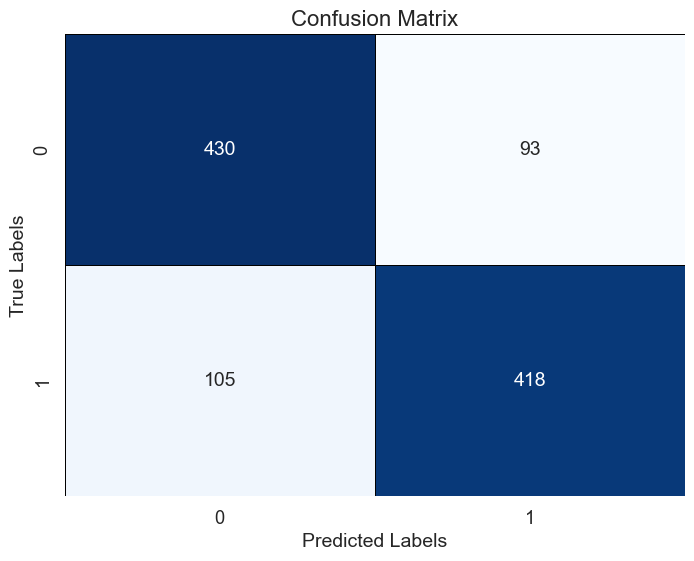

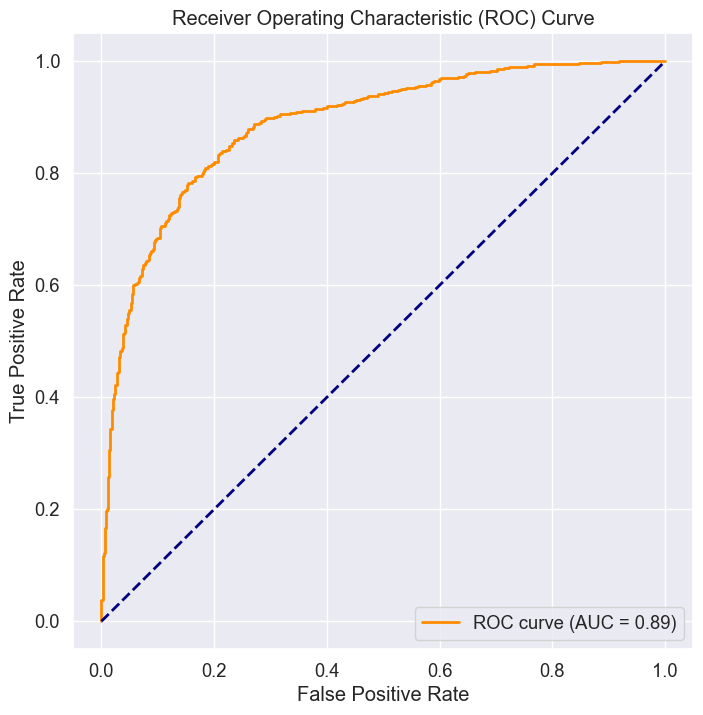

In [33]:
model_rf = RandomForestClassifier(random_state=80)
model_rf.fit(X_train, y_train)

# Step 1: Tune hyperparameters using cross-validation on the training set
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=80), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Print the validation accuracy for each hyperparameter combination
cv_results = grid_search_rf.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Validation Accuracy for {params}: {mean_score}")

# Print the best hyperparameters and corresponding accuracy
best_params_rf = grid_search_rf.best_params_
best_accuracy_rf = grid_search_rf.best_score_
print("\nBest Hyperparameters:", best_params_rf)
print("Validation Accuracy:", best_accuracy_rf)

# Step 2: Evaluate the model on the testing set
best_rf_model = RandomForestClassifier(random_state=80, **best_params_rf)
best_rf_model.fit(X_train, y_train)

y_training_pred_rf = best_rf_model.predict(X_train)
y_testing_pred_rf = best_rf_model.predict(X_test)

train_accuracy = best_rf_model.score(X_train, y_train)
test_accuracy = best_rf_model.score(X_test, y_test)

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Training Accuracy Score: {train_accuracy}")
print(f"Testing Accuracy Score: {test_accuracy}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_testing_pred_rf))

# Print confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_testing_pred_rf)
plot_confusion_matrix(conf_matrix_rf)

# Step 3: Plot the ROC curve
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>SVC Classifier</h2>

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}: 0.720334928229665
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}: 0.7399521531100478
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}: 0.7614832535885168
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}: 0.7399521531100478
Validation Accuracy for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}: 0.720334928229665
Validation Accuracy for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}: 0.7062200956937799
Validation Accuracy for {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}: 0.5722488038277512
Validation Accuracy for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}: 0.7062200956937799
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}: 0.720334928229665
Validation Accuracy for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}: 0.7399521531100478
Validation Accuracy for {'C': 0.1,

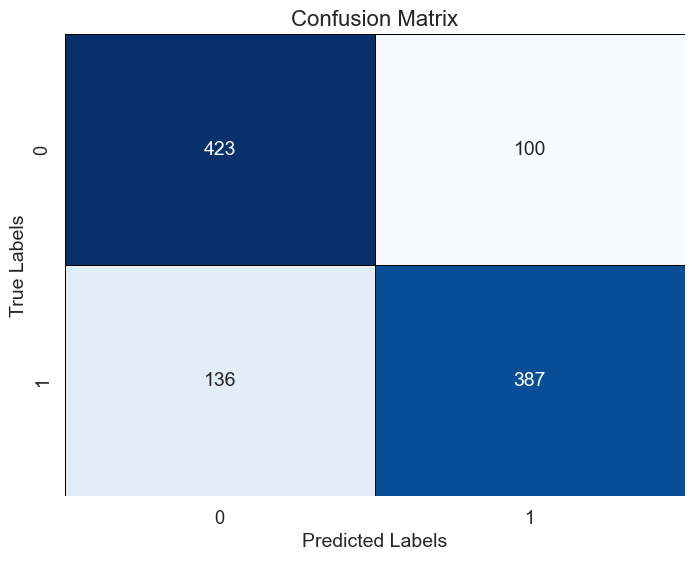

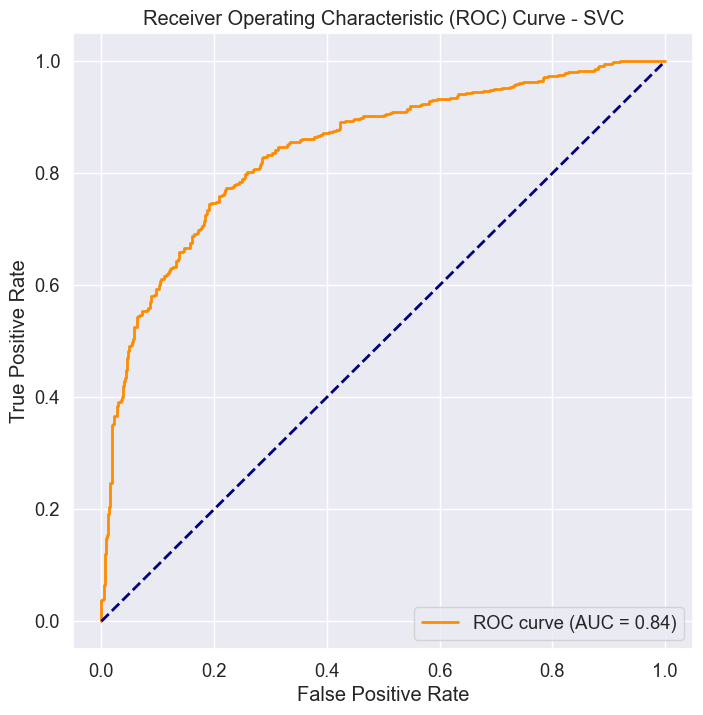

In [34]:
model_svc = SVC(random_state=80)
model_svc.fit(X_train, y_train)

# Step 4: Tune hyperparameters using cross-validation on the training set
param_grid_svc = {
    'C': [0.1, 1, 10, 0.01],
    'kernel': ['linear', 'rbf', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 'scale', 0.1]
}

grid_search_svc = GridSearchCV(SVC(random_state=80), param_grid_svc, cv=5, scoring='accuracy', verbose=1)
grid_search_svc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
best_params_svc = grid_search_svc.best_params_
best_accuracy_svc = grid_search_svc.best_score_

# Print the validation accuracy for each hyperparameter combination
cv_results_svc = grid_search_svc.cv_results_
for mean_score, params in zip(cv_results_svc['mean_test_score'], cv_results_svc['params']):
    print(f"Validation Accuracy for {params}: {mean_score}")

print("\nBest Hyperparameters:", best_params_svc)
print("Validation Accuracy:", best_accuracy_svc)

# Step 6: Evaluate the model on the testing set
best_svc_model = SVC(random_state=80, **best_params_svc)
best_svc_model.fit(X_train, y_train)

y_training_pred_svc = best_svc_model.predict(X_train)
y_testing_pred_svc = best_svc_model.predict(X_test)

train_accuracy = best_svc_model.score(X_train, y_train)
test_accuracy = best_svc_model.score(X_test, y_test)

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

print(f"Training Accuracy Score: {train_accuracy}")
print(f"Testing Accuracy Score: {test_accuracy}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_testing_pred_svc))

# Print confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_testing_pred_svc)
plot_confusion_matrix(conf_matrix_svc)

# Step 7: Plot the ROC curve
y_pred_prob_svc = best_svc_model.decision_function(X_test)  # Decision function scores

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(8, 8))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc='lower right')
plt.show()

In [35]:
models_summary = pd.DataFrame(
        {
            'Model Name' : ['KNN_1', 'KNN_3', 'Random Forest', 'SVC'], 
            'Train Accuracy' : train_accuracies, 
            'Test Accuracy' : test_accuracies,
        }
    )

In [36]:
def plot_model_summary(
    model_summary, 
    figsize=(20, 14), 
    dpi=300,
):

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    width = 0.4

    x_ticks_location = np.arange(len(model_summary['Model Name']))


    test_plot = ax.bar(
        x_ticks_location, 
        model_summary['Test Accuracy'], 
        width, 
        color="deepskyblue", 
        edgecolor="orangered", 
        align='center', 
        linewidth=3, 
        label='Test Accuracy', 
        hatch=("/"),
    )


    train_plot = ax.bar(
        x_ticks_location + width, 
        model_summary['Train Accuracy'], 
        width, color="darkorange", 
        edgecolor="royalblue", 
        align='center', 
        linewidth=3, 
        label='Train Accuracy',
    )


    ax.set_title("Models Accuracy", fontsize=28, pad=25)

    ax.set_xticks(x_ticks_location + width / 2)
    ax.set_xticklabels(model_summary['Model Name'], fontsize=25)

    ax.set_xlabel('Model', fontsize=28, labelpad=20)

    plt.yticks(fontsize=25)
    ax.set_ylabel('Accuracy', fontsize=28, labelpad=20)

    ax.grid(which="both", axis="both", color="black", linewidth=0.8)

    ax.legend(bbox_to_anchor=(1, 1), loc="upper left", fontsize='xx-large', frameon=True, shadow=True, fancybox=True)

    fig.tight_layout()
    
    
    def label(plot):
        for patch in plot.patches:
            width = patch.get_width()
            height = patch.get_height()
            x, y = patch.get_xy()
            plt.text(
                x=x + width / 2, 
                y=y + height * 1.001,
                s=round(height, 3),
                ha='center',
                va="bottom",
                fontsize='xx-large',
            )

    label(test_plot)
    label(train_plot)

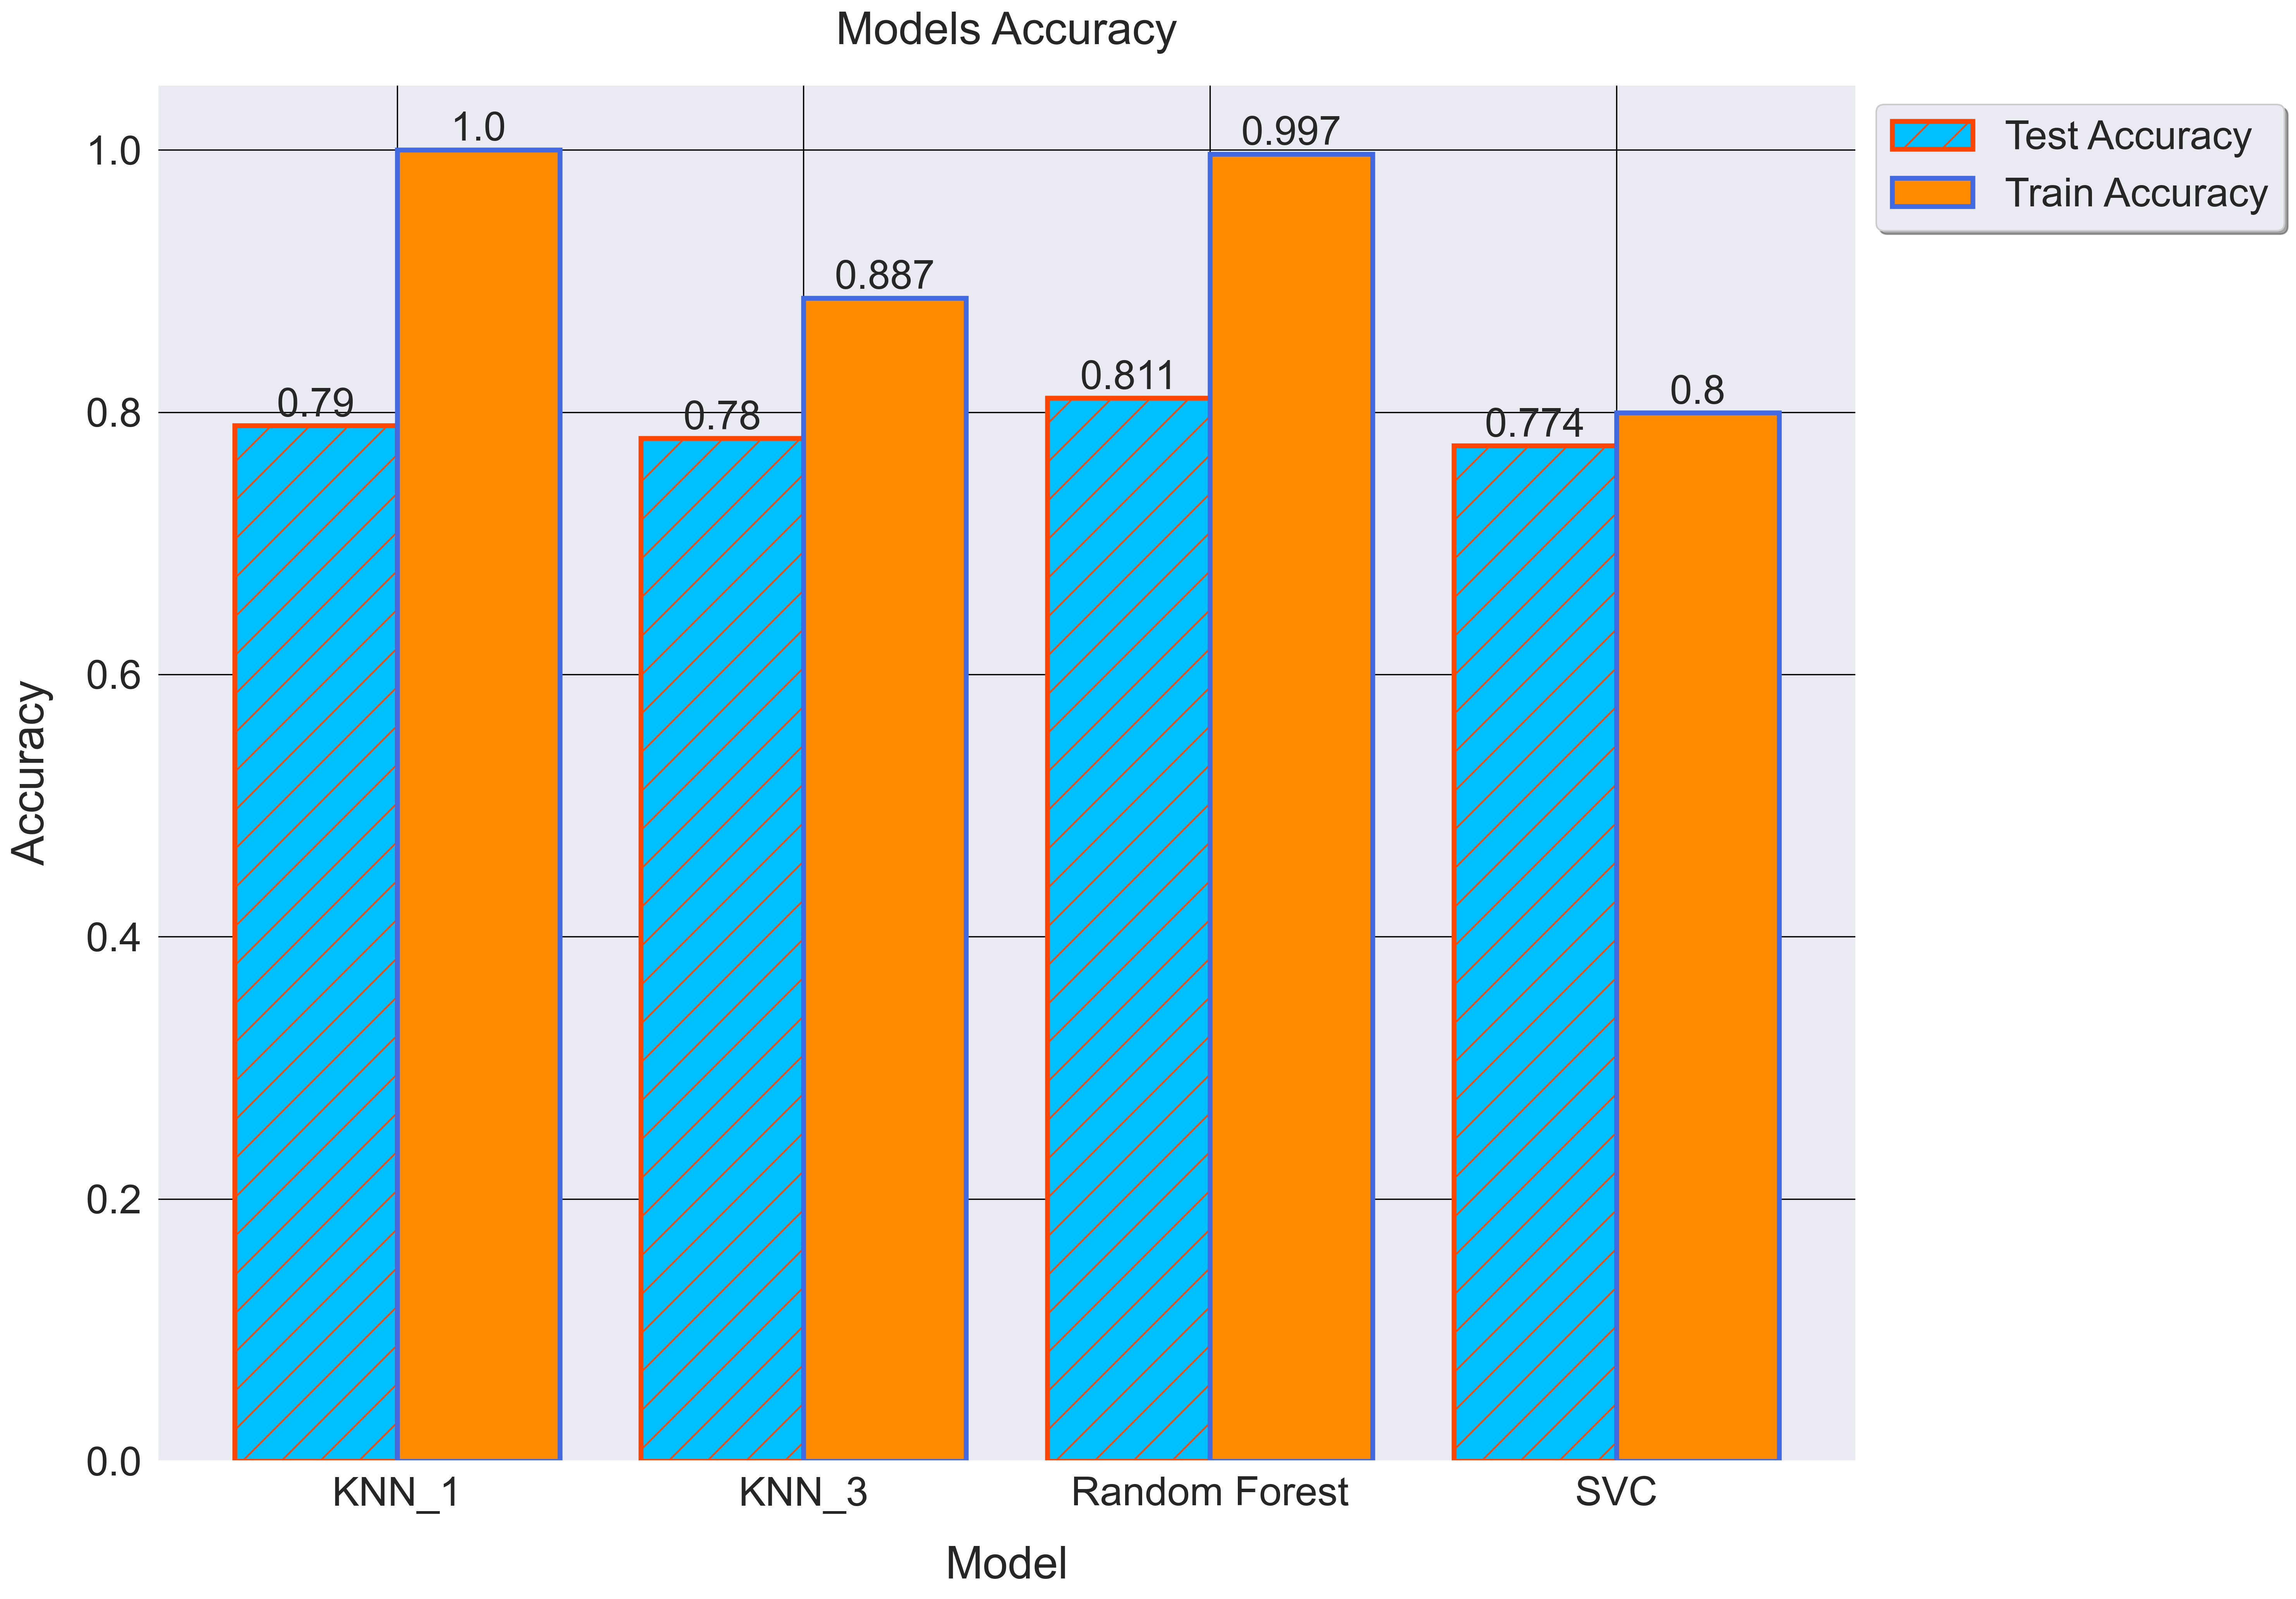

In [37]:
plot_model_summary(
    model_summary=models_summary, 
    figsize=(20, 14), 
    dpi=300, 
)

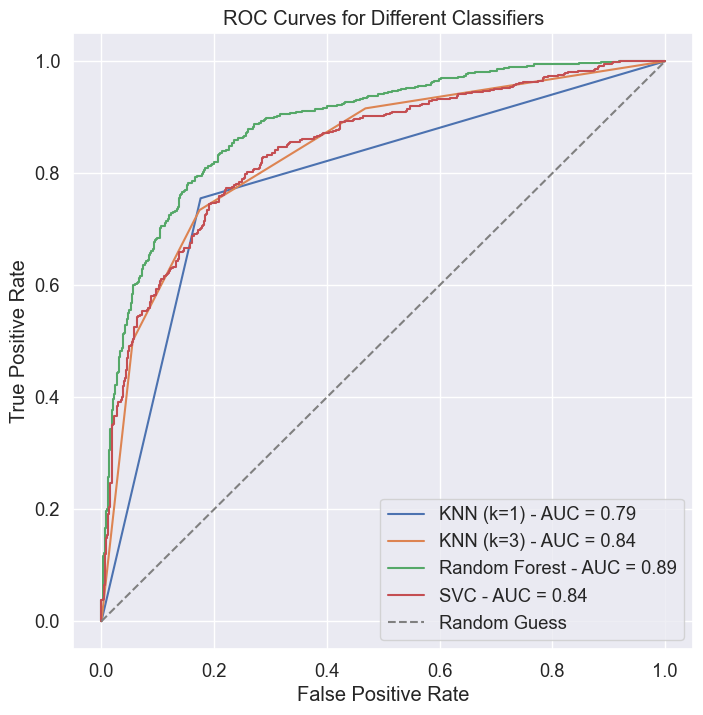

In [38]:
# Calculate AUC for each classifier
knn_k1_auc = auc(fpr_knn_1, tpr_knn_1)
knn_k3_auc = auc(fpr_knn_3, tpr_knn_3)
rf_auc = auc(fpr_rf, tpr_rf)
svc_auc = auc(fpr_svc, tpr_svc)

# Plot ROC curves
plt.figure(figsize=(8, 8))

plt.plot(fpr_knn_1, tpr_knn_1, label=f'KNN (k=1) - AUC = {knn_k1_auc:.2f}')
plt.plot(fpr_knn_3, tpr_knn_3, label=f'KNN (k=3) - AUC = {knn_k3_auc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest - AUC = {rf_auc:.2f}')
plt.plot(fpr_svc, tpr_svc, label=f'SVC - AUC = {svc_auc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()